# Lab 5: Competitive learning on the MNIST database

## Learning Outcomes
- Understand how competive learning works.
- Ability to develop and tune a simple neural network using competitive learning.

## Lecture Overview

### Competitive learning
- In competitive learning, the output neurons compete among themselves to be activated (fire).
- In contrast with the Hebbian learning, here only one neuron (or group of neurons) can be activate at a time.
- The output neuron that wins the competitionis is often called winner-take-all neuron.

<img src="http://bitsandchips.me/COM3240_Adaptive_Intelligence/Lecture5/icons/fig1.png" width="500">


### Main steps for compatitive learning implementation:
1. Generate a set of output neurons with random weights.
2. Choose a random input pattern and calculate the activation of each of the output neurons.
3. Detect the winner neuron and update only its weights; the weights of the other neurons are not updated:  , where  is the winner neuron,  is the learning rate and  is the input vector.
4. Repeat from step 2 until the weights are no longer changing, or change less than a set threshold, or a set maximum number of iterations has been reached.

### Some optimisation and tuning methods:
1. Normalised input or initial weights.
2. Noise addition on the weights.
3. Decaying learning rate.
4. Leaky learning: update the weights of the losers as well as winners but with a much smaller learning rate.
5. Update the winners and neighbouring losers.

### K-means clustering
Clustering: given a set of datapoints we want to group them based on their similarity. Each one of these groups is called cluster.

In k-means clustering the task is to separate our data into k clusters. However specifying the number of clusters k is a common problem in machine learning and there are various different methods for finding the optimal k.

The k-means algorithm is the following:
<img src="http://bitsandchips.me/COM3240_Adaptive_Intelligence/Lecture5/icons/fig2.png" width="500">

### Competitive learning vs K-means clustering
Essentially they are equivalent.

Competitive learning leads to clusters since each output neuron after training is firing on a certain input (has learn a specific data pattern).
The terms centroid and protorype are equivalent.

## Laboratory 5: Competitive learning on the MNIST database

### Exercise
The aim of this lab is to implement the standard competitive learning algorithm on a one layer network and use it to classify the hand written digits set. You may use the max operator to find the winner for each input. Please choose the number of output units such that you can capture all classes and tune the network such that it will learn quickly and result in as few dead units as possible. One suggestion is to add noise to the decision neurons, in combination with an appropriate decaying learning rate, but you are free to apply other techniques. In this example you are able to visualise both data and prototypes, and can easily locate the dead units. The vectors provided are 28x28 images and you can reshape them to see the digits. Propose a method for detecting dead units, without using the visualisation of the prototypes. Note: It is a good and sometimes necessary practice to normalise the weight vector and the data at the beginning of the process.

You will need to produce the following :
1. A figure showing the average weight change as a function of time. When your network has sufficiently learned from the data? If you implement an on-line version of the rule you may use a moving average to produce a smooth curve of the weight changes through time. Such a curve may be more informative on semi-log or log-log axes.
2. A figure of the prototypes and a comment on what they represent. How many prototypes did your network find?
3. The correlation matrix of the prototypes. How can you use this information to find similarities between the prototypes?

In [61]:
import numpy as np
import numpy.matlib
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the data set

In [62]:
train = np.genfromtxt ('letters.csv', delimiter=",")
trainlabels = np.genfromtxt ('letterslabels.csv', delimiter=",")

[7744, 7000]


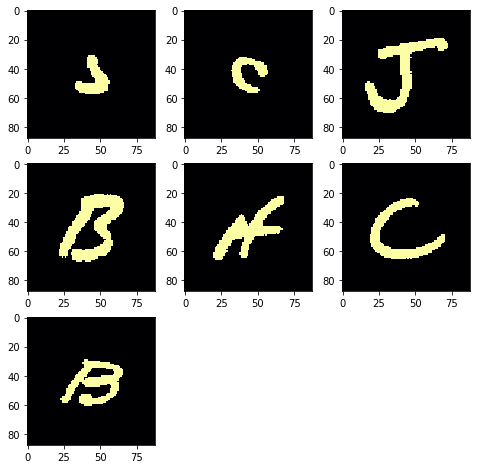

In [63]:
[n,m]  = np.shape(train)                    # number of pixels and number of training data
pix = int(math.sqrt(n))
print([n,m])

fig = plt.figure(figsize=(8,8))
columns = 3
rows = 3
for y in range(columns*rows-2):
    fig.add_subplot(rows, columns, y+1)
    image = np.reshape(train[:,y],(pix,pix),order="F")
    plt.imshow(image, cmap = 'inferno');

#### Normalising train data

In [64]:
normT = np.sqrt(np.diag(train.T.dot(train)))

train = train / np.matlib.repmat(normT.T,n,1)
data = train

print(data.shape)

(7744, 7000)


#### Parameters and variables 

In [65]:
[n,m]  = np.shape(data)                    # number of pixels and number of training data
eta    = 0.05                            # learning rate
winit  = 1                                  # parameter controlling magnitude of initial conditions
alpha = 0.990

tmax   = 40000
letters = 20

W = winit * np.random.rand(letters,n)        # Weight matrix (rows = output neurons, cols = input neurons)
normW = np.sqrt(np.diag(W.dot(W.T)))
normW = normW.reshape(letters,-1)            # reshape normW into a numpy 2d array

W = W / np.matlib.repmat(normW.T,n,1).T    # normalise using repmat
# W = W / normW                               # normalise using numpy broadcasting -  http://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html

noise = np.random.normal(0,1,(letters,n))   # add noise
W = W + noise
print(W.shape)

counter = np.zeros((1,letters))              # counter for the winner neurons
wCount = np.ones((1,tmax+1)) * 0.25         # running avg of the weight change over time

(20, 7744)


####  Implementation, training and output

In [66]:
for t in range(1,tmax):
    i = math.ceil(m * np.random.rand())-1   # get a randomly generated index in the input range
    x = data[:,i]                          # pick a training instance using the random index

    h = W.dot(x)/letters                     # get output firing
    h = h.reshape(h.shape[0],-1)            # reshape h into a numpy 2d array

    output = np.max(h)                      # get the max in the output firing vector
    k = np.argmax(h)                        # get the index of the firing neuron

    counter[0,k] += 1                       # increment counter for winner neuron
    print(counter)

    dw = (eta) * (x.T - W[k,:])               # calculate the change in weights for the k-th output neuron
                                            # get closer to the input (x - W)

    wCount[0,t] = wCount[0,t-1] * (alpha + dw.dot(dw.T)*(1-alpha)) # % weight change over time (running avg)
    
    W[k,:] = W[k,:] + dw                    # weights for k-th output are updated

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 2. 1. 0. 0. 1. 0.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 2. 1. 0. 0. 1. 0.]]
[[0. 0. 0. 2. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 2. 1. 0. 0. 1. 0.]]
[[0. 0. 0. 2. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 2. 1. 0. 0. 1. 1.]]
[[0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 1. 1. 0. 0. 2. 1. 0. 0. 1. 1.]]
[[0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 1. 1. 0. 0. 2. 1. 0. 0. 1. 2.]]
[[0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 1. 1. 0. 0. 2. 1. 0. 0. 1. 3.]]
[[0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 1. 1. 0. 0. 2. 2. 0. 0. 1. 3.]]
[[0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 1. 1. 0. 0. 2. 2. 0. 1. 1. 3.]]
[[0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 1. 1. 1.

[[ 6.  7.  8. 11. 13.  9.  2.  4.  6. 17. 16. 11. 13.  8. 20. 12.  2.  8.
  10. 14.]]
[[ 6.  7.  8. 11. 13. 10.  2.  4.  6. 17. 16. 11. 13.  8. 20. 12.  2.  8.
  10. 14.]]
[[ 6.  7.  8. 11. 13. 10.  2.  4.  6. 17. 16. 11. 13.  8. 20. 12.  3.  8.
  10. 14.]]
[[ 6.  7.  8. 11. 13. 10.  3.  4.  6. 17. 16. 11. 13.  8. 20. 12.  3.  8.
  10. 14.]]
[[ 6.  7.  8. 11. 14. 10.  3.  4.  6. 17. 16. 11. 13.  8. 20. 12.  3.  8.
  10. 14.]]
[[ 6.  7.  8. 11. 14. 10.  3.  4.  6. 17. 16. 11. 13.  8. 21. 12.  3.  8.
  10. 14.]]
[[ 6.  7.  8. 11. 14. 10.  3.  4.  6. 17. 17. 11. 13.  8. 21. 12.  3.  8.
  10. 14.]]
[[ 6.  7.  8. 11. 14. 10.  3.  4.  6. 17. 17. 12. 13.  8. 21. 12.  3.  8.
  10. 14.]]
[[ 7.  7.  8. 11. 14. 10.  3.  4.  6. 17. 17. 12. 13.  8. 21. 12.  3.  8.
  10. 14.]]
[[ 7.  7.  8. 12. 14. 10.  3.  4.  6. 17. 17. 12. 13.  8. 21. 12.  3.  8.
  10. 14.]]
[[ 7.  7.  8. 12. 14. 10.  3.  4.  6. 17. 17. 12. 13.  8. 21. 13.  3.  8.
  10. 14.]]
[[ 7.  7.  8. 12. 15. 10.  3.  4.  6. 17. 17. 12. 13. 

[[ 9. 12. 10. 21. 17. 15.  4. 10. 13. 24. 23. 17. 23. 12. 25. 16.  6. 12.
  14. 17.]]
[[ 9. 12. 10. 21. 17. 15.  4. 11. 13. 24. 23. 17. 23. 12. 25. 16.  6. 12.
  14. 17.]]
[[ 9. 12. 10. 21. 17. 15.  4. 11. 13. 24. 23. 17. 23. 13. 25. 16.  6. 12.
  14. 17.]]
[[ 9. 12. 10. 21. 17. 15.  4. 12. 13. 24. 23. 17. 23. 13. 25. 16.  6. 12.
  14. 17.]]
[[ 9. 12. 10. 21. 17. 15.  4. 12. 13. 24. 23. 17. 23. 13. 25. 16.  6. 13.
  14. 17.]]
[[ 9. 12. 10. 21. 17. 15.  4. 12. 13. 24. 23. 17. 23. 13. 25. 17.  6. 13.
  14. 17.]]
[[ 9. 12. 11. 21. 17. 15.  4. 12. 13. 24. 23. 17. 23. 13. 25. 17.  6. 13.
  14. 17.]]
[[ 9. 12. 11. 21. 17. 15.  4. 12. 14. 24. 23. 17. 23. 13. 25. 17.  6. 13.
  14. 17.]]
[[ 9. 12. 11. 21. 17. 15.  4. 12. 14. 24. 23. 17. 23. 13. 25. 17.  6. 13.
  15. 17.]]
[[ 9. 12. 11. 22. 17. 15.  4. 12. 14. 24. 23. 17. 23. 13. 25. 17.  6. 13.
  15. 17.]]
[[ 9. 12. 11. 22. 17. 15.  4. 12. 14. 24. 23. 17. 23. 13. 25. 18.  6. 13.
  15. 17.]]
[[ 9. 12. 12. 22. 17. 15.  4. 12. 14. 24. 23. 17. 23. 

[[25. 23. 22. 34. 33. 28. 13. 22. 24. 41. 36. 29. 37. 22. 38. 31. 15. 22.
  22. 32.]]
[[25. 23. 22. 34. 33. 28. 13. 22. 24. 41. 37. 29. 37. 22. 38. 31. 15. 22.
  22. 32.]]
[[25. 23. 22. 34. 33. 28. 13. 22. 24. 41. 37. 29. 37. 22. 38. 32. 15. 22.
  22. 32.]]
[[25. 23. 22. 34. 33. 28. 13. 22. 24. 41. 37. 30. 37. 22. 38. 32. 15. 22.
  22. 32.]]
[[25. 23. 22. 34. 33. 28. 13. 22. 24. 41. 37. 30. 37. 22. 38. 32. 15. 22.
  23. 32.]]
[[25. 23. 22. 34. 33. 28. 13. 22. 24. 41. 38. 30. 37. 22. 38. 32. 15. 22.
  23. 32.]]
[[25. 23. 22. 34. 33. 28. 13. 22. 24. 41. 38. 30. 37. 22. 38. 32. 15. 23.
  23. 32.]]
[[25. 23. 22. 34. 33. 28. 13. 23. 24. 41. 38. 30. 37. 22. 38. 32. 15. 23.
  23. 32.]]
[[25. 24. 22. 34. 33. 28. 13. 23. 24. 41. 38. 30. 37. 22. 38. 32. 15. 23.
  23. 32.]]
[[25. 24. 22. 34. 33. 28. 13. 23. 24. 41. 38. 30. 37. 22. 38. 32. 15. 23.
  24. 32.]]
[[25. 24. 22. 35. 33. 28. 13. 23. 24. 41. 38. 30. 37. 22. 38. 32. 15. 23.
  24. 32.]]
[[25. 24. 22. 35. 33. 28. 13. 23. 24. 41. 38. 30. 37. 

[[27. 26. 27. 41. 36. 36. 23. 28. 29. 47. 42. 34. 40. 27. 44. 35. 19. 27.
  31. 38.]]
[[27. 26. 27. 41. 36. 36. 23. 29. 29. 47. 42. 34. 40. 27. 44. 35. 19. 27.
  31. 38.]]
[[27. 26. 27. 41. 36. 36. 23. 29. 29. 48. 42. 34. 40. 27. 44. 35. 19. 27.
  31. 38.]]
[[27. 26. 27. 41. 36. 37. 23. 29. 29. 48. 42. 34. 40. 27. 44. 35. 19. 27.
  31. 38.]]
[[27. 26. 27. 41. 36. 37. 23. 29. 29. 48. 42. 34. 40. 27. 44. 35. 19. 28.
  31. 38.]]
[[27. 26. 27. 41. 36. 37. 23. 30. 29. 48. 42. 34. 40. 27. 44. 35. 19. 28.
  31. 38.]]
[[28. 26. 27. 41. 36. 37. 23. 30. 29. 48. 42. 34. 40. 27. 44. 35. 19. 28.
  31. 38.]]
[[28. 26. 27. 41. 36. 37. 23. 30. 30. 48. 42. 34. 40. 27. 44. 35. 19. 28.
  31. 38.]]
[[28. 26. 27. 41. 36. 37. 23. 30. 30. 48. 42. 34. 40. 27. 44. 35. 19. 29.
  31. 38.]]
[[28. 26. 27. 41. 36. 37. 23. 30. 30. 48. 42. 34. 40. 27. 44. 36. 19. 29.
  31. 38.]]
[[28. 26. 27. 41. 36. 37. 23. 30. 30. 49. 42. 34. 40. 27. 44. 36. 19. 29.
  31. 38.]]
[[28. 26. 27. 41. 36. 37. 23. 30. 30. 49. 43. 34. 40. 

[[37. 36. 34. 53. 47. 45. 34. 39. 37. 70. 54. 42. 56. 42. 54. 47. 28. 41.
  46. 46.]]
[[37. 36. 34. 54. 47. 45. 34. 39. 37. 70. 54. 42. 56. 42. 54. 47. 28. 41.
  46. 46.]]
[[37. 36. 34. 54. 47. 45. 34. 39. 37. 70. 54. 42. 57. 42. 54. 47. 28. 41.
  46. 46.]]
[[37. 36. 34. 54. 47. 45. 34. 39. 37. 70. 55. 42. 57. 42. 54. 47. 28. 41.
  46. 46.]]
[[37. 36. 34. 54. 47. 45. 34. 39. 37. 70. 55. 42. 57. 43. 54. 47. 28. 41.
  46. 46.]]
[[37. 36. 35. 54. 47. 45. 34. 39. 37. 70. 55. 42. 57. 43. 54. 47. 28. 41.
  46. 46.]]
[[37. 36. 35. 54. 47. 45. 35. 39. 37. 70. 55. 42. 57. 43. 54. 47. 28. 41.
  46. 46.]]
[[37. 36. 35. 54. 47. 45. 35. 39. 38. 70. 55. 42. 57. 43. 54. 47. 28. 41.
  46. 46.]]
[[37. 36. 35. 54. 47. 45. 35. 39. 38. 70. 55. 42. 58. 43. 54. 47. 28. 41.
  46. 46.]]
[[37. 36. 35. 55. 47. 45. 35. 39. 38. 70. 55. 42. 58. 43. 54. 47. 28. 41.
  46. 46.]]
[[37. 36. 35. 55. 47. 45. 35. 39. 38. 70. 55. 42. 58. 44. 54. 47. 28. 41.
  46. 46.]]
[[37. 36. 35. 55. 47. 45. 35. 39. 38. 70. 55. 42. 58. 

[[41. 45. 41. 59. 51. 50. 40. 43. 40. 82. 62. 48. 63. 54. 60. 54. 31. 46.
  55. 50.]]
[[41. 45. 42. 59. 51. 50. 40. 43. 40. 82. 62. 48. 63. 54. 60. 54. 31. 46.
  55. 50.]]
[[41. 45. 42. 59. 52. 50. 40. 43. 40. 82. 62. 48. 63. 54. 60. 54. 31. 46.
  55. 50.]]
[[41. 45. 43. 59. 52. 50. 40. 43. 40. 82. 62. 48. 63. 54. 60. 54. 31. 46.
  55. 50.]]
[[41. 45. 43. 60. 52. 50. 40. 43. 40. 82. 62. 48. 63. 54. 60. 54. 31. 46.
  55. 50.]]
[[41. 45. 43. 60. 52. 50. 40. 43. 40. 82. 62. 48. 63. 55. 60. 54. 31. 46.
  55. 50.]]
[[41. 45. 43. 60. 52. 50. 40. 43. 40. 82. 62. 48. 63. 55. 60. 55. 31. 46.
  55. 50.]]
[[41. 45. 43. 60. 52. 50. 40. 43. 40. 82. 62. 48. 63. 56. 60. 55. 31. 46.
  55. 50.]]
[[41. 45. 43. 60. 52. 50. 40. 43. 40. 82. 62. 48. 63. 56. 61. 55. 31. 46.
  55. 50.]]
[[41. 45. 43. 60. 52. 50. 40. 43. 40. 82. 62. 48. 63. 56. 61. 55. 31. 46.
  56. 50.]]
[[41. 45. 43. 60. 52. 50. 40. 43. 40. 83. 62. 48. 63. 56. 61. 55. 31. 46.
  56. 50.]]
[[41. 45. 43. 60. 52. 50. 40. 43. 40. 83. 62. 48. 63. 

[[ 51.  53.  48.  70.  70.  63.  42.  47.  48. 103.  68.  55.  76.  75.
   82.  63.  39.  55.  71.  60.]]
[[ 51.  53.  48.  70.  70.  63.  42.  47.  48. 103.  68.  55.  76.  75.
   82.  64.  39.  55.  71.  60.]]
[[ 51.  53.  48.  70.  70.  63.  42.  47.  48. 103.  68.  55.  76.  75.
   82.  65.  39.  55.  71.  60.]]
[[ 51.  53.  48.  70.  70.  63.  42.  47.  48. 103.  68.  55.  76.  75.
   82.  65.  39.  55.  71.  61.]]
[[ 52.  53.  48.  70.  70.  63.  42.  47.  48. 103.  68.  55.  76.  75.
   82.  65.  39.  55.  71.  61.]]
[[ 52.  53.  48.  70.  70.  63.  42.  47.  48. 103.  68.  55.  76.  75.
   83.  65.  39.  55.  71.  61.]]
[[ 52.  53.  48.  70.  70.  63.  42.  47.  48. 104.  68.  55.  76.  75.
   83.  65.  39.  55.  71.  61.]]
[[ 52.  53.  48.  70.  70.  63.  42.  48.  48. 104.  68.  55.  76.  75.
   83.  65.  39.  55.  71.  61.]]
[[ 52.  53.  48.  70.  70.  63.  42.  48.  48. 104.  68.  55.  76.  76.
   83.  65.  39.  55.  71.  61.]]
[[ 52.  53.  48.  70.  70.  63.  42.  48.  48.

[[ 56.  57.  50.  82.  77.  70.  44.  50.  52. 111.  73.  56.  87.  84.
   88.  70.  41.  60.  77.  62.]]
[[ 56.  57.  50.  82.  77.  70.  44.  50.  52. 111.  73.  56.  87.  84.
   88.  71.  41.  60.  77.  62.]]
[[ 56.  57.  50.  82.  77.  70.  44.  50.  52. 111.  73.  57.  87.  84.
   88.  71.  41.  60.  77.  62.]]
[[ 56.  57.  50.  82.  77.  70.  44.  50.  52. 112.  73.  57.  87.  84.
   88.  71.  41.  60.  77.  62.]]
[[ 56.  57.  50.  82.  77.  70.  44.  50.  52. 112.  73.  57.  87.  85.
   88.  71.  41.  60.  77.  62.]]
[[ 56.  57.  50.  82.  77.  70.  44.  50.  52. 112.  73.  57.  87.  85.
   88.  71.  42.  60.  77.  62.]]
[[ 56.  57.  50.  82.  77.  70.  45.  50.  52. 112.  73.  57.  87.  85.
   88.  71.  42.  60.  77.  62.]]
[[ 56.  57.  50.  82.  77.  70.  45.  50.  52. 112.  73.  58.  87.  85.
   88.  71.  42.  60.  77.  62.]]
[[ 56.  57.  50.  82.  78.  70.  45.  50.  52. 112.  73.  58.  87.  85.
   88.  71.  42.  60.  77.  62.]]
[[ 56.  57.  50.  82.  78.  70.  46.  50.  52.

[[ 60.  65.  53.  93.  92.  91.  54.  58.  57. 134.  80.  63. 115. 124.
   94.  80.  47.  68.  95.  68.]]
[[ 60.  65.  53.  93.  92.  91.  54.  58.  57. 134.  80.  63. 116. 124.
   94.  80.  47.  68.  95.  68.]]
[[ 60.  65.  53.  93.  92.  91.  54.  58.  57. 135.  80.  63. 116. 124.
   94.  80.  47.  68.  95.  68.]]
[[ 60.  65.  53.  93.  92.  91.  54.  58.  57. 136.  80.  63. 116. 124.
   94.  80.  47.  68.  95.  68.]]
[[ 60.  65.  53.  93.  92.  91.  54.  58.  57. 136.  80.  63. 116. 125.
   94.  80.  47.  68.  95.  68.]]
[[ 60.  65.  53.  93.  92.  91.  54.  58.  57. 136.  80.  63. 116. 126.
   94.  80.  47.  68.  95.  68.]]
[[ 60.  65.  53.  94.  92.  91.  54.  58.  57. 136.  80.  63. 116. 126.
   94.  80.  47.  68.  95.  68.]]
[[ 60.  65.  53.  94.  92.  91.  54.  58.  57. 136.  80.  63. 116. 126.
   94.  81.  47.  68.  95.  68.]]
[[ 60.  65.  53.  94.  92.  91.  54.  58.  57. 137.  80.  63. 116. 126.
   94.  81.  47.  68.  95.  68.]]
[[ 60.  66.  53.  94.  92.  91.  54.  58.  57.

[[ 70.  71.  55. 103.  95. 100.  56.  63.  57. 141.  83.  64. 125. 135.
   99.  93.  47.  70.  99.  70.]]
[[ 70.  71.  55. 104.  95. 100.  56.  63.  57. 141.  83.  64. 125. 135.
   99.  93.  47.  70.  99.  70.]]
[[ 71.  71.  55. 104.  95. 100.  56.  63.  57. 141.  83.  64. 125. 135.
   99.  93.  47.  70.  99.  70.]]
[[ 71.  71.  55. 105.  95. 100.  56.  63.  57. 141.  83.  64. 125. 135.
   99.  93.  47.  70.  99.  70.]]
[[ 71.  71.  55. 105.  95. 100.  56.  63.  57. 141.  83.  64. 126. 135.
   99.  93.  47.  70.  99.  70.]]
[[ 72.  71.  55. 105.  95. 100.  56.  63.  57. 141.  83.  64. 126. 135.
   99.  93.  47.  70.  99.  70.]]
[[ 72.  71.  55. 105.  96. 100.  56.  63.  57. 141.  83.  64. 126. 135.
   99.  93.  47.  70.  99.  70.]]
[[ 72.  71.  55. 105.  96. 100.  56.  63.  57. 141.  83.  64. 126. 135.
   99.  93.  48.  70.  99.  70.]]
[[ 72.  71.  55. 105.  96. 101.  56.  63.  57. 141.  83.  64. 126. 135.
   99.  93.  48.  70.  99.  70.]]
[[ 72.  71.  55. 105.  96. 101.  56.  63.  57.

[[ 74.  85.  60. 125. 109. 120.  61.  74.  62. 164.  87.  68. 149. 159.
  110. 108.  53.  76. 113.  78.]]
[[ 74.  85.  60. 125. 109. 120.  61.  74.  62. 164.  87.  68. 149. 160.
  110. 108.  53.  76. 113.  78.]]
[[ 74.  85.  60. 125. 109. 120.  61.  74.  62. 164.  87.  68. 150. 160.
  110. 108.  53.  76. 113.  78.]]
[[ 74.  85.  60. 125. 109. 120.  61.  74.  62. 164.  87.  68. 150. 160.
  110. 109.  53.  76. 113.  78.]]
[[ 74.  85.  60. 125. 109. 120.  61.  74.  62. 165.  87.  68. 150. 160.
  110. 109.  53.  76. 113.  78.]]
[[ 74.  85.  60. 125. 109. 120.  61.  74.  62. 165.  87.  68. 150. 160.
  110. 109.  53.  76. 113.  79.]]
[[ 74.  85.  60. 125. 109. 120.  61.  74.  62. 165.  87.  68. 150. 160.
  110. 109.  53.  77. 113.  79.]]
[[ 74.  85.  60. 125. 109. 120.  61.  74.  62. 165.  87.  68. 150. 160.
  110. 109.  53.  77. 114.  79.]]
[[ 74.  85.  60. 125. 109. 121.  61.  74.  62. 165.  87.  68. 150. 160.
  110. 109.  53.  77. 114.  79.]]
[[ 74.  85.  60. 125. 110. 121.  61.  74.  62.

[[ 76.  89.  62. 130. 120. 136.  62.  77.  66. 176.  89.  69. 161. 168.
  115. 117.  54.  80. 119.  80.]]
[[ 76.  89.  62. 130. 120. 136.  62.  77.  67. 176.  89.  69. 161. 168.
  115. 117.  54.  80. 119.  80.]]
[[ 76.  89.  62. 130. 120. 136.  62.  77.  67. 177.  89.  69. 161. 168.
  115. 117.  54.  80. 119.  80.]]
[[ 76.  89.  62. 130. 120. 136.  62.  77.  67. 177.  89.  69. 162. 168.
  115. 117.  54.  80. 119.  80.]]
[[ 76.  89.  62. 130. 120. 137.  62.  77.  67. 177.  89.  69. 162. 168.
  115. 117.  54.  80. 119.  80.]]
[[ 76.  89.  62. 130. 121. 137.  62.  77.  67. 177.  89.  69. 162. 168.
  115. 117.  54.  80. 119.  80.]]
[[ 76.  89.  62. 130. 121. 137.  62.  77.  67. 177.  89.  69. 162. 168.
  115. 117.  54.  80. 120.  80.]]
[[ 76.  89.  62. 130. 121. 137.  62.  78.  67. 177.  89.  69. 162. 168.
  115. 117.  54.  80. 120.  80.]]
[[ 76.  89.  62. 130. 121. 137.  62.  78.  67. 177.  89.  69. 162. 168.
  115. 117.  54.  81. 120.  80.]]
[[ 76.  89.  62. 130. 121. 138.  62.  78.  67.

[[ 82.  94.  63. 148. 139. 158.  66.  88.  75. 191.  95.  70. 193. 191.
  120. 140.  56.  84. 133.  82.]]
[[ 82.  94.  63. 148. 139. 158.  66.  88.  75. 191.  96.  70. 193. 191.
  120. 140.  56.  84. 133.  82.]]
[[ 82.  94.  63. 148. 139. 158.  66.  88.  75. 192.  96.  70. 193. 191.
  120. 140.  56.  84. 133.  82.]]
[[ 82.  94.  63. 148. 139. 158.  66.  89.  75. 192.  96.  70. 193. 191.
  120. 140.  56.  84. 133.  82.]]
[[ 82.  94.  63. 148. 139. 159.  66.  89.  75. 192.  96.  70. 193. 191.
  120. 140.  56.  84. 133.  82.]]
[[ 82.  94.  63. 148. 139. 159.  66.  89.  75. 192.  96.  70. 193. 191.
  120. 141.  56.  84. 133.  82.]]
[[ 82.  94.  63. 148. 139. 159.  66.  90.  75. 192.  96.  70. 193. 191.
  120. 141.  56.  84. 133.  82.]]
[[ 82.  94.  63. 148. 139. 159.  66.  90.  75. 192.  96.  70. 194. 191.
  120. 141.  56.  84. 133.  82.]]
[[ 82.  94.  63. 148. 139. 159.  66.  90.  75. 193.  96.  70. 194. 191.
  120. 141.  56.  84. 133.  82.]]
[[ 82.  94.  63. 148. 140. 159.  66.  90.  75.

[[ 83.  94.  65. 159. 145. 172.  67.  99.  80. 200. 101.  70. 203. 204.
  123. 158.  59.  87. 138.  83.]]
[[ 83.  94.  65. 159. 145. 172.  67.  99.  80. 200. 101.  70. 203. 204.
  123. 158.  59.  87. 138.  84.]]
[[ 83.  94.  65. 159. 145. 172.  67. 100.  80. 200. 101.  70. 203. 204.
  123. 158.  59.  87. 138.  84.]]
[[ 83.  94.  65. 159. 146. 172.  67. 100.  80. 200. 101.  70. 203. 204.
  123. 158.  59.  87. 138.  84.]]
[[ 83.  94.  65. 160. 146. 172.  67. 100.  80. 200. 101.  70. 203. 204.
  123. 158.  59.  87. 138.  84.]]
[[ 83.  94.  65. 160. 146. 172.  67. 101.  80. 200. 101.  70. 203. 204.
  123. 158.  59.  87. 138.  84.]]
[[ 83.  94.  65. 160. 146. 172.  67. 101.  80. 200. 101.  70. 203. 204.
  123. 158.  59.  87. 139.  84.]]
[[ 83.  94.  65. 160. 146. 172.  67. 101.  80. 201. 101.  70. 203. 204.
  123. 158.  59.  87. 139.  84.]]
[[ 83.  94.  65. 160. 146. 172.  67. 101.  80. 202. 101.  70. 203. 204.
  123. 158.  59.  87. 139.  84.]]
[[ 83.  94.  65. 160. 146. 172.  68. 101.  80.

[[ 92.  99.  66. 177. 163. 195.  70. 111.  84. 219. 104.  73. 226. 232.
  135. 169.  61.  91. 154.  87.]]
[[ 92.  99.  66. 177. 163. 195.  70. 111.  84. 219. 104.  73. 227. 232.
  135. 169.  61.  91. 154.  87.]]
[[ 92.  99.  66. 177. 163. 196.  70. 111.  84. 219. 104.  73. 227. 232.
  135. 169.  61.  91. 154.  87.]]
[[ 92.  99.  66. 177. 163. 196.  70. 111.  84. 219. 104.  73. 227. 233.
  135. 169.  61.  91. 154.  87.]]
[[ 92.  99.  66. 178. 163. 196.  70. 111.  84. 219. 104.  73. 227. 233.
  135. 169.  61.  91. 154.  87.]]
[[ 92.  99.  66. 178. 163. 197.  70. 111.  84. 219. 104.  73. 227. 233.
  135. 169.  61.  91. 154.  87.]]
[[ 92.  99.  66. 178. 163. 197.  70. 111.  84. 219. 104.  73. 227. 234.
  135. 169.  61.  91. 154.  87.]]
[[ 92.  99.  66. 178. 163. 197.  70. 111.  84. 219. 104.  73. 227. 234.
  135. 170.  61.  91. 154.  87.]]
[[ 92.  99.  66. 178. 163. 197.  70. 111.  84. 219. 104.  73. 227. 234.
  135. 171.  61.  91. 154.  87.]]
[[ 92.  99.  66. 178. 163. 197.  70. 111.  84.

[[ 94. 102.  68. 196. 168. 208.  70. 116.  88. 228. 110.  73. 235. 245.
  137. 175.  61.  92. 160.  89.]]
[[ 94. 102.  68. 196. 168. 209.  70. 116.  88. 228. 110.  73. 235. 245.
  137. 175.  61.  92. 160.  89.]]
[[ 94. 102.  68. 196. 168. 209.  70. 116.  88. 228. 110.  73. 235. 246.
  137. 175.  61.  92. 160.  89.]]
[[ 94. 102.  68. 197. 168. 209.  70. 116.  88. 228. 110.  73. 235. 246.
  137. 175.  61.  92. 160.  89.]]
[[ 94. 102.  68. 197. 168. 210.  70. 116.  88. 228. 110.  73. 235. 246.
  137. 175.  61.  92. 160.  89.]]
[[ 94. 102.  68. 197. 168. 210.  70. 117.  88. 228. 110.  73. 235. 246.
  137. 175.  61.  92. 160.  89.]]
[[ 94. 102.  68. 197. 168. 211.  70. 117.  88. 228. 110.  73. 235. 246.
  137. 175.  61.  92. 160.  89.]]
[[ 94. 102.  68. 197. 168. 211.  70. 117.  88. 228. 110.  73. 236. 246.
  137. 175.  61.  92. 160.  89.]]
[[ 94. 102.  68. 198. 168. 211.  70. 117.  88. 228. 110.  73. 236. 246.
  137. 175.  61.  92. 160.  89.]]
[[ 94. 102.  68. 198. 168. 211.  70. 117.  88.

[[ 97. 110.  68. 226. 187. 245.  72. 133.  92. 244. 117.  74. 256. 276.
  151. 197.  61.  98. 167.  93.]]
[[ 97. 110.  68. 226. 187. 245.  72. 133.  92. 244. 117.  74. 256. 276.
  152. 197.  61.  98. 167.  93.]]
[[ 97. 110.  68. 226. 187. 245.  72. 133.  92. 244. 117.  74. 256. 276.
  152. 198.  61.  98. 167.  93.]]
[[ 97. 110.  68. 226. 187. 245.  72. 133.  92. 244. 117.  74. 257. 276.
  152. 198.  61.  98. 167.  93.]]
[[ 97. 111.  68. 226. 187. 245.  72. 133.  92. 244. 117.  74. 257. 276.
  152. 198.  61.  98. 167.  93.]]
[[ 97. 111.  68. 226. 187. 245.  72. 133.  92. 245. 117.  74. 257. 276.
  152. 198.  61.  98. 167.  93.]]
[[ 97. 111.  68. 226. 187. 245.  72. 133.  92. 245. 117.  74. 257. 277.
  152. 198.  61.  98. 167.  93.]]
[[ 97. 111.  68. 226. 187. 245.  72. 133.  92. 245. 117.  74. 258. 277.
  152. 198.  61.  98. 167.  93.]]
[[ 97. 111.  68. 226. 187. 245.  72. 133.  92. 245. 117.  74. 259. 277.
  152. 198.  61.  98. 167.  93.]]
[[ 97. 111.  68. 226. 187. 245.  72. 133.  92.

[[101. 113.  69. 248. 191. 256.  72. 138.  97. 256. 120.  75. 265. 291.
  155. 202.  61.  98. 169.  94.]]
[[101. 113.  69. 248. 191. 256.  72. 139.  97. 256. 120.  75. 265. 291.
  155. 202.  61.  98. 169.  94.]]
[[101. 113.  69. 248. 191. 257.  72. 139.  97. 256. 120.  75. 265. 291.
  155. 202.  61.  98. 169.  94.]]
[[101. 113.  69. 249. 191. 257.  72. 139.  97. 256. 120.  75. 265. 291.
  155. 202.  61.  98. 169.  94.]]
[[101. 113.  69. 249. 191. 257.  72. 140.  97. 256. 120.  75. 265. 291.
  155. 202.  61.  98. 169.  94.]]
[[101. 113.  69. 249. 191. 257.  72. 140.  97. 256. 120.  75. 265. 291.
  155. 203.  61.  98. 169.  94.]]
[[101. 113.  69. 249. 191. 257.  72. 140.  97. 256. 120.  75. 265. 291.
  156. 203.  61.  98. 169.  94.]]
[[101. 113.  69. 249. 191. 257.  72. 140.  97. 256. 120.  75. 265. 292.
  156. 203.  61.  98. 169.  94.]]
[[101. 113.  69. 249. 191. 257.  72. 140.  97. 256. 120.  75. 265. 292.
  156. 204.  61.  98. 169.  94.]]
[[101. 113.  69. 250. 191. 257.  72. 140.  97.

[[105. 116.  72. 286. 203. 283.  73. 149. 104. 275. 129.  76. 286. 325.
  163. 232.  66.  99. 177.  96.]]
[[105. 116.  72. 286. 203. 283.  73. 149. 104. 276. 129.  76. 286. 325.
  163. 232.  66.  99. 177.  96.]]
[[105. 116.  72. 286. 203. 283.  73. 149. 104. 276. 129.  76. 286. 325.
  163. 233.  66.  99. 177.  96.]]
[[105. 116.  72. 286. 203. 284.  73. 149. 104. 276. 129.  76. 286. 325.
  163. 233.  66.  99. 177.  96.]]
[[105. 116.  72. 286. 203. 284.  73. 150. 104. 276. 129.  76. 286. 325.
  163. 233.  66.  99. 177.  96.]]
[[105. 116.  72. 286. 203. 284.  73. 150. 104. 276. 129.  76. 286. 326.
  163. 233.  66.  99. 177.  96.]]
[[105. 116.  72. 286. 203. 284.  73. 150. 104. 276. 129.  77. 286. 326.
  163. 233.  66.  99. 177.  96.]]
[[105. 116.  72. 286. 204. 284.  73. 150. 104. 276. 129.  77. 286. 326.
  163. 233.  66.  99. 177.  96.]]
[[105. 116.  72. 286. 204. 284.  73. 150. 104. 277. 129.  77. 286. 326.
  163. 233.  66.  99. 177.  96.]]
[[105. 117.  72. 286. 204. 284.  73. 150. 104.

[[107. 120.  73. 308. 210. 300.  73. 156. 108. 282. 131.  77. 297. 341.
  166. 236.  68. 102. 180.  97.]]
[[107. 120.  73. 308. 210. 300.  73. 156. 108. 282. 131.  77. 297. 341.
  166. 237.  68. 102. 180.  97.]]
[[107. 120.  73. 308. 210. 300.  73. 156. 108. 282. 131.  77. 297. 342.
  166. 237.  68. 102. 180.  97.]]
[[107. 120.  73. 308. 210. 300.  73. 156. 108. 282. 131.  77. 298. 342.
  166. 237.  68. 102. 180.  97.]]
[[107. 120.  73. 309. 210. 300.  73. 156. 108. 282. 131.  77. 298. 342.
  166. 237.  68. 102. 180.  97.]]
[[107. 120.  73. 309. 210. 300.  73. 156. 108. 283. 131.  77. 298. 342.
  166. 237.  68. 102. 180.  97.]]
[[107. 120.  73. 309. 210. 300.  73. 156. 108. 283. 132.  77. 298. 342.
  166. 237.  68. 102. 180.  97.]]
[[107. 120.  73. 309. 210. 300.  73. 157. 108. 283. 132.  77. 298. 342.
  166. 237.  68. 102. 180.  97.]]
[[107. 120.  73. 310. 210. 300.  73. 157. 108. 283. 132.  77. 298. 342.
  166. 237.  68. 102. 180.  97.]]
[[107. 120.  73. 310. 210. 301.  73. 157. 108.

[[107. 124.  74. 359. 223. 336.  74. 167. 113. 295. 142.  79. 311. 375.
  168. 252.  70. 108. 185.  98.]]
[[107. 124.  74. 359. 223. 336.  74. 167. 113. 296. 142.  79. 311. 375.
  168. 252.  70. 108. 185.  98.]]
[[107. 125.  74. 359. 223. 336.  74. 167. 113. 296. 142.  79. 311. 375.
  168. 252.  70. 108. 185.  98.]]
[[107. 125.  74. 359. 223. 336.  74. 167. 113. 297. 142.  79. 311. 375.
  168. 252.  70. 108. 185.  98.]]
[[108. 125.  74. 359. 223. 336.  74. 167. 113. 297. 142.  79. 311. 375.
  168. 252.  70. 108. 185.  98.]]
[[108. 125.  74. 359. 223. 336.  74. 167. 113. 297. 142.  79. 311. 376.
  168. 252.  70. 108. 185.  98.]]
[[108. 125.  74. 360. 223. 336.  74. 167. 113. 297. 142.  79. 311. 376.
  168. 252.  70. 108. 185.  98.]]
[[108. 125.  74. 360. 223. 336.  74. 167. 114. 297. 142.  79. 311. 376.
  168. 252.  70. 108. 185.  98.]]
[[108. 125.  74. 360. 223. 336.  74. 167. 114. 297. 142.  79. 311. 376.
  168. 252.  70. 108. 186.  98.]]
[[108. 125.  74. 360. 223. 336.  74. 167. 114.

[[111. 128.  75. 388. 229. 348.  75. 171. 117. 309. 146.  79. 316. 393.
  169. 261.  71. 110. 192.  99.]]
[[111. 128.  75. 388. 229. 348.  75. 171. 118. 309. 146.  79. 316. 393.
  169. 261.  71. 110. 192.  99.]]
[[111. 128.  75. 388. 229. 348.  75. 171. 118. 309. 146.  79. 316. 394.
  169. 261.  71. 110. 192.  99.]]
[[111. 128.  75. 388. 230. 348.  75. 171. 118. 309. 146.  79. 316. 394.
  169. 261.  71. 110. 192.  99.]]
[[111. 128.  75. 388. 231. 348.  75. 171. 118. 309. 146.  79. 316. 394.
  169. 261.  71. 110. 192.  99.]]
[[111. 128.  75. 388. 231. 348.  75. 171. 118. 310. 146.  79. 316. 394.
  169. 261.  71. 110. 192.  99.]]
[[111. 128.  75. 388. 231. 348.  75. 171. 118. 310. 146.  79. 316. 394.
  169. 262.  71. 110. 192.  99.]]
[[111. 128.  75. 388. 231. 349.  75. 171. 118. 310. 146.  79. 316. 394.
  169. 262.  71. 110. 192.  99.]]
[[111. 128.  75. 388. 231. 349.  75. 171. 118. 310. 146.  79. 316. 395.
  169. 262.  71. 110. 192.  99.]]
[[111. 128.  75. 388. 231. 349.  75. 171. 118.

[[114. 134.  82. 435. 247. 373.  76. 184. 124. 327. 152.  79. 331. 416.
  170. 281.  73. 113. 197. 103.]]
[[114. 134.  82. 435. 247. 373.  76. 184. 124. 327. 152.  79. 331. 416.
  170. 281.  73. 113. 197. 104.]]
[[114. 134.  82. 436. 247. 373.  76. 184. 124. 327. 152.  79. 331. 416.
  170. 281.  73. 113. 197. 104.]]
[[114. 134.  82. 436. 247. 373.  76. 184. 124. 327. 152.  79. 331. 416.
  170. 281.  73. 113. 198. 104.]]
[[114. 134.  82. 436. 247. 374.  76. 184. 124. 327. 152.  79. 331. 416.
  170. 281.  73. 113. 198. 104.]]
[[114. 134.  82. 437. 247. 374.  76. 184. 124. 327. 152.  79. 331. 416.
  170. 281.  73. 113. 198. 104.]]
[[114. 134.  82. 437. 247. 374.  76. 184. 124. 327. 152.  79. 331. 416.
  170. 282.  73. 113. 198. 104.]]
[[114. 134.  82. 437. 247. 375.  76. 184. 124. 327. 152.  79. 331. 416.
  170. 282.  73. 113. 198. 104.]]
[[114. 134.  82. 437. 247. 375.  76. 184. 124. 327. 152.  79. 331. 417.
  170. 282.  73. 113. 198. 104.]]
[[114. 134.  82. 438. 247. 375.  76. 184. 124.

[[117. 135.  85. 456. 254. 386.  76. 190. 127. 330. 154.  79. 342. 431.
  174. 295.  74. 114. 204. 104.]]
[[117. 135.  85. 457. 254. 386.  76. 190. 127. 330. 154.  79. 342. 431.
  174. 295.  74. 114. 204. 104.]]
[[117. 135.  85. 457. 255. 386.  76. 190. 127. 330. 154.  79. 342. 431.
  174. 295.  74. 114. 204. 104.]]
[[117. 135.  85. 457. 255. 386.  76. 190. 127. 330. 154.  79. 342. 431.
  174. 295.  74. 114. 205. 104.]]
[[117. 135.  85. 457. 255. 387.  76. 190. 127. 330. 154.  79. 342. 431.
  174. 295.  74. 114. 205. 104.]]
[[117. 135.  85. 457. 255. 388.  76. 190. 127. 330. 154.  79. 342. 431.
  174. 295.  74. 114. 205. 104.]]
[[117. 135.  86. 457. 255. 388.  76. 190. 127. 330. 154.  79. 342. 431.
  174. 295.  74. 114. 205. 104.]]
[[117. 135.  86. 457. 255. 388.  76. 190. 127. 330. 154.  79. 342. 431.
  174. 295.  74. 114. 206. 104.]]
[[117. 135.  86. 457. 256. 388.  76. 190. 127. 330. 154.  79. 342. 431.
  174. 295.  74. 114. 206. 104.]]
[[117. 135.  86. 458. 256. 388.  76. 190. 127.

[[119. 142.  90. 488. 265. 419.  77. 200. 134. 344. 163.  80. 359. 457.
  179. 307.  76. 119. 213. 106.]]
[[119. 142.  90. 488. 265. 419.  77. 200. 134. 344. 163.  80. 359. 457.
  179. 308.  76. 119. 213. 106.]]
[[119. 142.  90. 488. 266. 419.  77. 200. 134. 344. 163.  80. 359. 457.
  179. 308.  76. 119. 213. 106.]]
[[119. 142.  90. 489. 266. 419.  77. 200. 134. 344. 163.  80. 359. 457.
  179. 308.  76. 119. 213. 106.]]
[[119. 142.  90. 489. 266. 419.  77. 200. 134. 344. 163.  80. 359. 457.
  179. 309.  76. 119. 213. 106.]]
[[119. 142.  90. 489. 266. 419.  77. 200. 134. 344. 163.  80. 360. 457.
  179. 309.  76. 119. 213. 106.]]
[[119. 142.  90. 489. 266. 420.  77. 200. 134. 344. 163.  80. 360. 457.
  179. 309.  76. 119. 213. 106.]]
[[119. 142.  90. 489. 266. 420.  77. 200. 134. 344. 163.  80. 360. 457.
  179. 309.  76. 120. 213. 106.]]
[[119. 142.  90. 489. 266. 420.  77. 200. 134. 344. 163.  80. 360. 457.
  180. 309.  76. 120. 213. 106.]]
[[120. 142.  90. 489. 266. 420.  77. 200. 134.

[[121. 146.  94. 503. 271. 428.  78. 204. 140. 348. 167.  80. 366. 467.
  182. 319.  76. 121. 218. 108.]]
[[121. 146.  94. 503. 271. 428.  78. 204. 140. 349. 167.  80. 366. 467.
  182. 319.  76. 121. 218. 108.]]
[[121. 146.  94. 503. 271. 429.  78. 204. 140. 349. 167.  80. 366. 467.
  182. 319.  76. 121. 218. 108.]]
[[121. 146.  95. 503. 271. 429.  78. 204. 140. 349. 167.  80. 366. 467.
  182. 319.  76. 121. 218. 108.]]
[[121. 146.  95. 503. 271. 429.  78. 204. 140. 349. 167.  80. 366. 467.
  182. 320.  76. 121. 218. 108.]]
[[121. 146.  95. 504. 271. 429.  78. 204. 140. 349. 167.  80. 366. 467.
  182. 320.  76. 121. 218. 108.]]
[[121. 146.  95. 505. 271. 429.  78. 204. 140. 349. 167.  80. 366. 467.
  182. 320.  76. 121. 218. 108.]]
[[121. 146.  95. 505. 271. 429.  78. 204. 140. 349. 167.  80. 366. 468.
  182. 320.  76. 121. 218. 108.]]
[[121. 146.  95. 505. 271. 430.  78. 204. 140. 349. 167.  80. 366. 468.
  182. 320.  76. 121. 218. 108.]]
[[121. 147.  95. 505. 271. 430.  78. 204. 140.

[[123. 153.  99. 542. 285. 452.  78. 212. 147. 367. 171.  82. 384. 495.
  185. 339.  79. 126. 229. 109.]]
[[123. 153.  99. 542. 285. 452.  78. 212. 147. 367. 171.  82. 384. 496.
  185. 339.  79. 126. 229. 109.]]
[[123. 153.  99. 542. 285. 452.  78. 212. 147. 368. 171.  82. 384. 496.
  185. 339.  79. 126. 229. 109.]]
[[123. 153.  99. 542. 285. 452.  78. 212. 147. 369. 171.  82. 384. 496.
  185. 339.  79. 126. 229. 109.]]
[[123. 153.  99. 542. 285. 452.  78. 212. 147. 369. 171.  82. 385. 496.
  185. 339.  79. 126. 229. 109.]]
[[123. 153.  99. 542. 285. 452.  78. 212. 148. 369. 171.  82. 385. 496.
  185. 339.  79. 126. 229. 109.]]
[[123. 153.  99. 542. 285. 452.  78. 212. 148. 369. 171.  82. 385. 496.
  186. 339.  79. 126. 229. 109.]]
[[123. 153.  99. 543. 285. 452.  78. 212. 148. 369. 171.  82. 385. 496.
  186. 339.  79. 126. 229. 109.]]
[[123. 153.  99. 543. 285. 453.  78. 212. 148. 369. 171.  82. 385. 496.
  186. 339.  79. 126. 229. 109.]]
[[123. 153.  99. 543. 285. 453.  78. 212. 148.

[[124. 156. 101. 571. 292. 463.  78. 217. 150. 375. 174.  83. 392. 502.
  187. 354.  82. 126. 231. 109.]]
[[124. 156. 101. 571. 292. 464.  78. 217. 150. 375. 174.  83. 392. 502.
  187. 354.  82. 126. 231. 109.]]
[[124. 156. 101. 571. 292. 464.  78. 217. 150. 375. 174.  83. 393. 502.
  187. 354.  82. 126. 231. 109.]]
[[124. 156. 101. 571. 292. 464.  78. 217. 150. 375. 174.  83. 393. 503.
  187. 354.  82. 126. 231. 109.]]
[[124. 156. 101. 571. 292. 464.  78. 218. 150. 375. 174.  83. 393. 503.
  187. 354.  82. 126. 231. 109.]]
[[124. 156. 101. 571. 292. 464.  78. 218. 150. 376. 174.  83. 393. 503.
  187. 354.  82. 126. 231. 109.]]
[[124. 156. 101. 571. 292. 464.  78. 218. 150. 376. 174.  83. 393. 503.
  187. 354.  82. 126. 232. 109.]]
[[124. 156. 101. 571. 292. 464.  78. 218. 150. 376. 174.  83. 394. 503.
  187. 354.  82. 126. 232. 109.]]
[[124. 156. 102. 571. 292. 464.  78. 218. 150. 376. 174.  83. 394. 503.
  187. 354.  82. 126. 232. 109.]]
[[124. 156. 102. 571. 292. 465.  78. 218. 150.

[[129. 159. 109. 604. 304. 486.  79. 223. 155. 389. 180.  83. 407. 532.
  190. 389.  85. 129. 235. 111.]]
[[129. 159. 109. 604. 304. 486.  79. 223. 155. 389. 180.  83. 407. 532.
  190. 390.  85. 129. 235. 111.]]
[[129. 159. 109. 604. 304. 486.  79. 223. 155. 389. 180.  83. 407. 533.
  190. 390.  85. 129. 235. 111.]]
[[129. 159. 109. 604. 304. 487.  79. 223. 155. 389. 180.  83. 407. 533.
  190. 390.  85. 129. 235. 111.]]
[[129. 159. 109. 604. 304. 487.  79. 223. 155. 389. 180.  83. 407. 534.
  190. 390.  85. 129. 235. 111.]]
[[129. 159. 109. 604. 305. 487.  79. 223. 155. 389. 180.  83. 407. 534.
  190. 390.  85. 129. 235. 111.]]
[[129. 159. 109. 604. 305. 487.  79. 224. 155. 389. 180.  83. 407. 534.
  190. 390.  85. 129. 235. 111.]]
[[129. 159. 109. 604. 305. 487.  79. 224. 155. 390. 180.  83. 407. 534.
  190. 390.  85. 129. 235. 111.]]
[[129. 159. 109. 604. 305. 487.  79. 224. 155. 390. 180.  83. 407. 534.
  190. 391.  85. 129. 235. 111.]]
[[129. 159. 109. 604. 305. 488.  79. 224. 155.

[[130. 161. 115. 616. 308. 499.  80. 229. 159. 402. 184.  84. 414. 545.
  191. 408.  86. 132. 242. 111.]]
[[130. 161. 115. 617. 308. 499.  80. 229. 159. 402. 184.  84. 414. 545.
  191. 408.  86. 132. 242. 111.]]
[[130. 161. 115. 618. 308. 499.  80. 229. 159. 402. 184.  84. 414. 545.
  191. 408.  86. 132. 242. 111.]]
[[130. 161. 115. 618. 308. 499.  80. 229. 159. 402. 184.  84. 414. 545.
  191. 408.  87. 132. 242. 111.]]
[[130. 161. 115. 619. 308. 499.  80. 229. 159. 402. 184.  84. 414. 545.
  191. 408.  87. 132. 242. 111.]]
[[130. 161. 115. 620. 308. 499.  80. 229. 159. 402. 184.  84. 414. 545.
  191. 408.  87. 132. 242. 111.]]
[[130. 161. 115. 620. 308. 499.  80. 229. 159. 402. 184.  84. 414. 545.
  191. 409.  87. 132. 242. 111.]]
[[130. 161. 115. 620. 308. 499.  80. 229. 159. 402. 184.  84. 415. 545.
  191. 409.  87. 132. 242. 111.]]
[[130. 161. 115. 620. 308. 499.  80. 230. 159. 402. 184.  84. 415. 545.
  191. 409.  87. 132. 242. 111.]]
[[130. 161. 115. 620. 308. 499.  80. 230. 159.

[[134. 164. 122. 648. 312. 519.  82. 241. 166. 423. 194.  86. 425. 569.
  193. 440.  89. 134. 248. 112.]]
[[134. 164. 122. 648. 312. 520.  82. 241. 166. 423. 194.  86. 425. 569.
  193. 440.  89. 134. 248. 112.]]
[[134. 164. 122. 648. 312. 520.  82. 241. 166. 423. 194.  86. 425. 569.
  193. 441.  89. 134. 248. 112.]]
[[134. 164. 122. 648. 312. 520.  82. 241. 166. 423. 194.  86. 425. 569.
  193. 442.  89. 134. 248. 112.]]
[[134. 164. 122. 648. 312. 520.  82. 241. 166. 424. 194.  86. 425. 569.
  193. 442.  89. 134. 248. 112.]]
[[134. 164. 122. 648. 312. 520.  82. 241. 166. 425. 194.  86. 425. 569.
  193. 442.  89. 134. 248. 112.]]
[[134. 164. 122. 648. 312. 520.  82. 241. 166. 425. 195.  86. 425. 569.
  193. 442.  89. 134. 248. 112.]]
[[134. 164. 122. 648. 312. 520.  82. 241. 166. 425. 195.  86. 425. 569.
  193. 443.  89. 134. 248. 112.]]
[[134. 164. 122. 648. 312. 520.  82. 241. 166. 425. 195.  86. 426. 569.
  193. 443.  89. 134. 248. 112.]]
[[134. 164. 122. 648. 312. 520.  82. 241. 166.

[[136. 169. 127. 666. 317. 528.  83. 248. 170. 432. 197.  86. 431. 587.
  193. 456.  90. 135. 255. 112.]]
[[136. 169. 127. 667. 317. 528.  83. 248. 170. 432. 197.  86. 431. 587.
  193. 456.  90. 135. 255. 112.]]
[[136. 169. 127. 667. 317. 528.  83. 249. 170. 432. 197.  86. 431. 587.
  193. 456.  90. 135. 255. 112.]]
[[136. 169. 127. 667. 317. 529.  83. 249. 170. 432. 197.  86. 431. 587.
  193. 456.  90. 135. 255. 112.]]
[[136. 169. 127. 667. 317. 529.  83. 249. 170. 432. 197.  86. 431. 587.
  193. 456.  91. 135. 255. 112.]]
[[136. 169. 127. 668. 317. 529.  83. 249. 170. 432. 197.  86. 431. 587.
  193. 456.  91. 135. 255. 112.]]
[[136. 169. 128. 668. 317. 529.  83. 249. 170. 432. 197.  86. 431. 587.
  193. 456.  91. 135. 255. 112.]]
[[136. 169. 128. 668. 317. 529.  83. 249. 170. 433. 197.  86. 431. 587.
  193. 456.  91. 135. 255. 112.]]
[[136. 169. 128. 668. 317. 529.  83. 249. 170. 433. 197.  86. 431. 588.
  193. 456.  91. 135. 255. 112.]]
[[136. 169. 128. 668. 317. 529.  83. 249. 170.

[[140. 175. 132. 705. 322. 557.  84. 263. 179. 449. 202.  86. 446. 619.
  193. 483.  98. 137. 261. 113.]]
[[140. 176. 132. 705. 322. 557.  84. 263. 179. 449. 202.  86. 446. 619.
  193. 483.  98. 137. 261. 113.]]
[[140. 176. 132. 705. 322. 557.  84. 263. 179. 449. 202.  86. 446. 620.
  193. 483.  98. 137. 261. 113.]]
[[140. 176. 132. 705. 322. 558.  84. 263. 179. 449. 202.  86. 446. 620.
  193. 483.  98. 137. 261. 113.]]
[[140. 176. 132. 705. 322. 559.  84. 263. 179. 449. 202.  86. 446. 620.
  193. 483.  98. 137. 261. 113.]]
[[140. 176. 132. 705. 322. 559.  84. 263. 180. 449. 202.  86. 446. 620.
  193. 483.  98. 137. 261. 113.]]
[[140. 176. 132. 705. 322. 559.  84. 263. 180. 449. 202.  86. 446. 620.
  194. 483.  98. 137. 261. 113.]]
[[140. 176. 132. 705. 322. 560.  84. 263. 180. 449. 202.  86. 446. 620.
  194. 483.  98. 137. 261. 113.]]
[[140. 176. 132. 705. 322. 560.  84. 263. 181. 449. 202.  86. 446. 620.
  194. 483.  98. 137. 261. 113.]]
[[140. 176. 132. 705. 322. 560.  84. 263. 181.

[[141. 177. 136. 721. 324. 576.  84. 266. 181. 455. 208.  86. 457. 636.
  194. 491. 101. 139. 263. 113.]]
[[141. 177. 136. 722. 324. 576.  84. 266. 181. 455. 208.  86. 457. 636.
  194. 491. 101. 139. 263. 113.]]
[[141. 177. 136. 722. 324. 576.  84. 266. 181. 455. 208.  86. 457. 636.
  194. 492. 101. 139. 263. 113.]]
[[141. 178. 136. 722. 324. 576.  84. 266. 181. 455. 208.  86. 457. 636.
  194. 492. 101. 139. 263. 113.]]
[[141. 178. 136. 723. 324. 576.  84. 266. 181. 455. 208.  86. 457. 636.
  194. 492. 101. 139. 263. 113.]]
[[141. 178. 136. 723. 324. 576.  84. 266. 181. 455. 208.  86. 457. 636.
  194. 493. 101. 139. 263. 113.]]
[[141. 178. 136. 723. 324. 576.  84. 266. 181. 455. 208.  86. 457. 636.
  195. 493. 101. 139. 263. 113.]]
[[141. 178. 136. 723. 324. 576.  84. 266. 181. 455. 208.  86. 457. 637.
  195. 493. 101. 139. 263. 113.]]
[[141. 179. 136. 723. 324. 576.  84. 266. 181. 455. 208.  86. 457. 637.
  195. 493. 101. 139. 263. 113.]]
[[141. 179. 136. 723. 324. 576.  84. 266. 181.

[[142. 190. 143. 770. 331. 605.  86. 285. 191. 470. 218.  86. 477. 662.
  198. 517. 102. 140. 274. 114.]]
[[142. 190. 143. 770. 331. 606.  86. 285. 191. 470. 218.  86. 477. 662.
  198. 517. 102. 140. 274. 114.]]
[[142. 190. 143. 770. 331. 606.  86. 285. 191. 470. 218.  86. 477. 662.
  198. 517. 102. 141. 274. 114.]]
[[142. 191. 143. 770. 331. 606.  86. 285. 191. 470. 218.  86. 477. 662.
  198. 517. 102. 141. 274. 114.]]
[[142. 191. 143. 770. 331. 606.  86. 285. 191. 471. 218.  86. 477. 662.
  198. 517. 102. 141. 274. 114.]]
[[142. 191. 143. 770. 332. 606.  86. 285. 191. 471. 218.  86. 477. 662.
  198. 517. 102. 141. 274. 114.]]
[[142. 191. 143. 770. 332. 606.  86. 285. 191. 471. 218.  86. 478. 662.
  198. 517. 102. 141. 274. 114.]]
[[142. 191. 143. 770. 332. 606.  86. 286. 191. 471. 218.  86. 478. 662.
  198. 517. 102. 141. 274. 114.]]
[[142. 191. 143. 770. 332. 607.  86. 286. 191. 471. 218.  86. 478. 662.
  198. 517. 102. 141. 274. 114.]]
[[142. 191. 143. 770. 332. 608.  86. 286. 191.

[[142. 193. 147. 791. 335. 613.  87. 290. 195. 475. 221.  87. 488. 676.
  199. 535. 102. 145. 275. 115.]]
[[142. 193. 147. 791. 335. 613.  87. 290. 195. 476. 221.  87. 488. 676.
  199. 535. 102. 145. 275. 115.]]
[[142. 193. 147. 791. 335. 613.  87. 290. 195. 476. 221.  87. 488. 677.
  199. 535. 102. 145. 275. 115.]]
[[142. 193. 147. 791. 335. 613.  87. 290. 195. 476. 221.  87. 488. 677.
  199. 536. 102. 145. 275. 115.]]
[[142. 193. 147. 791. 335. 613.  87. 290. 195. 476. 221.  87. 489. 677.
  199. 536. 102. 145. 275. 115.]]
[[142. 193. 147. 792. 335. 613.  87. 290. 195. 476. 221.  87. 489. 677.
  199. 536. 102. 145. 275. 115.]]
[[142. 193. 147. 792. 335. 613.  87. 290. 195. 477. 221.  87. 489. 677.
  199. 536. 102. 145. 275. 115.]]
[[142. 193. 147. 792. 335. 614.  87. 290. 195. 477. 221.  87. 489. 677.
  199. 536. 102. 145. 275. 115.]]
[[142. 193. 147. 792. 335. 614.  87. 290. 195. 477. 221.  87. 489. 677.
  199. 537. 102. 145. 275. 115.]]
[[142. 193. 147. 792. 335. 614.  87. 290. 195.

[[143. 195. 153. 837. 341. 643.  87. 299. 196. 497. 228.  87. 497. 711.
  204. 559. 105. 150. 287. 117.]]
[[143. 195. 153. 838. 341. 643.  87. 299. 196. 497. 228.  87. 497. 711.
  204. 559. 105. 150. 287. 117.]]
[[143. 195. 153. 838. 341. 644.  87. 299. 196. 497. 228.  87. 497. 711.
  204. 559. 105. 150. 287. 117.]]
[[143. 195. 153. 839. 341. 644.  87. 299. 196. 497. 228.  87. 497. 711.
  204. 559. 105. 150. 287. 117.]]
[[143. 195. 153. 839. 341. 644.  87. 299. 196. 498. 228.  87. 497. 711.
  204. 559. 105. 150. 287. 117.]]
[[143. 195. 153. 839. 341. 644.  87. 300. 196. 498. 228.  87. 497. 711.
  204. 559. 105. 150. 287. 117.]]
[[143. 195. 153. 839. 341. 645.  87. 300. 196. 498. 228.  87. 497. 711.
  204. 559. 105. 150. 287. 117.]]
[[143. 195. 153. 839. 342. 645.  87. 300. 196. 498. 228.  87. 497. 711.
  204. 559. 105. 150. 287. 117.]]
[[143. 195. 153. 839. 342. 645.  87. 300. 196. 498. 228.  87. 497. 711.
  204. 560. 105. 150. 287. 117.]]
[[143. 195. 153. 839. 343. 645.  87. 300. 196.

[[144. 198. 156. 857. 354. 660.  87. 306. 198. 509. 233.  88. 501. 726.
  206. 574. 107. 151. 295. 117.]]
[[145. 198. 156. 857. 354. 660.  87. 306. 198. 509. 233.  88. 501. 726.
  206. 574. 107. 151. 295. 117.]]
[[145. 198. 156. 857. 354. 660.  87. 306. 198. 509. 233.  88. 501. 726.
  206. 575. 107. 151. 295. 117.]]
[[145. 198. 156. 858. 354. 660.  87. 306. 198. 509. 233.  88. 501. 726.
  206. 575. 107. 151. 295. 117.]]
[[145. 198. 156. 858. 354. 660.  87. 306. 198. 509. 233.  88. 501. 726.
  206. 575. 107. 151. 296. 117.]]
[[145. 198. 156. 858. 354. 660.  87. 306. 198. 509. 234.  88. 501. 726.
  206. 575. 107. 151. 296. 117.]]
[[145. 198. 156. 859. 354. 660.  87. 306. 198. 509. 234.  88. 501. 726.
  206. 575. 107. 151. 296. 117.]]
[[145. 198. 156. 859. 354. 660.  87. 306. 198. 509. 234.  88. 501. 727.
  206. 575. 107. 151. 296. 117.]]
[[145. 198. 156. 859. 354. 660.  87. 306. 198. 509. 234.  88. 501. 727.
  206. 575. 107. 152. 296. 117.]]
[[145. 198. 157. 859. 354. 660.  87. 306. 198.

[[146. 202. 159. 897. 359. 683.  88. 318. 203. 529. 238.  90. 507. 751.
  206. 607. 113. 156. 307. 119.]]
[[146. 202. 159. 897. 359. 684.  88. 318. 203. 529. 238.  90. 507. 751.
  206. 607. 113. 156. 307. 119.]]
[[146. 202. 159. 897. 359. 685.  88. 318. 203. 529. 238.  90. 507. 751.
  206. 607. 113. 156. 307. 119.]]
[[146. 202. 159. 898. 359. 685.  88. 318. 203. 529. 238.  90. 507. 751.
  206. 607. 113. 156. 307. 119.]]
[[146. 202. 159. 898. 360. 685.  88. 318. 203. 529. 238.  90. 507. 751.
  206. 607. 113. 156. 307. 119.]]
[[146. 202. 159. 899. 360. 685.  88. 318. 203. 529. 238.  90. 507. 751.
  206. 607. 113. 156. 307. 119.]]
[[146. 202. 159. 899. 360. 685.  88. 318. 204. 529. 238.  90. 507. 751.
  206. 607. 113. 156. 307. 119.]]
[[146. 202. 159. 899. 360. 686.  88. 318. 204. 529. 238.  90. 507. 751.
  206. 607. 113. 156. 307. 119.]]
[[146. 202. 159. 899. 360. 686.  88. 318. 204. 530. 238.  90. 507. 751.
  206. 607. 113. 156. 307. 119.]]
[[146. 202. 159. 899. 361. 686.  88. 318. 204.

[[148. 203. 162. 924. 364. 696.  88. 322. 209. 542. 248.  90. 510. 763.
  208. 618. 114. 156. 308. 119.]]
[[148. 203. 162. 924. 364. 696.  88. 322. 209. 542. 248.  90. 510. 763.
  208. 619. 114. 156. 308. 119.]]
[[148. 203. 162. 925. 364. 696.  88. 322. 209. 542. 248.  90. 510. 763.
  208. 619. 114. 156. 308. 119.]]
[[148. 203. 162. 925. 364. 696.  88. 322. 209. 542. 248.  90. 510. 763.
  208. 620. 114. 156. 308. 119.]]
[[148. 203. 162. 926. 364. 696.  88. 322. 209. 542. 248.  90. 510. 763.
  208. 620. 114. 156. 308. 119.]]
[[149. 203. 162. 926. 364. 696.  88. 322. 209. 542. 248.  90. 510. 763.
  208. 620. 114. 156. 308. 119.]]
[[149. 203. 162. 926. 364. 696.  88. 322. 209. 542. 248.  90. 510. 764.
  208. 620. 114. 156. 308. 119.]]
[[149. 203. 162. 926. 364. 696.  88. 322. 209. 542. 248.  91. 510. 764.
  208. 620. 114. 156. 308. 119.]]
[[149. 203. 162. 926. 364. 696.  88. 322. 209. 543. 248.  91. 510. 764.
  208. 620. 114. 156. 308. 119.]]
[[149. 203. 162. 927. 364. 696.  88. 322. 209.

[[151. 206. 176. 972. 375. 732.  90. 335. 218. 566. 258.  93. 522. 793.
  210. 638. 119. 157. 317. 119.]]
[[151. 206. 176. 972. 375. 732.  90. 335. 218. 566. 258.  93. 522. 794.
  210. 638. 119. 157. 317. 119.]]
[[151. 206. 176. 972. 375. 732.  90. 335. 218. 566. 259.  93. 522. 794.
  210. 638. 119. 157. 317. 119.]]
[[151. 206. 176. 972. 375. 732.  90. 335. 218. 566. 259.  93. 522. 794.
  210. 638. 120. 157. 317. 119.]]
[[151. 206. 176. 972. 375. 732.  90. 335. 218. 566. 259.  93. 522. 794.
  210. 639. 120. 157. 317. 119.]]
[[151. 206. 176. 972. 375. 732.  90. 335. 218. 566. 259.  93. 522. 794.
  210. 640. 120. 157. 317. 119.]]
[[151. 206. 176. 972. 375. 732.  90. 335. 218. 566. 259.  93. 522. 794.
  210. 640. 120. 157. 318. 119.]]
[[151. 206. 177. 972. 375. 732.  90. 335. 218. 566. 259.  93. 522. 794.
  210. 640. 120. 157. 318. 119.]]
[[151. 206. 177. 972. 375. 733.  90. 335. 218. 566. 259.  93. 522. 794.
  210. 640. 120. 157. 318. 119.]]
[[151. 206. 177. 973. 375. 733.  90. 335. 218.

[[151. 208. 180. 986. 379. 753.  90. 338. 222. 578. 264.  93. 523. 807.
  211. 648. 121. 158. 322. 121.]]
[[151. 208. 180. 986. 379. 753.  90. 338. 222. 578. 264.  93. 523. 807.
  211. 648. 121. 158. 323. 121.]]
[[151. 208. 180. 986. 380. 753.  90. 338. 222. 578. 264.  93. 523. 807.
  211. 648. 121. 158. 323. 121.]]
[[151. 208. 180. 986. 380. 753.  90. 338. 222. 578. 265.  93. 523. 807.
  211. 648. 121. 158. 323. 121.]]
[[151. 208. 180. 986. 380. 754.  90. 338. 222. 578. 265.  93. 523. 807.
  211. 648. 121. 158. 323. 121.]]
[[151. 208. 180. 986. 380. 754.  90. 338. 222. 579. 265.  93. 523. 807.
  211. 648. 121. 158. 323. 121.]]
[[151. 208. 180. 986. 380. 754.  90. 338. 222. 579. 265.  93. 523. 807.
  211. 649. 121. 158. 323. 121.]]
[[151. 208. 180. 986. 380. 754.  90. 339. 222. 579. 265.  93. 523. 807.
  211. 649. 121. 158. 323. 121.]]
[[151. 208. 180. 986. 380. 754.  90. 339. 222. 580. 265.  93. 523. 807.
  211. 649. 121. 158. 323. 121.]]
[[151. 208. 180. 986. 380. 754.  90. 339. 222.

[[ 157.  215.  183. 1039.  384.  788.   91.  349.  229.  599.  270.   96.
   530.  829.  213.  670.  126.  165.  327.  122.]]
[[ 157.  215.  183. 1039.  384.  788.   91.  349.  229.  599.  271.   96.
   530.  829.  213.  670.  126.  165.  327.  122.]]
[[ 157.  215.  183. 1039.  384.  788.   91.  349.  229.  599.  271.   96.
   530.  829.  213.  671.  126.  165.  327.  122.]]
[[ 157.  215.  183. 1039.  384.  788.   91.  349.  230.  599.  271.   96.
   530.  829.  213.  671.  126.  165.  327.  122.]]
[[ 157.  215.  183. 1039.  384.  788.   91.  349.  230.  599.  271.   96.
   531.  829.  213.  671.  126.  165.  327.  122.]]
[[ 157.  215.  183. 1039.  384.  788.   91.  349.  231.  599.  271.   96.
   531.  829.  213.  671.  126.  165.  327.  122.]]
[[ 157.  215.  183. 1039.  384.  788.   91.  349.  231.  599.  271.   96.
   531.  829.  213.  671.  126.  166.  327.  122.]]
[[ 157.  215.  183. 1039.  384.  788.   91.  349.  231.  599.  271.   96.
   531.  829.  213.  671.  126.  166.  328. 

[[ 158.  221.  185. 1060.  387.  801.   91.  350.  233.  610.  273.   96.
   535.  839.  214.  678.  127.  168.  331.  125.]]
[[ 158.  221.  185. 1060.  387.  801.   91.  350.  233.  610.  274.   96.
   535.  839.  214.  678.  127.  168.  331.  125.]]
[[ 158.  221.  186. 1060.  387.  801.   91.  350.  233.  610.  274.   96.
   535.  839.  214.  678.  127.  168.  331.  125.]]
[[ 158.  221.  186. 1061.  387.  801.   91.  350.  233.  610.  274.   96.
   535.  839.  214.  678.  127.  168.  331.  125.]]
[[ 158.  221.  186. 1061.  387.  802.   91.  350.  233.  610.  274.   96.
   535.  839.  214.  678.  127.  168.  331.  125.]]
[[ 158.  221.  186. 1061.  387.  802.   91.  350.  233.  611.  274.   96.
   535.  839.  214.  678.  127.  168.  331.  125.]]
[[ 158.  221.  186. 1061.  387.  802.   91.  350.  233.  611.  274.   96.
   535.  839.  214.  679.  127.  168.  331.  125.]]
[[ 158.  221.  186. 1061.  387.  803.   91.  350.  233.  611.  274.   96.
   535.  839.  214.  679.  127.  168.  331. 

[[ 161.  227.  195. 1106.  394.  823.   92.  358.  240.  633.  282.   97.
   543.  871.  215.  696.  131.  173.  339.  125.]]
[[ 161.  227.  195. 1107.  394.  823.   92.  358.  240.  633.  282.   97.
   543.  871.  215.  696.  131.  173.  339.  125.]]
[[ 161.  227.  195. 1107.  394.  824.   92.  358.  240.  633.  282.   97.
   543.  871.  215.  696.  131.  173.  339.  125.]]
[[ 161.  227.  195. 1108.  394.  824.   92.  358.  240.  633.  282.   97.
   543.  871.  215.  696.  131.  173.  339.  125.]]
[[ 161.  227.  195. 1108.  394.  825.   92.  358.  240.  633.  282.   97.
   543.  871.  215.  696.  131.  173.  339.  125.]]
[[ 161.  227.  195. 1108.  394.  825.   92.  358.  240.  633.  282.   97.
   543.  872.  215.  696.  131.  173.  339.  125.]]
[[ 161.  228.  195. 1108.  394.  825.   92.  358.  240.  633.  282.   97.
   543.  872.  215.  696.  131.  173.  339.  125.]]
[[ 161.  229.  195. 1108.  394.  825.   92.  358.  240.  633.  282.   97.
   543.  872.  215.  696.  131.  173.  339. 

[[ 164.  233.  200. 1129.  402.  846.   92.  360.  247.  650.  289.   97.
   549.  886.  216.  704.  132.  174.  341.  127.]]
[[ 164.  233.  200. 1129.  402.  846.   92.  360.  247.  650.  289.   97.
   549.  886.  216.  704.  133.  174.  341.  127.]]
[[ 164.  233.  200. 1129.  402.  846.   92.  360.  247.  650.  289.   97.
   550.  886.  216.  704.  133.  174.  341.  127.]]
[[ 164.  233.  200. 1129.  402.  846.   92.  360.  247.  650.  289.   97.
   550.  887.  216.  704.  133.  174.  341.  127.]]
[[ 164.  234.  200. 1129.  402.  846.   92.  360.  247.  650.  289.   97.
   550.  887.  216.  704.  133.  174.  341.  127.]]
[[ 164.  234.  200. 1130.  402.  846.   92.  360.  247.  650.  289.   97.
   550.  887.  216.  704.  133.  174.  341.  127.]]
[[ 164.  234.  200. 1131.  402.  846.   92.  360.  247.  650.  289.   97.
   550.  887.  216.  704.  133.  174.  341.  127.]]
[[ 164.  234.  200. 1131.  403.  846.   92.  360.  247.  650.  289.   97.
   550.  887.  216.  704.  133.  174.  341. 

[[ 166.  237.  212. 1164.  406.  872.   92.  373.  253.  683.  297.  100.
   559.  921.  217.  720.  133.  180.  348.  129.]]
[[ 166.  237.  212. 1164.  406.  873.   92.  373.  253.  683.  297.  100.
   559.  921.  217.  720.  133.  180.  348.  129.]]
[[ 166.  237.  212. 1164.  406.  873.   92.  373.  253.  683.  297.  100.
   559.  921.  217.  720.  133.  180.  349.  129.]]
[[ 167.  237.  212. 1164.  406.  873.   92.  373.  253.  683.  297.  100.
   559.  921.  217.  720.  133.  180.  349.  129.]]
[[ 167.  237.  212. 1164.  406.  873.   92.  373.  253.  684.  297.  100.
   559.  921.  217.  720.  133.  180.  349.  129.]]
[[ 167.  238.  212. 1164.  406.  873.   92.  373.  253.  684.  297.  100.
   559.  921.  217.  720.  133.  180.  349.  129.]]
[[ 167.  238.  212. 1164.  406.  873.   92.  373.  253.  684.  297.  100.
   559.  921.  217.  721.  133.  180.  349.  129.]]
[[ 167.  238.  212. 1164.  407.  873.   92.  373.  253.  684.  297.  100.
   559.  921.  217.  721.  133.  180.  349. 

[[ 169.  239.  217. 1182.  411.  889.   92.  379.  258.  693.  300.  100.
   568.  932.  219.  725.  134.  183.  352.  129.]]
[[ 169.  239.  217. 1182.  411.  889.   92.  379.  258.  693.  301.  100.
   568.  932.  219.  725.  134.  183.  352.  129.]]
[[ 169.  239.  217. 1182.  411.  889.   92.  379.  258.  693.  301.  100.
   568.  933.  219.  725.  134.  183.  352.  129.]]
[[ 169.  239.  217. 1182.  411.  890.   92.  379.  258.  693.  301.  100.
   568.  933.  219.  725.  134.  183.  352.  129.]]
[[ 169.  239.  217. 1182.  411.  891.   92.  379.  258.  693.  301.  100.
   568.  933.  219.  725.  134.  183.  352.  129.]]
[[ 169.  239.  217. 1182.  411.  891.   92.  379.  258.  693.  301.  100.
   568.  933.  219.  725.  134.  184.  352.  129.]]
[[ 169.  239.  217. 1182.  411.  891.   92.  380.  258.  693.  301.  100.
   568.  933.  219.  725.  134.  184.  352.  129.]]
[[ 169.  239.  217. 1182.  411.  891.   92.  380.  258.  694.  301.  100.
   568.  933.  219.  725.  134.  184.  352. 

[[ 170.  250.  233. 1236.  420.  919.   92.  390.  267.  714.  309.  101.
   576.  975.  220.  742.  137.  187.  358.  131.]]
[[ 170.  250.  233. 1236.  420.  919.   92.  390.  267.  715.  309.  101.
   576.  975.  220.  742.  137.  187.  358.  131.]]
[[ 170.  250.  233. 1236.  420.  919.   92.  390.  267.  715.  309.  101.
   576.  976.  220.  742.  137.  187.  358.  131.]]
[[ 170.  250.  233. 1236.  420.  919.   92.  391.  267.  715.  309.  101.
   576.  976.  220.  742.  137.  187.  358.  131.]]
[[ 170.  250.  233. 1236.  420.  919.   92.  391.  267.  715.  309.  101.
   576.  977.  220.  742.  137.  187.  358.  131.]]
[[ 170.  250.  233. 1237.  420.  919.   92.  391.  267.  715.  309.  101.
   576.  977.  220.  742.  137.  187.  358.  131.]]
[[ 170.  250.  234. 1237.  420.  919.   92.  391.  267.  715.  309.  101.
   576.  977.  220.  742.  137.  187.  358.  131.]]
[[ 170.  250.  234. 1237.  420.  919.   92.  391.  267.  715.  309.  101.
   577.  977.  220.  742.  137.  187.  358. 

[[ 171.  251.  242. 1254.  426.  935.   92.  393.  271.  734.  310.  102.
   584.  990.  222.  747.  137.  190.  360.  133.]]
[[ 171.  251.  242. 1255.  426.  935.   92.  393.  271.  734.  310.  102.
   584.  990.  222.  747.  137.  190.  360.  133.]]
[[ 171.  251.  242. 1256.  426.  935.   92.  393.  271.  734.  310.  102.
   584.  990.  222.  747.  137.  190.  360.  133.]]
[[ 171.  251.  243. 1256.  426.  935.   92.  393.  271.  734.  310.  102.
   584.  990.  222.  747.  137.  190.  360.  133.]]
[[ 171.  251.  243. 1256.  426.  935.   92.  393.  271.  734.  310.  102.
   584.  990.  222.  748.  137.  190.  360.  133.]]
[[ 171.  251.  243. 1256.  426.  935.   92.  394.  271.  734.  310.  102.
   584.  990.  222.  748.  137.  190.  360.  133.]]
[[ 171.  251.  243. 1256.  426.  936.   92.  394.  271.  734.  310.  102.
   584.  990.  222.  748.  137.  190.  360.  133.]]
[[ 171.  251.  243. 1256.  426.  936.   92.  394.  271.  734.  310.  102.
   584.  991.  222.  748.  137.  190.  360. 

[[ 172.  259.  253. 1301.  435.  972.   93.  407.  276.  764.  321.  102.
   597. 1016.  224.  759.  138.  191.  367.  138.]]
[[ 172.  259.  253. 1301.  435.  972.   93.  407.  276.  764.  321.  102.
   597. 1017.  224.  759.  138.  191.  367.  138.]]
[[ 172.  259.  253. 1302.  435.  972.   93.  407.  276.  764.  321.  102.
   597. 1017.  224.  759.  138.  191.  367.  138.]]
[[ 172.  259.  253. 1302.  435.  973.   93.  407.  276.  764.  321.  102.
   597. 1017.  224.  759.  138.  191.  367.  138.]]
[[ 172.  259.  253. 1302.  435.  973.   93.  407.  277.  764.  321.  102.
   597. 1017.  224.  759.  138.  191.  367.  138.]]
[[ 172.  259.  253. 1302.  435.  973.   93.  407.  277.  764.  321.  102.
   597. 1017.  225.  759.  138.  191.  367.  138.]]
[[ 172.  259.  253. 1302.  435.  973.   93.  407.  277.  764.  321.  102.
   597. 1017.  225.  759.  138.  191.  367.  139.]]
[[ 172.  259.  253. 1302.  435.  973.   93.  407.  277.  765.  321.  102.
   597. 1017.  225.  759.  138.  191.  367. 

[[ 174.  259.  257. 1325.  444.  986.   93.  410.  280.  781.  324.  103.
   603. 1024.  228.  760.  138.  193.  370.  140.]]
[[ 174.  259.  257. 1325.  444.  986.   93.  410.  280.  781.  325.  103.
   603. 1024.  228.  760.  138.  193.  370.  140.]]
[[ 174.  259.  257. 1325.  444.  986.   93.  410.  280.  781.  325.  103.
   603. 1024.  228.  760.  138.  193.  371.  140.]]
[[ 174.  259.  257. 1325.  444.  986.   93.  410.  280.  781.  325.  103.
   603. 1025.  228.  760.  138.  193.  371.  140.]]
[[ 174.  259.  257. 1326.  444.  986.   93.  410.  280.  781.  325.  103.
   603. 1025.  228.  760.  138.  193.  371.  140.]]
[[ 174.  259.  257. 1327.  444.  986.   93.  410.  280.  781.  325.  103.
   603. 1025.  228.  760.  138.  193.  371.  140.]]
[[ 174.  259.  257. 1328.  444.  986.   93.  410.  280.  781.  325.  103.
   603. 1025.  228.  760.  138.  193.  371.  140.]]
[[ 174.  259.  257. 1328.  444.  986.   93.  410.  280.  781.  325.  103.
   603. 1025.  228.  761.  138.  193.  371. 

[[ 178.  261.  271. 1372.  452. 1012.   94.  417.  288.  811.  328.  104.
   612. 1051.  231.  768.  142.  198.  381.  143.]]
[[ 178.  261.  271. 1372.  452. 1012.   94.  418.  288.  811.  328.  104.
   612. 1051.  231.  768.  142.  198.  381.  143.]]
[[ 178.  261.  271. 1372.  453. 1012.   94.  418.  288.  811.  328.  104.
   612. 1051.  231.  768.  142.  198.  381.  143.]]
[[ 178.  261.  271. 1372.  453. 1012.   94.  418.  288.  811.  328.  104.
   613. 1051.  231.  768.  142.  198.  381.  143.]]
[[ 178.  261.  271. 1372.  453. 1012.   94.  418.  288.  812.  328.  104.
   613. 1051.  231.  768.  142.  198.  381.  143.]]
[[ 178.  261.  271. 1372.  453. 1012.   94.  418.  288.  813.  328.  104.
   613. 1051.  231.  768.  142.  198.  381.  143.]]
[[ 178.  261.  271. 1373.  453. 1012.   94.  418.  288.  813.  328.  104.
   613. 1051.  231.  768.  142.  198.  381.  143.]]
[[ 178.  261.  271. 1373.  453. 1012.   94.  419.  288.  813.  328.  104.
   613. 1051.  231.  768.  142.  198.  381. 

[[ 180.  264.  281. 1395.  453. 1034.   94.  421.  293.  830.  338.  105.
   626. 1063.  232.  775.  143.  199.  383.  143.]]
[[ 180.  264.  281. 1396.  453. 1034.   94.  421.  293.  830.  338.  105.
   626. 1063.  232.  775.  143.  199.  383.  143.]]
[[ 180.  264.  281. 1396.  453. 1034.   94.  421.  294.  830.  338.  105.
   626. 1063.  232.  775.  143.  199.  383.  143.]]
[[ 180.  264.  281. 1396.  453. 1034.   94.  421.  294.  830.  338.  105.
   626. 1064.  232.  775.  143.  199.  383.  143.]]
[[ 180.  264.  281. 1396.  453. 1035.   94.  421.  294.  830.  338.  105.
   626. 1064.  232.  775.  143.  199.  383.  143.]]
[[ 180.  264.  281. 1396.  453. 1035.   94.  422.  294.  830.  338.  105.
   626. 1064.  232.  775.  143.  199.  383.  143.]]
[[ 180.  264.  281. 1396.  453. 1035.   94.  423.  294.  830.  338.  105.
   626. 1064.  232.  775.  143.  199.  383.  143.]]
[[ 180.  264.  282. 1396.  453. 1035.   94.  423.  294.  830.  338.  105.
   626. 1064.  232.  775.  143.  199.  383. 

[[ 183.  270.  290. 1455.  460. 1056.   95.  429.  302.  849.  348.  107.
   644. 1086.  235.  788.  144.  204.  388.  145.]]
[[ 183.  270.  290. 1456.  460. 1056.   95.  429.  302.  849.  348.  107.
   644. 1086.  235.  788.  144.  204.  388.  145.]]
[[ 183.  270.  290. 1456.  460. 1056.   95.  429.  302.  849.  349.  107.
   644. 1086.  235.  788.  144.  204.  388.  145.]]
[[ 183.  270.  290. 1456.  460. 1056.   95.  429.  302.  849.  349.  107.
   644. 1086.  235.  788.  144.  204.  388.  146.]]
[[ 183.  270.  290. 1456.  460. 1056.   95.  429.  302.  849.  349.  107.
   644. 1086.  235.  788.  144.  204.  389.  146.]]
[[ 183.  270.  290. 1456.  460. 1056.   95.  429.  302.  849.  350.  107.
   644. 1086.  235.  788.  144.  204.  389.  146.]]
[[ 183.  270.  290. 1457.  460. 1056.   95.  429.  302.  849.  350.  107.
   644. 1086.  235.  788.  144.  204.  389.  146.]]
[[ 183.  270.  290. 1457.  460. 1056.   95.  429.  302.  849.  350.  107.
   644. 1087.  235.  788.  144.  204.  389. 

[[ 183.  271.  298. 1484.  464. 1072.   95.  436.  306.  860.  357.  107.
   649. 1096.  237.  792.  144.  208.  391.  146.]]
[[ 183.  271.  298. 1485.  464. 1072.   95.  436.  306.  860.  357.  107.
   649. 1096.  237.  792.  144.  208.  391.  146.]]
[[ 183.  271.  298. 1485.  464. 1072.   95.  436.  306.  860.  357.  107.
   649. 1096.  237.  792.  144.  208.  392.  146.]]
[[ 183.  271.  298. 1485.  464. 1072.   95.  436.  306.  861.  357.  107.
   649. 1096.  237.  792.  144.  208.  392.  146.]]
[[ 183.  271.  298. 1486.  464. 1072.   95.  436.  306.  861.  357.  107.
   649. 1096.  237.  792.  144.  208.  392.  146.]]
[[ 183.  271.  298. 1486.  465. 1072.   95.  436.  306.  861.  357.  107.
   649. 1096.  237.  792.  144.  208.  392.  146.]]
[[ 183.  271.  298. 1486.  465. 1072.   95.  436.  306.  861.  357.  107.
   649. 1096.  237.  793.  144.  208.  392.  146.]]
[[ 184.  271.  298. 1486.  465. 1072.   95.  436.  306.  861.  357.  107.
   649. 1096.  237.  793.  144.  208.  392. 

[[ 186.  275.  305. 1539.  474. 1089.   98.  448.  314.  887.  371.  107.
   658. 1123.  241.  812.  144.  209.  395.  152.]]
[[ 186.  276.  305. 1539.  474. 1089.   98.  448.  314.  887.  371.  107.
   658. 1123.  241.  812.  144.  209.  395.  152.]]
[[ 186.  276.  305. 1540.  474. 1089.   98.  448.  314.  887.  371.  107.
   658. 1123.  241.  812.  144.  209.  395.  152.]]
[[ 186.  276.  305. 1540.  474. 1089.   98.  448.  314.  887.  371.  107.
   659. 1123.  241.  812.  144.  209.  395.  152.]]
[[ 186.  276.  305. 1540.  474. 1089.   98.  449.  314.  887.  371.  107.
   659. 1123.  241.  812.  144.  209.  395.  152.]]
[[ 186.  276.  305. 1541.  474. 1089.   98.  449.  314.  887.  371.  107.
   659. 1123.  241.  812.  144.  209.  395.  152.]]
[[ 186.  276.  305. 1541.  474. 1089.   98.  449.  315.  887.  371.  107.
   659. 1123.  241.  812.  144.  209.  395.  152.]]
[[ 186.  276.  305. 1541.  474. 1089.   98.  449.  315.  887.  371.  107.
   659. 1123.  241.  812.  144.  209.  395. 

[[ 187.  276.  309. 1560.  478. 1097.   99.  456.  318.  897.  375.  110.
   668. 1130.  241.  822.  144.  209.  396.  154.]]
[[ 187.  276.  309. 1561.  478. 1097.   99.  456.  318.  897.  375.  110.
   668. 1130.  241.  822.  144.  209.  396.  154.]]
[[ 187.  276.  310. 1561.  478. 1097.   99.  456.  318.  897.  375.  110.
   668. 1130.  241.  822.  144.  209.  396.  154.]]
[[ 187.  276.  310. 1561.  479. 1097.   99.  456.  318.  897.  375.  110.
   668. 1130.  241.  822.  144.  209.  396.  154.]]
[[ 187.  276.  310. 1561.  479. 1097.   99.  456.  318.  897.  375.  110.
   668. 1131.  241.  822.  144.  209.  396.  154.]]
[[ 187.  276.  310. 1561.  479. 1097.   99.  456.  319.  897.  375.  110.
   668. 1131.  241.  822.  144.  209.  396.  154.]]
[[ 187.  276.  310. 1561.  479. 1098.   99.  456.  319.  897.  375.  110.
   668. 1131.  241.  822.  144.  209.  396.  154.]]
[[ 187.  276.  310. 1561.  479. 1098.   99.  456.  319.  897.  375.  110.
   668. 1131.  241.  823.  144.  209.  396. 

[[ 193.  279.  319. 1606.  491. 1125.   99.  462.  328.  914.  388.  111.
   685. 1165.  245.  840.  147.  212.  403.  156.]]
[[ 193.  279.  319. 1606.  492. 1125.   99.  462.  328.  914.  388.  111.
   685. 1165.  245.  840.  147.  212.  403.  156.]]
[[ 193.  279.  319. 1606.  492. 1125.   99.  462.  328.  914.  388.  111.
   686. 1165.  245.  840.  147.  212.  403.  156.]]
[[ 193.  279.  319. 1606.  492. 1125.   99.  462.  328.  914.  388.  111.
   686. 1166.  245.  840.  147.  212.  403.  156.]]
[[ 193.  279.  319. 1606.  492. 1125.   99.  462.  328.  914.  388.  111.
   687. 1166.  245.  840.  147.  212.  403.  156.]]
[[ 193.  279.  319. 1607.  492. 1125.   99.  462.  328.  914.  388.  111.
   687. 1166.  245.  840.  147.  212.  403.  156.]]
[[ 193.  279.  319. 1607.  492. 1125.   99.  462.  328.  914.  388.  111.
   687. 1167.  245.  840.  147.  212.  403.  156.]]
[[ 193.  279.  319. 1607.  492. 1125.   99.  462.  328.  914.  388.  111.
   687. 1167.  246.  840.  147.  212.  403. 

[[ 195.  279.  324. 1625.  494. 1141.   99.  466.  330.  924.  393.  112.
   689. 1179.  247.  851.  148.  216.  409.  158.]]
[[ 195.  279.  324. 1625.  494. 1141.   99.  466.  330.  924.  393.  112.
   689. 1179.  247.  852.  148.  216.  409.  158.]]
[[ 195.  279.  324. 1625.  494. 1141.   99.  466.  330.  924.  393.  112.
   690. 1179.  247.  852.  148.  216.  409.  158.]]
[[ 195.  279.  324. 1625.  494. 1141.   99.  466.  330.  925.  393.  112.
   690. 1179.  247.  852.  148.  216.  409.  158.]]
[[ 195.  279.  325. 1625.  494. 1141.   99.  466.  330.  925.  393.  112.
   690. 1179.  247.  852.  148.  216.  409.  158.]]
[[ 195.  280.  325. 1625.  494. 1141.   99.  466.  330.  925.  393.  112.
   690. 1179.  247.  852.  148.  216.  409.  158.]]
[[ 195.  280.  325. 1626.  494. 1141.   99.  466.  330.  925.  393.  112.
   690. 1179.  247.  852.  148.  216.  409.  158.]]
[[ 195.  280.  325. 1626.  494. 1141.   99.  466.  330.  925.  393.  112.
   691. 1179.  247.  852.  148.  216.  409. 

[[ 200.  282.  336. 1662.  502. 1163.   99.  475.  339.  945.  404.  118.
   711. 1203.  252.  864.  149.  220.  419.  162.]]
[[ 200.  282.  337. 1662.  502. 1163.   99.  475.  339.  945.  404.  118.
   711. 1203.  252.  864.  149.  220.  419.  162.]]
[[ 200.  282.  337. 1663.  502. 1163.   99.  475.  339.  945.  404.  118.
   711. 1203.  252.  864.  149.  220.  419.  162.]]
[[ 200.  282.  337. 1663.  502. 1163.   99.  475.  339.  945.  404.  118.
   711. 1204.  252.  864.  149.  220.  419.  162.]]
[[ 200.  282.  337. 1663.  502. 1163.   99.  475.  339.  945.  404.  118.
   711. 1205.  252.  864.  149.  220.  419.  162.]]
[[ 200.  282.  337. 1663.  502. 1163.   99.  475.  339.  945.  404.  118.
   711. 1205.  252.  865.  149.  220.  419.  162.]]
[[ 200.  282.  337. 1664.  502. 1163.   99.  475.  339.  945.  404.  118.
   711. 1205.  252.  865.  149.  220.  419.  162.]]
[[ 200.  282.  337. 1664.  502. 1163.   99.  475.  339.  945.  404.  118.
   711. 1206.  252.  865.  149.  220.  419. 

[[ 204.  283.  342. 1686.  512. 1178.   99.  478.  341.  963.  410.  118.
   721. 1221.  254.  873.  150.  224.  420.  163.]]
[[ 204.  283.  343. 1686.  512. 1178.   99.  478.  341.  963.  410.  118.
   721. 1221.  254.  873.  150.  224.  420.  163.]]
[[ 204.  283.  343. 1686.  512. 1179.   99.  478.  341.  963.  410.  118.
   721. 1221.  254.  873.  150.  224.  420.  163.]]
[[ 204.  283.  343. 1686.  512. 1179.   99.  478.  341.  964.  410.  118.
   721. 1221.  254.  873.  150.  224.  420.  163.]]
[[ 204.  283.  343. 1686.  512. 1179.   99.  478.  341.  964.  410.  118.
   721. 1221.  254.  874.  150.  224.  420.  163.]]
[[ 204.  283.  343. 1687.  512. 1179.   99.  478.  341.  964.  410.  118.
   721. 1221.  254.  874.  150.  224.  420.  163.]]
[[ 204.  283.  343. 1687.  512. 1179.   99.  478.  341.  964.  410.  118.
   721. 1221.  254.  875.  150.  224.  420.  163.]]
[[ 204.  283.  343. 1687.  512. 1179.   99.  478.  341.  964.  410.  118.
   721. 1221.  254.  876.  150.  224.  420. 

[[ 204.  287.  362. 1711.  518. 1196.  100.  492.  347.  994.  417.  121.
   745. 1244.  256.  904.  151.  227.  427.  165.]]
[[ 204.  287.  362. 1712.  518. 1196.  100.  492.  347.  994.  417.  121.
   745. 1244.  256.  904.  151.  227.  427.  165.]]
[[ 204.  287.  362. 1712.  518. 1196.  100.  492.  347.  994.  417.  121.
   745. 1245.  256.  904.  151.  227.  427.  165.]]
[[ 204.  287.  362. 1712.  518. 1196.  100.  492.  347.  994.  417.  121.
   745. 1246.  256.  904.  151.  227.  427.  165.]]
[[ 204.  287.  362. 1712.  518. 1196.  100.  492.  347.  994.  417.  121.
   745. 1247.  256.  904.  151.  227.  427.  165.]]
[[ 204.  287.  362. 1712.  518. 1196.  100.  492.  347.  994.  417.  121.
   745. 1247.  256.  904.  152.  227.  427.  165.]]
[[ 204.  288.  362. 1712.  518. 1196.  100.  492.  347.  994.  417.  121.
   745. 1247.  256.  904.  152.  227.  427.  165.]]
[[ 204.  288.  362. 1712.  519. 1196.  100.  492.  347.  994.  417.  121.
   745. 1247.  256.  904.  152.  227.  427. 

[[ 204.  290.  366. 1727.  521. 1208.  100.  498.  348. 1013.  420.  122.
   751. 1262.  257.  915.  153.  227.  428.  167.]]
[[ 204.  290.  366. 1727.  521. 1208.  100.  498.  348. 1014.  420.  122.
   751. 1262.  257.  915.  153.  227.  428.  167.]]
[[ 204.  290.  366. 1727.  522. 1208.  100.  498.  348. 1014.  420.  122.
   751. 1262.  257.  915.  153.  227.  428.  167.]]
[[ 204.  290.  366. 1727.  522. 1208.  100.  498.  348. 1015.  420.  122.
   751. 1262.  257.  915.  153.  227.  428.  167.]]
[[ 204.  290.  366. 1727.  522. 1208.  100.  498.  348. 1015.  420.  122.
   751. 1263.  257.  915.  153.  227.  428.  167.]]
[[ 204.  290.  366. 1727.  522. 1208.  100.  499.  348. 1015.  420.  122.
   751. 1263.  257.  915.  153.  227.  428.  167.]]
[[ 204.  290.  366. 1727.  522. 1208.  100.  499.  348. 1015.  420.  122.
   751. 1263.  257.  915.  154.  227.  428.  167.]]
[[ 204.  290.  366. 1727.  522. 1208.  100.  499.  348. 1015.  420.  123.
   751. 1263.  257.  915.  154.  227.  428. 

[[ 210.  293.  376. 1761.  535. 1228.  101.  509.  352. 1059.  425.  125.
   766. 1284.  260.  944.  154.  231.  434.  170.]]
[[ 210.  293.  376. 1762.  535. 1228.  101.  509.  352. 1059.  425.  125.
   766. 1284.  260.  944.  154.  231.  434.  170.]]
[[ 210.  293.  376. 1762.  536. 1228.  101.  509.  352. 1059.  425.  125.
   766. 1284.  260.  944.  154.  231.  434.  170.]]
[[ 210.  293.  376. 1763.  536. 1228.  101.  509.  352. 1059.  425.  125.
   766. 1284.  260.  944.  154.  231.  434.  170.]]
[[ 210.  293.  377. 1763.  536. 1228.  101.  509.  352. 1059.  425.  125.
   766. 1284.  260.  944.  154.  231.  434.  170.]]
[[ 210.  293.  377. 1763.  536. 1228.  101.  509.  352. 1059.  425.  125.
   767. 1284.  260.  944.  154.  231.  434.  170.]]
[[ 210.  293.  377. 1763.  536. 1228.  101.  509.  352. 1059.  425.  125.
   768. 1284.  260.  944.  154.  231.  434.  170.]]
[[ 210.  293.  377. 1763.  537. 1228.  101.  509.  352. 1059.  425.  125.
   768. 1284.  260.  944.  154.  231.  434. 

[[ 211.  295.  381. 1775.  541. 1232.  101.  513.  354. 1073.  428.  125.
   780. 1299.  262.  950.  155.  232.  435.  170.]]
[[ 211.  295.  381. 1776.  541. 1232.  101.  513.  354. 1073.  428.  125.
   780. 1299.  262.  950.  155.  232.  435.  170.]]
[[ 211.  295.  381. 1776.  541. 1232.  101.  513.  354. 1074.  428.  125.
   780. 1299.  262.  950.  155.  232.  435.  170.]]
[[ 211.  295.  381. 1776.  541. 1232.  101.  513.  354. 1074.  428.  125.
   780. 1300.  262.  950.  155.  232.  435.  170.]]
[[ 211.  295.  381. 1777.  541. 1232.  101.  513.  354. 1074.  428.  125.
   780. 1300.  262.  950.  155.  232.  435.  170.]]
[[ 212.  295.  381. 1777.  541. 1232.  101.  513.  354. 1074.  428.  125.
   780. 1300.  262.  950.  155.  232.  435.  170.]]
[[ 212.  295.  381. 1777.  541. 1232.  101.  513.  354. 1074.  428.  125.
   780. 1301.  262.  950.  155.  232.  435.  170.]]
[[ 212.  295.  381. 1777.  541. 1233.  101.  513.  354. 1074.  428.  125.
   780. 1301.  262.  950.  155.  232.  435. 

[[ 214.  299.  398. 1800.  556. 1244.  101.  521.  361. 1111.  433.  129.
   816. 1320.  266.  964.  157.  232.  443.  176.]]
[[ 214.  299.  398. 1800.  556. 1244.  101.  521.  361. 1111.  433.  129.
   817. 1320.  266.  964.  157.  232.  443.  176.]]
[[ 214.  299.  399. 1800.  556. 1244.  101.  521.  361. 1111.  433.  129.
   817. 1320.  266.  964.  157.  232.  443.  176.]]
[[ 214.  299.  399. 1800.  556. 1244.  101.  521.  361. 1111.  433.  129.
   817. 1321.  266.  964.  157.  232.  443.  176.]]
[[ 214.  299.  399. 1800.  556. 1244.  101.  521.  361. 1111.  433.  129.
   818. 1321.  266.  964.  157.  232.  443.  176.]]
[[ 214.  299.  399. 1800.  556. 1244.  101.  521.  361. 1111.  433.  129.
   819. 1321.  266.  964.  157.  232.  443.  176.]]
[[ 214.  299.  399. 1800.  556. 1244.  101.  521.  361. 1112.  433.  129.
   819. 1321.  266.  964.  157.  232.  443.  176.]]
[[ 214.  299.  399. 1800.  556. 1244.  101.  521.  362. 1112.  433.  129.
   819. 1321.  266.  964.  157.  232.  443. 

[[ 214.  300.  402. 1816.  557. 1250.  103.  531.  364. 1137.  435.  130.
   827. 1329.  268.  968.  158.  234.  446.  178.]]
[[ 214.  300.  402. 1816.  557. 1250.  103.  531.  364. 1137.  435.  130.
   828. 1329.  268.  968.  158.  234.  446.  178.]]
[[ 214.  300.  402. 1817.  557. 1250.  103.  531.  364. 1137.  435.  130.
   828. 1329.  268.  968.  158.  234.  446.  178.]]
[[ 214.  300.  402. 1817.  557. 1250.  103.  531.  364. 1137.  435.  130.
   829. 1329.  268.  968.  158.  234.  446.  178.]]
[[ 214.  300.  402. 1817.  557. 1250.  103.  531.  364. 1137.  435.  130.
   829. 1330.  268.  968.  158.  234.  446.  178.]]
[[ 214.  300.  402. 1817.  557. 1250.  103.  531.  364. 1138.  435.  130.
   829. 1330.  268.  968.  158.  234.  446.  178.]]
[[ 214.  300.  402. 1817.  557. 1250.  103.  531.  364. 1139.  435.  130.
   829. 1330.  268.  968.  158.  234.  446.  178.]]
[[ 214.  300.  402. 1817.  557. 1250.  103.  531.  364. 1139.  435.  130.
   830. 1330.  268.  968.  158.  234.  446. 

[[ 217.  302.  409. 1860.  565. 1263.  105.  537.  370. 1162.  446.  135.
   849. 1356.  270.  985.  158.  234.  453.  179.]]
[[ 217.  302.  409. 1860.  565. 1263.  105.  537.  370. 1163.  446.  135.
   849. 1356.  270.  985.  158.  234.  453.  179.]]
[[ 217.  302.  409. 1861.  565. 1263.  105.  537.  370. 1163.  446.  135.
   849. 1356.  270.  985.  158.  234.  453.  179.]]
[[ 217.  302.  409. 1862.  565. 1263.  105.  537.  370. 1163.  446.  135.
   849. 1356.  270.  985.  158.  234.  453.  179.]]
[[ 217.  302.  409. 1862.  565. 1263.  105.  537.  370. 1163.  446.  135.
   849. 1357.  270.  985.  158.  234.  453.  179.]]
[[ 217.  302.  409. 1862.  565. 1263.  105.  537.  370. 1164.  446.  135.
   849. 1357.  270.  985.  158.  234.  453.  179.]]
[[ 217.  302.  409. 1863.  565. 1263.  105.  537.  370. 1164.  446.  135.
   849. 1357.  270.  985.  158.  234.  453.  179.]]
[[ 217.  302.  409. 1863.  565. 1263.  105.  537.  370. 1164.  446.  135.
   850. 1357.  270.  985.  158.  234.  453. 

[[ 217.  303.  417. 1880.  574. 1272.  106.  542.  371. 1182.  449.  135.
   856. 1376.  271.  989.  160.  237.  456.  179.]]
[[ 217.  303.  417. 1880.  574. 1272.  106.  542.  371. 1183.  449.  135.
   856. 1376.  271.  989.  160.  237.  456.  179.]]
[[ 217.  303.  417. 1881.  574. 1272.  106.  542.  371. 1183.  449.  135.
   856. 1376.  271.  989.  160.  237.  456.  179.]]
[[ 217.  303.  417. 1881.  574. 1272.  106.  542.  371. 1183.  449.  135.
   856. 1376.  271.  990.  160.  237.  456.  179.]]
[[ 217.  303.  417. 1881.  574. 1272.  106.  542.  371. 1184.  449.  135.
   856. 1376.  271.  990.  160.  237.  456.  179.]]
[[ 217.  303.  417. 1881.  574. 1272.  106.  542.  371. 1184.  449.  135.
   856. 1377.  271.  990.  160.  237.  456.  179.]]
[[ 217.  303.  417. 1881.  574. 1272.  106.  542.  371. 1184.  449.  135.
   857. 1377.  271.  990.  160.  237.  456.  179.]]
[[ 217.  303.  417. 1881.  574. 1272.  106.  542.  371. 1185.  449.  135.
   857. 1377.  271.  990.  160.  237.  456. 

[[ 220.  304.  433. 1902.  585. 1293.  107.  555.  377. 1221.  459.  138.
   882. 1388.  275. 1001.  160.  240.  466.  181.]]
[[ 220.  304.  433. 1902.  586. 1293.  107.  555.  377. 1221.  459.  138.
   882. 1388.  275. 1001.  160.  240.  466.  181.]]
[[ 220.  304.  433. 1902.  586. 1293.  107.  555.  378. 1221.  459.  138.
   882. 1388.  275. 1001.  160.  240.  466.  181.]]
[[ 220.  304.  433. 1902.  586. 1294.  107.  555.  378. 1221.  459.  138.
   882. 1388.  275. 1001.  160.  240.  466.  181.]]
[[ 220.  304.  433. 1902.  586. 1294.  107.  555.  378. 1221.  459.  138.
   882. 1388.  275. 1001.  160.  240.  466.  182.]]
[[ 220.  304.  433. 1902.  586. 1294.  107.  555.  378. 1221.  459.  138.
   883. 1388.  275. 1001.  160.  240.  466.  182.]]
[[ 220.  304.  433. 1902.  586. 1294.  107.  555.  378. 1222.  459.  138.
   883. 1388.  275. 1001.  160.  240.  466.  182.]]
[[ 220.  304.  433. 1902.  586. 1294.  107.  555.  378. 1223.  459.  138.
   883. 1388.  275. 1001.  160.  240.  466. 

[[ 221.  305.  437. 1910.  589. 1302.  107.  557.  380. 1239.  463.  140.
   894. 1400.  277. 1012.  160.  242.  469.  184.]]
[[ 221.  305.  437. 1910.  589. 1302.  107.  557.  380. 1239.  463.  140.
   894. 1401.  277. 1012.  160.  242.  469.  184.]]
[[ 221.  305.  437. 1910.  589. 1302.  107.  557.  380. 1240.  463.  140.
   894. 1401.  277. 1012.  160.  242.  469.  184.]]
[[ 221.  305.  437. 1910.  589. 1303.  107.  557.  380. 1240.  463.  140.
   894. 1401.  277. 1012.  160.  242.  469.  184.]]
[[ 221.  305.  437. 1910.  589. 1303.  107.  557.  380. 1240.  463.  140.
   894. 1402.  277. 1012.  160.  242.  469.  184.]]
[[ 221.  305.  437. 1910.  589. 1304.  107.  557.  380. 1240.  463.  140.
   894. 1402.  277. 1012.  160.  242.  469.  184.]]
[[ 221.  305.  437. 1910.  589. 1304.  107.  557.  380. 1240.  463.  140.
   894. 1402.  277. 1013.  160.  242.  469.  184.]]
[[ 221.  305.  437. 1910.  589. 1304.  107.  557.  380. 1241.  463.  140.
   894. 1402.  277. 1013.  160.  242.  469. 

[[ 222.  305.  450. 1937.  601. 1322.  107.  564.  389. 1297.  477.  146.
   924. 1419.  281. 1038.  160.  244.  473.  185.]]
[[ 222.  305.  450. 1937.  601. 1322.  107.  564.  389. 1297.  477.  146.
   924. 1419.  281. 1039.  160.  244.  473.  185.]]
[[ 222.  305.  450. 1937.  601. 1323.  107.  564.  389. 1297.  477.  146.
   924. 1419.  281. 1039.  160.  244.  473.  185.]]
[[ 222.  305.  450. 1937.  601. 1323.  107.  564.  389. 1298.  477.  146.
   924. 1419.  281. 1039.  160.  244.  473.  185.]]
[[ 222.  305.  450. 1938.  601. 1323.  107.  564.  389. 1298.  477.  146.
   924. 1419.  281. 1039.  160.  244.  473.  185.]]
[[ 222.  305.  450. 1938.  601. 1323.  107.  564.  389. 1298.  477.  146.
   925. 1419.  281. 1039.  160.  244.  473.  185.]]
[[ 222.  305.  450. 1938.  601. 1323.  107.  564.  389. 1299.  477.  146.
   925. 1419.  281. 1039.  160.  244.  473.  185.]]
[[ 222.  305.  450. 1938.  601. 1323.  107.  564.  389. 1299.  477.  146.
   925. 1420.  281. 1039.  160.  244.  473. 

[[ 223.  305.  458. 1945.  605. 1333.  108.  568.  394. 1312.  485.  146.
   936. 1438.  282. 1050.  163.  244.  475.  187.]]
[[ 223.  305.  458. 1945.  605. 1333.  108.  568.  394. 1312.  485.  146.
   937. 1438.  282. 1050.  163.  244.  475.  187.]]
[[ 223.  305.  458. 1945.  605. 1334.  108.  568.  394. 1312.  485.  146.
   937. 1438.  282. 1050.  163.  244.  475.  187.]]
[[ 223.  305.  458. 1945.  605. 1334.  108.  568.  394. 1312.  485.  146.
   937. 1438.  282. 1050.  163.  244.  476.  187.]]
[[ 223.  305.  458. 1945.  605. 1334.  108.  568.  394. 1312.  485.  146.
   938. 1438.  282. 1050.  163.  244.  476.  187.]]
[[ 223.  305.  458. 1945.  605. 1334.  108.  568.  394. 1312.  485.  146.
   939. 1438.  282. 1050.  163.  244.  476.  187.]]
[[ 223.  305.  458. 1945.  605. 1334.  108.  568.  394. 1312.  485.  146.
   939. 1439.  282. 1050.  163.  244.  476.  187.]]
[[ 223.  305.  458. 1945.  605. 1335.  108.  568.  394. 1312.  485.  146.
   939. 1439.  282. 1050.  163.  244.  476. 

[[ 224.  306.  478. 1972.  613. 1356.  110.  579.  404. 1340.  491.  148.
   961. 1471.  286. 1068.  165.  246.  482.  191.]]
[[ 224.  306.  478. 1972.  613. 1356.  110.  579.  404. 1341.  491.  148.
   961. 1471.  286. 1068.  165.  246.  482.  191.]]
[[ 224.  306.  478. 1972.  613. 1356.  110.  579.  404. 1342.  491.  148.
   961. 1471.  286. 1068.  165.  246.  482.  191.]]
[[ 224.  306.  478. 1973.  613. 1356.  110.  579.  404. 1342.  491.  148.
   961. 1471.  286. 1068.  165.  246.  482.  191.]]
[[ 224.  306.  478. 1973.  613. 1356.  110.  579.  404. 1342.  492.  148.
   961. 1471.  286. 1068.  165.  246.  482.  191.]]
[[ 224.  306.  478. 1973.  613. 1356.  110.  579.  404. 1343.  492.  148.
   961. 1471.  286. 1068.  165.  246.  482.  191.]]
[[ 224.  306.  478. 1973.  613. 1356.  110.  579.  404. 1343.  492.  148.
   961. 1472.  286. 1068.  165.  246.  482.  191.]]
[[ 224.  306.  478. 1973.  613. 1356.  110.  579.  404. 1344.  492.  148.
   961. 1472.  286. 1068.  165.  246.  482. 

[[ 225.  307.  487. 1988.  615. 1359.  110.  583.  405. 1365.  496.  149.
   970. 1483.  287. 1078.  165.  246.  487.  191.]]
[[ 225.  307.  487. 1989.  615. 1359.  110.  583.  405. 1365.  496.  149.
   970. 1483.  287. 1078.  165.  246.  487.  191.]]
[[ 225.  307.  487. 1989.  615. 1359.  110.  583.  405. 1365.  497.  149.
   970. 1483.  287. 1078.  165.  246.  487.  191.]]
[[ 225.  307.  487. 1989.  615. 1359.  110.  583.  405. 1365.  497.  149.
   970. 1484.  287. 1078.  165.  246.  487.  191.]]
[[ 225.  307.  487. 1989.  615. 1359.  110.  583.  405. 1366.  497.  149.
   970. 1484.  287. 1078.  165.  246.  487.  191.]]
[[ 225.  307.  487. 1989.  615. 1359.  110.  583.  405. 1367.  497.  149.
   970. 1484.  287. 1078.  165.  246.  487.  191.]]
[[ 225.  307.  487. 1989.  615. 1359.  110.  583.  405. 1368.  497.  149.
   970. 1484.  287. 1078.  165.  246.  487.  191.]]
[[ 225.  307.  487. 1989.  615. 1359.  110.  583.  405. 1369.  497.  149.
   970. 1484.  287. 1078.  165.  246.  487. 

[[ 226.  309.  501. 2012.  621. 1372.  111.  592.  411. 1403.  507.  152.
   993. 1504.  289. 1098.  166.  249.  496.  192.]]
[[ 226.  309.  501. 2012.  621. 1372.  111.  592.  411. 1403.  507.  152.
   993. 1504.  289. 1098.  166.  250.  496.  192.]]
[[ 226.  309.  501. 2012.  621. 1372.  111.  592.  411. 1403.  508.  152.
   993. 1504.  289. 1098.  166.  250.  496.  192.]]
[[ 226.  309.  501. 2012.  621. 1372.  111.  592.  411. 1403.  508.  152.
   993. 1504.  289. 1098.  166.  250.  496.  193.]]
[[ 226.  309.  502. 2012.  621. 1372.  111.  592.  411. 1403.  508.  152.
   993. 1504.  289. 1098.  166.  250.  496.  193.]]
[[ 226.  309.  502. 2012.  621. 1372.  111.  592.  412. 1403.  508.  152.
   993. 1504.  289. 1098.  166.  250.  496.  193.]]
[[ 226.  309.  502. 2012.  621. 1372.  111.  593.  412. 1403.  508.  152.
   993. 1504.  289. 1098.  166.  250.  496.  193.]]
[[ 226.  309.  502. 2012.  621. 1372.  111.  593.  412. 1404.  508.  152.
   993. 1504.  289. 1098.  166.  250.  496. 

[[ 227.  312.  510. 2025.  628. 1382.  111.  599.  415. 1421.  509.  153.
  1005. 1523.  291. 1112.  167.  252.  499.  193.]]
[[ 227.  312.  510. 2025.  628. 1382.  111.  599.  415. 1421.  509.  153.
  1005. 1524.  291. 1112.  167.  252.  499.  193.]]
[[ 227.  312.  510. 2025.  628. 1382.  111.  600.  415. 1421.  509.  153.
  1005. 1524.  291. 1112.  167.  252.  499.  193.]]
[[ 227.  312.  510. 2025.  629. 1382.  111.  600.  415. 1421.  509.  153.
  1005. 1524.  291. 1112.  167.  252.  499.  193.]]
[[ 227.  312.  511. 2025.  629. 1382.  111.  600.  415. 1421.  509.  153.
  1005. 1524.  291. 1112.  167.  252.  499.  193.]]
[[ 227.  312.  511. 2025.  629. 1382.  111.  600.  415. 1421.  509.  153.
  1005. 1524.  292. 1112.  167.  252.  499.  193.]]
[[ 227.  312.  511. 2025.  629. 1383.  111.  600.  415. 1421.  509.  153.
  1005. 1524.  292. 1112.  167.  252.  499.  193.]]
[[ 227.  312.  511. 2025.  629. 1384.  111.  600.  415. 1421.  509.  153.
  1005. 1524.  292. 1112.  167.  252.  499. 

[[ 228.  318.  527. 2041.  635. 1409.  112.  610.  420. 1466.  515.  155.
  1019. 1558.  296. 1128.  168.  255.  502.  196.]]
[[ 228.  318.  527. 2041.  635. 1409.  112.  610.  420. 1467.  515.  155.
  1019. 1558.  296. 1128.  168.  255.  502.  196.]]
[[ 228.  318.  528. 2041.  635. 1409.  112.  610.  420. 1467.  515.  155.
  1019. 1558.  296. 1128.  168.  255.  502.  196.]]
[[ 228.  318.  528. 2041.  635. 1409.  112.  610.  420. 1467.  515.  155.
  1020. 1558.  296. 1128.  168.  255.  502.  196.]]
[[ 228.  318.  528. 2041.  636. 1409.  112.  610.  420. 1467.  515.  155.
  1020. 1558.  296. 1128.  168.  255.  502.  196.]]
[[ 228.  318.  528. 2041.  636. 1409.  112.  610.  420. 1467.  515.  155.
  1020. 1559.  296. 1128.  168.  255.  502.  196.]]
[[ 228.  318.  528. 2041.  636. 1409.  112.  610.  420. 1467.  515.  155.
  1020. 1559.  296. 1128.  168.  256.  502.  196.]]
[[ 228.  318.  528. 2041.  636. 1409.  112.  611.  420. 1467.  515.  155.
  1020. 1559.  296. 1128.  168.  256.  502. 

[[ 230.  319.  530. 2054.  645. 1423.  113.  614.  422. 1485.  519.  158.
  1028. 1568.  298. 1133.  169.  258.  508.  197.]]
[[ 230.  319.  530. 2054.  645. 1423.  113.  614.  422. 1486.  519.  158.
  1028. 1568.  298. 1133.  169.  258.  508.  197.]]
[[ 230.  319.  530. 2054.  645. 1424.  113.  614.  422. 1486.  519.  158.
  1028. 1568.  298. 1133.  169.  258.  508.  197.]]
[[ 230.  319.  530. 2054.  645. 1424.  113.  614.  423. 1486.  519.  158.
  1028. 1568.  298. 1133.  169.  258.  508.  197.]]
[[ 230.  319.  530. 2054.  645. 1425.  113.  614.  423. 1486.  519.  158.
  1028. 1568.  298. 1133.  169.  258.  508.  197.]]
[[ 230.  319.  530. 2054.  645. 1426.  113.  614.  423. 1486.  519.  158.
  1028. 1568.  298. 1133.  169.  258.  508.  197.]]
[[ 230.  319.  530. 2055.  645. 1426.  113.  614.  423. 1486.  519.  158.
  1028. 1568.  298. 1133.  169.  258.  508.  197.]]
[[ 230.  319.  530. 2056.  645. 1426.  113.  614.  423. 1486.  519.  158.
  1028. 1568.  298. 1133.  169.  258.  508. 

[[ 235.  321.  543. 2070.  660. 1457.  114.  630.  432. 1536.  522.  158.
  1049. 1592.  299. 1157.  169.  264.  516.  200.]]
[[ 235.  321.  543. 2070.  660. 1457.  114.  630.  432. 1536.  522.  158.
  1050. 1592.  299. 1157.  169.  264.  516.  200.]]
[[ 235.  321.  543. 2070.  660. 1457.  114.  630.  432. 1536.  522.  159.
  1050. 1592.  299. 1157.  169.  264.  516.  200.]]
[[ 235.  321.  543. 2071.  660. 1457.  114.  630.  432. 1536.  522.  159.
  1050. 1592.  299. 1157.  169.  264.  516.  200.]]
[[ 235.  321.  543. 2071.  660. 1457.  114.  630.  432. 1536.  522.  159.
  1050. 1592.  299. 1158.  169.  264.  516.  200.]]
[[ 235.  322.  543. 2071.  660. 1457.  114.  630.  432. 1536.  522.  159.
  1050. 1592.  299. 1158.  169.  264.  516.  200.]]
[[ 235.  322.  543. 2071.  660. 1457.  114.  630.  432. 1537.  522.  159.
  1050. 1592.  299. 1158.  169.  264.  516.  200.]]
[[ 235.  322.  543. 2071.  660. 1457.  114.  630.  432. 1538.  522.  159.
  1050. 1592.  299. 1158.  169.  264.  516. 

[[ 236.  325.  551. 2088.  662. 1467.  115.  634.  434. 1552.  523.  160.
  1058. 1601.  299. 1170.  169.  266.  518.  201.]]
[[ 236.  325.  551. 2088.  662. 1467.  115.  634.  434. 1553.  523.  160.
  1058. 1601.  299. 1170.  169.  266.  518.  201.]]
[[ 236.  325.  551. 2088.  662. 1467.  115.  634.  434. 1553.  523.  160.
  1058. 1602.  299. 1170.  169.  266.  518.  201.]]
[[ 236.  326.  551. 2088.  662. 1467.  115.  634.  434. 1553.  523.  160.
  1058. 1602.  299. 1170.  169.  266.  518.  201.]]
[[ 236.  326.  551. 2088.  662. 1467.  115.  634.  434. 1553.  523.  160.
  1058. 1603.  299. 1170.  169.  266.  518.  201.]]
[[ 236.  326.  551. 2089.  662. 1467.  115.  634.  434. 1553.  523.  160.
  1058. 1603.  299. 1170.  169.  266.  518.  201.]]
[[ 236.  326.  551. 2089.  662. 1468.  115.  634.  434. 1553.  523.  160.
  1058. 1603.  299. 1170.  169.  266.  518.  201.]]
[[ 236.  326.  551. 2089.  662. 1468.  115.  634.  434. 1553.  523.  160.
  1059. 1603.  299. 1170.  169.  266.  518. 

[[ 239.  329.  562. 2111.  667. 1492.  115.  646.  444. 1591.  525.  164.
  1075. 1631.  302. 1199.  171.  267.  524.  202.]]
[[ 239.  329.  562. 2112.  667. 1492.  115.  646.  444. 1591.  525.  164.
  1075. 1631.  302. 1199.  171.  267.  524.  202.]]
[[ 239.  329.  562. 2113.  667. 1492.  115.  646.  444. 1591.  525.  164.
  1075. 1631.  302. 1199.  171.  267.  524.  202.]]
[[ 239.  329.  562. 2114.  667. 1492.  115.  646.  444. 1591.  525.  164.
  1075. 1631.  302. 1199.  171.  267.  524.  202.]]
[[ 239.  329.  562. 2115.  667. 1492.  115.  646.  444. 1591.  525.  164.
  1075. 1631.  302. 1199.  171.  267.  524.  202.]]
[[ 239.  329.  562. 2115.  667. 1492.  115.  646.  444. 1592.  525.  164.
  1075. 1631.  302. 1199.  171.  267.  524.  202.]]
[[ 239.  329.  562. 2115.  667. 1492.  115.  646.  444. 1592.  525.  164.
  1075. 1632.  302. 1199.  171.  267.  524.  202.]]
[[ 239.  329.  562. 2115.  667. 1492.  115.  646.  444. 1592.  525.  164.
  1075. 1632.  302. 1199.  171.  267.  525. 

[[ 239.  330.  566. 2129.  669. 1505.  115.  649.  447. 1606.  528.  166.
  1078. 1650.  303. 1210.  171.  267.  527.  202.]]
[[ 239.  330.  566. 2129.  669. 1505.  115.  649.  447. 1606.  528.  166.
  1078. 1650.  304. 1210.  171.  267.  527.  202.]]
[[ 239.  330.  566. 2129.  669. 1505.  115.  649.  447. 1606.  528.  166.
  1078. 1650.  304. 1211.  171.  267.  527.  202.]]
[[ 239.  330.  566. 2129.  669. 1505.  115.  649.  447. 1607.  528.  166.
  1078. 1650.  304. 1211.  171.  267.  527.  202.]]
[[ 239.  330.  566. 2129.  669. 1505.  115.  649.  448. 1607.  528.  166.
  1078. 1650.  304. 1211.  171.  267.  527.  202.]]
[[ 239.  330.  566. 2129.  669. 1506.  115.  649.  448. 1607.  528.  166.
  1078. 1650.  304. 1211.  171.  267.  527.  202.]]
[[ 239.  330.  566. 2129.  669. 1506.  115.  649.  448. 1607.  528.  166.
  1079. 1650.  304. 1211.  171.  267.  527.  202.]]
[[ 239.  330.  566. 2129.  669. 1506.  115.  649.  448. 1608.  528.  166.
  1079. 1650.  304. 1211.  171.  267.  527. 

[[ 239.  335.  576. 2151.  677. 1531.  116.  652.  464. 1647.  531.  166.
  1097. 1668.  307. 1252.  171.  269.  540.  204.]]
[[ 239.  335.  577. 2151.  677. 1531.  116.  652.  464. 1647.  531.  166.
  1097. 1668.  307. 1252.  171.  269.  540.  204.]]
[[ 239.  335.  577. 2151.  677. 1531.  116.  652.  464. 1647.  531.  166.
  1097. 1668.  307. 1253.  171.  269.  540.  204.]]
[[ 239.  335.  577. 2151.  677. 1531.  116.  652.  464. 1647.  531.  166.
  1097. 1668.  307. 1254.  171.  269.  540.  204.]]
[[ 239.  335.  577. 2151.  677. 1531.  116.  653.  464. 1647.  531.  166.
  1097. 1668.  307. 1254.  171.  269.  540.  204.]]
[[ 239.  335.  578. 2151.  677. 1531.  116.  653.  464. 1647.  531.  166.
  1097. 1668.  307. 1254.  171.  269.  540.  204.]]
[[ 239.  335.  578. 2151.  677. 1531.  116.  653.  464. 1647.  531.  166.
  1098. 1668.  307. 1254.  171.  269.  540.  204.]]
[[ 239.  335.  578. 2151.  677. 1531.  116.  653.  464. 1647.  531.  166.
  1098. 1669.  307. 1254.  171.  269.  540. 

[[ 239.  337.  585. 2162.  679. 1544.  116.  656.  473. 1665.  535.  168.
  1110. 1680.  307. 1272.  171.  271.  546.  206.]]
[[ 239.  337.  585. 2162.  679. 1544.  116.  656.  473. 1665.  535.  168.
  1110. 1681.  307. 1272.  171.  271.  546.  206.]]
[[ 239.  337.  585. 2162.  679. 1544.  116.  656.  473. 1665.  535.  168.
  1110. 1681.  307. 1273.  171.  271.  546.  206.]]
[[ 239.  337.  585. 2162.  680. 1544.  116.  656.  473. 1665.  535.  168.
  1110. 1681.  307. 1273.  171.  271.  546.  206.]]
[[ 239.  337.  585. 2162.  681. 1544.  116.  656.  473. 1665.  535.  168.
  1110. 1681.  307. 1273.  171.  271.  546.  206.]]
[[ 239.  337.  585. 2162.  681. 1544.  116.  656.  474. 1665.  535.  168.
  1110. 1681.  307. 1273.  171.  271.  546.  206.]]
[[ 239.  337.  585. 2162.  681. 1544.  116.  656.  474. 1665.  536.  168.
  1110. 1681.  307. 1273.  171.  271.  546.  206.]]
[[ 239.  337.  585. 2163.  681. 1544.  116.  656.  474. 1665.  536.  168.
  1110. 1681.  307. 1273.  171.  271.  546. 

[[ 240.  341.  597. 2182.  688. 1557.  117.  665.  485. 1706.  544.  170.
  1129. 1706.  307. 1294.  172.  274.  553.  210.]]
[[ 240.  341.  597. 2182.  688. 1557.  117.  665.  485. 1707.  544.  170.
  1129. 1706.  307. 1294.  172.  274.  553.  210.]]
[[ 240.  341.  597. 2182.  688. 1557.  117.  665.  485. 1707.  544.  170.
  1129. 1706.  307. 1294.  172.  274.  554.  210.]]
[[ 240.  341.  597. 2182.  688. 1557.  117.  665.  485. 1707.  544.  170.
  1129. 1707.  307. 1294.  172.  274.  554.  210.]]
[[ 240.  341.  597. 2182.  688. 1557.  117.  665.  486. 1707.  544.  170.
  1129. 1707.  307. 1294.  172.  274.  554.  210.]]
[[ 240.  341.  597. 2183.  688. 1557.  117.  665.  486. 1707.  544.  170.
  1129. 1707.  307. 1294.  172.  274.  554.  210.]]
[[ 240.  341.  597. 2183.  688. 1557.  117.  665.  486. 1707.  544.  170.
  1129. 1707.  307. 1295.  172.  274.  554.  210.]]
[[ 240.  341.  597. 2183.  688. 1557.  117.  665.  486. 1707.  544.  170.
  1130. 1707.  307. 1295.  172.  274.  554. 

[[ 241.  342.  603. 2194.  691. 1571.  117.  666.  489. 1718.  547.  171.
  1137. 1717.  310. 1310.  172.  275.  558.  214.]]
[[ 241.  342.  603. 2194.  691. 1571.  117.  666.  489. 1718.  547.  171.
  1137. 1717.  310. 1310.  172.  276.  558.  214.]]
[[ 241.  342.  604. 2194.  691. 1571.  117.  666.  489. 1718.  547.  171.
  1137. 1717.  310. 1310.  172.  276.  558.  214.]]
[[ 241.  342.  604. 2194.  691. 1571.  117.  666.  489. 1718.  547.  171.
  1137. 1718.  310. 1310.  172.  276.  558.  214.]]
[[ 241.  342.  604. 2195.  691. 1571.  117.  666.  489. 1718.  547.  171.
  1137. 1718.  310. 1310.  172.  276.  558.  214.]]
[[ 241.  342.  604. 2196.  691. 1571.  117.  666.  489. 1718.  547.  171.
  1137. 1718.  310. 1310.  172.  276.  558.  214.]]
[[ 241.  342.  604. 2196.  691. 1572.  117.  666.  489. 1718.  547.  171.
  1137. 1718.  310. 1310.  172.  276.  558.  214.]]
[[ 241.  342.  604. 2196.  691. 1573.  117.  666.  489. 1718.  547.  171.
  1137. 1718.  310. 1310.  172.  276.  558. 

[[ 244.  342.  624. 2213.  695. 1596.  117.  678.  501. 1763.  551.  171.
  1152. 1752.  312. 1334.  173.  278.  568.  217.]]
[[ 244.  342.  624. 2213.  695. 1596.  117.  678.  501. 1763.  551.  171.
  1152. 1753.  312. 1334.  173.  278.  568.  217.]]
[[ 244.  342.  624. 2213.  695. 1596.  117.  678.  501. 1763.  551.  171.
  1152. 1753.  312. 1334.  173.  278.  568.  218.]]
[[ 244.  342.  624. 2213.  695. 1596.  117.  678.  501. 1763.  551.  171.
  1152. 1753.  312. 1334.  173.  279.  568.  218.]]
[[ 244.  342.  625. 2213.  695. 1596.  117.  678.  501. 1763.  551.  171.
  1152. 1753.  312. 1334.  173.  279.  568.  218.]]
[[ 244.  342.  625. 2213.  695. 1597.  117.  678.  501. 1763.  551.  171.
  1152. 1753.  312. 1334.  173.  279.  568.  218.]]
[[ 244.  342.  625. 2213.  695. 1597.  117.  678.  501. 1763.  551.  171.
  1153. 1753.  312. 1334.  173.  279.  568.  218.]]
[[ 244.  342.  625. 2213.  695. 1597.  117.  678.  501. 1763.  551.  171.
  1153. 1753.  312. 1335.  173.  279.  568. 

[[ 244.  344.  633. 2215.  697. 1610.  118.  680.  506. 1782.  555.  172.
  1159. 1765.  314. 1347.  173.  279.  572.  220.]]
[[ 244.  344.  633. 2215.  697. 1610.  118.  680.  506. 1783.  555.  172.
  1159. 1765.  314. 1347.  173.  279.  572.  220.]]
[[ 244.  344.  633. 2215.  697. 1610.  118.  680.  506. 1784.  555.  172.
  1159. 1765.  314. 1347.  173.  279.  572.  220.]]
[[ 244.  344.  633. 2215.  697. 1610.  118.  680.  506. 1784.  555.  172.
  1160. 1765.  314. 1347.  173.  279.  572.  220.]]
[[ 244.  344.  633. 2215.  697. 1611.  118.  680.  506. 1784.  555.  172.
  1160. 1765.  314. 1347.  173.  279.  572.  220.]]
[[ 244.  344.  633. 2215.  697. 1611.  118.  680.  506. 1784.  555.  172.
  1160. 1766.  314. 1347.  173.  279.  572.  220.]]
[[ 244.  344.  633. 2215.  697. 1611.  118.  680.  506. 1784.  555.  172.
  1161. 1766.  314. 1347.  173.  279.  572.  220.]]
[[ 244.  344.  634. 2215.  697. 1611.  118.  680.  506. 1784.  555.  172.
  1161. 1766.  314. 1347.  173.  279.  572. 

[[ 245.  345.  652. 2233.  703. 1653.  119.  685.  517. 1812.  564.  173.
  1173. 1804.  316. 1370.  174.  280.  585.  222.]]
[[ 245.  345.  652. 2233.  703. 1654.  119.  685.  517. 1812.  564.  173.
  1173. 1804.  316. 1370.  174.  280.  585.  222.]]
[[ 245.  345.  652. 2233.  703. 1654.  120.  685.  517. 1812.  564.  173.
  1173. 1804.  316. 1370.  174.  280.  585.  222.]]
[[ 245.  345.  652. 2233.  703. 1654.  120.  685.  517. 1812.  564.  173.
  1173. 1805.  316. 1370.  174.  280.  585.  222.]]
[[ 245.  345.  652. 2233.  703. 1654.  120.  685.  517. 1812.  564.  173.
  1174. 1805.  316. 1370.  174.  280.  585.  222.]]
[[ 245.  345.  652. 2233.  703. 1654.  120.  685.  517. 1812.  564.  173.
  1174. 1806.  316. 1370.  174.  280.  585.  222.]]
[[ 245.  345.  652. 2233.  703. 1654.  120.  685.  517. 1812.  564.  173.
  1175. 1806.  316. 1370.  174.  280.  585.  222.]]
[[ 245.  345.  652. 2233.  703. 1655.  120.  685.  517. 1812.  564.  173.
  1175. 1806.  316. 1370.  174.  280.  585. 

[[ 245.  348.  659. 2237.  706. 1669.  120.  685.  520. 1827.  569.  176.
  1180. 1822.  317. 1383.  175.  281.  592.  224.]]
[[ 245.  348.  659. 2237.  706. 1669.  120.  685.  520. 1827.  570.  176.
  1180. 1822.  317. 1383.  175.  281.  592.  224.]]
[[ 245.  348.  659. 2237.  706. 1669.  120.  685.  520. 1827.  570.  176.
  1180. 1823.  317. 1383.  175.  281.  592.  224.]]
[[ 245.  348.  659. 2237.  706. 1670.  120.  685.  520. 1827.  570.  176.
  1180. 1823.  317. 1383.  175.  281.  592.  224.]]
[[ 245.  348.  660. 2237.  706. 1670.  120.  685.  520. 1827.  570.  176.
  1180. 1823.  317. 1383.  175.  281.  592.  224.]]
[[ 245.  348.  661. 2237.  706. 1670.  120.  685.  520. 1827.  570.  176.
  1180. 1823.  317. 1383.  175.  281.  592.  224.]]
[[ 246.  348.  661. 2237.  706. 1670.  120.  685.  520. 1827.  570.  176.
  1180. 1823.  317. 1383.  175.  281.  592.  224.]]
[[ 246.  348.  661. 2237.  706. 1670.  120.  685.  520. 1827.  570.  176.
  1181. 1823.  317. 1383.  175.  281.  592. 

[[ 247.  349.  675. 2257.  717. 1694.  122.  698.  526. 1864.  576.  179.
  1196. 1848.  321. 1413.  176.  281.  601.  226.]]
[[ 247.  349.  675. 2257.  717. 1694.  122.  698.  526. 1864.  576.  179.
  1196. 1849.  321. 1413.  176.  281.  601.  226.]]
[[ 247.  349.  675. 2257.  717. 1694.  122.  698.  526. 1864.  576.  179.
  1196. 1849.  321. 1414.  176.  281.  601.  226.]]
[[ 247.  349.  675. 2257.  717. 1694.  122.  698.  526. 1864.  576.  179.
  1197. 1849.  321. 1414.  176.  281.  601.  226.]]
[[ 247.  349.  675. 2257.  717. 1694.  122.  698.  526. 1864.  576.  179.
  1197. 1849.  321. 1414.  176.  282.  601.  226.]]
[[ 247.  349.  675. 2257.  717. 1694.  122.  698.  526. 1864.  576.  179.
  1197. 1849.  321. 1415.  176.  282.  601.  226.]]
[[ 247.  349.  675. 2257.  717. 1694.  122.  698.  526. 1865.  576.  179.
  1197. 1849.  321. 1415.  176.  282.  601.  226.]]
[[ 247.  349.  675. 2258.  717. 1694.  122.  698.  526. 1865.  576.  179.
  1197. 1849.  321. 1415.  176.  282.  601. 

[[ 248.  351.  684. 2272.  723. 1709.  123.  701.  528. 1879.  582.  180.
  1216. 1858.  325. 1425.  176.  283.  607.  226.]]
[[ 248.  351.  684. 2272.  723. 1709.  123.  701.  528. 1879.  582.  180.
  1216. 1859.  325. 1425.  176.  283.  607.  226.]]
[[ 248.  351.  684. 2272.  723. 1709.  123.  701.  528. 1879.  582.  180.
  1217. 1859.  325. 1425.  176.  283.  607.  226.]]
[[ 248.  351.  684. 2272.  723. 1709.  123.  701.  528. 1880.  582.  180.
  1217. 1859.  325. 1425.  176.  283.  607.  226.]]
[[ 248.  351.  684. 2272.  723. 1709.  123.  702.  528. 1880.  582.  180.
  1217. 1859.  325. 1425.  176.  283.  607.  226.]]
[[ 248.  351.  684. 2272.  723. 1709.  123.  702.  528. 1880.  582.  180.
  1217. 1859.  325. 1425.  176.  283.  608.  226.]]
[[ 248.  351.  684. 2272.  723. 1710.  123.  702.  528. 1880.  582.  180.
  1217. 1859.  325. 1425.  176.  283.  608.  226.]]
[[ 248.  351.  685. 2272.  723. 1710.  123.  702.  528. 1880.  582.  180.
  1217. 1859.  325. 1425.  176.  283.  608. 

[[ 252.  352.  696. 2307.  730. 1730.  123.  706.  533. 1902.  597.  182.
  1233. 1893.  331. 1445.  176.  285.  617.  232.]]
[[ 252.  352.  696. 2307.  730. 1730.  123.  706.  533. 1902.  597.  182.
  1233. 1893.  331. 1445.  176.  285.  618.  232.]]
[[ 252.  352.  696. 2307.  730. 1730.  123.  706.  533. 1902.  597.  182.
  1233. 1894.  331. 1445.  176.  285.  618.  232.]]
[[ 252.  352.  696. 2307.  730. 1730.  123.  706.  533. 1902.  597.  182.
  1233. 1895.  331. 1445.  176.  285.  618.  232.]]
[[ 252.  352.  696. 2307.  730. 1730.  123.  706.  533. 1902.  597.  182.
  1233. 1895.  331. 1445.  176.  285.  619.  232.]]
[[ 252.  352.  696. 2307.  730. 1730.  123.  706.  533. 1902.  597.  182.
  1233. 1896.  331. 1445.  176.  285.  619.  232.]]
[[ 252.  352.  696. 2307.  730. 1730.  123.  706.  533. 1902.  597.  182.
  1233. 1896.  331. 1446.  176.  285.  619.  232.]]
[[ 252.  352.  696. 2307.  730. 1730.  123.  706.  533. 1903.  597.  182.
  1233. 1896.  331. 1446.  176.  285.  619. 

[[ 253.  353.  700. 2316.  733. 1750.  123.  709.  537. 1918.  600.  182.
  1238. 1906.  332. 1458.  176.  286.  625.  232.]]
[[ 253.  353.  700. 2316.  733. 1750.  123.  709.  537. 1919.  600.  182.
  1238. 1906.  332. 1458.  176.  286.  625.  232.]]
[[ 253.  353.  700. 2316.  733. 1750.  123.  709.  537. 1919.  600.  183.
  1238. 1906.  332. 1458.  176.  286.  625.  232.]]
[[ 253.  353.  700. 2317.  733. 1750.  123.  709.  537. 1919.  600.  183.
  1238. 1906.  332. 1458.  176.  286.  625.  232.]]
[[ 253.  353.  701. 2317.  733. 1750.  123.  709.  537. 1919.  600.  183.
  1238. 1906.  332. 1458.  176.  286.  625.  232.]]
[[ 253.  353.  702. 2317.  733. 1750.  123.  709.  537. 1919.  600.  183.
  1238. 1906.  332. 1458.  176.  286.  625.  232.]]
[[ 253.  353.  702. 2317.  733. 1750.  123.  709.  537. 1919.  600.  183.
  1238. 1907.  332. 1458.  176.  286.  625.  232.]]
[[ 253.  353.  702. 2317.  733. 1751.  123.  709.  537. 1919.  600.  183.
  1238. 1907.  332. 1458.  176.  286.  625. 

[[ 254.  355.  719. 2332.  744. 1779.  123.  715.  548. 1970.  613.  186.
  1255. 1933.  334. 1469.  179.  288.  629.  234.]]
[[ 254.  355.  719. 2332.  744. 1779.  123.  715.  548. 1971.  613.  186.
  1255. 1933.  334. 1469.  179.  288.  629.  234.]]
[[ 254.  355.  719. 2333.  744. 1779.  123.  715.  548. 1971.  613.  186.
  1255. 1933.  334. 1469.  179.  288.  629.  234.]]
[[ 254.  355.  719. 2333.  744. 1779.  123.  715.  548. 1971.  613.  186.
  1255. 1933.  334. 1469.  179.  288.  630.  234.]]
[[ 254.  355.  719. 2333.  745. 1779.  123.  715.  548. 1971.  613.  186.
  1255. 1933.  334. 1469.  179.  288.  630.  234.]]
[[ 254.  355.  719. 2333.  745. 1779.  123.  715.  548. 1972.  613.  186.
  1255. 1933.  334. 1469.  179.  288.  630.  234.]]
[[ 254.  355.  719. 2333.  745. 1780.  123.  715.  548. 1972.  613.  186.
  1255. 1933.  334. 1469.  179.  288.  630.  234.]]
[[ 254.  355.  719. 2333.  745. 1781.  123.  715.  548. 1972.  613.  186.
  1255. 1933.  334. 1469.  179.  288.  630. 

[[ 254.  355.  725. 2335.  747. 1799.  123.  716.  550. 2003.  619.  186.
  1263. 1948.  334. 1476.  180.  289.  636.  235.]]
[[ 254.  355.  725. 2335.  747. 1799.  123.  716.  550. 2003.  619.  186.
  1263. 1949.  334. 1476.  180.  289.  636.  235.]]
[[ 254.  355.  725. 2335.  747. 1799.  123.  716.  550. 2003.  619.  186.
  1263. 1949.  334. 1477.  180.  289.  636.  235.]]
[[ 254.  355.  725. 2336.  747. 1799.  123.  716.  550. 2003.  619.  186.
  1263. 1949.  334. 1477.  180.  289.  636.  235.]]
[[ 254.  355.  725. 2336.  747. 1799.  123.  716.  550. 2004.  619.  186.
  1263. 1949.  334. 1477.  180.  289.  636.  235.]]
[[ 254.  355.  725. 2336.  747. 1799.  123.  716.  550. 2005.  619.  186.
  1263. 1949.  334. 1477.  180.  289.  636.  235.]]
[[ 254.  355.  725. 2336.  747. 1799.  123.  717.  550. 2005.  619.  186.
  1263. 1949.  334. 1477.  180.  289.  636.  235.]]
[[ 254.  355.  725. 2336.  747. 1799.  123.  717.  550. 2006.  619.  186.
  1263. 1949.  334. 1477.  180.  289.  636. 

[[ 254.  356.  735. 2344.  758. 1831.  123.  725.  558. 2065.  633.  186.
  1283. 1986.  338. 1503.  181.  294.  640.  237.]]
[[ 254.  356.  735. 2344.  758. 1831.  123.  725.  558. 2066.  633.  186.
  1283. 1986.  338. 1503.  181.  294.  640.  237.]]
[[ 254.  356.  735. 2344.  758. 1831.  123.  725.  558. 2067.  633.  186.
  1283. 1986.  338. 1503.  181.  294.  640.  237.]]
[[ 254.  356.  735. 2344.  758. 1831.  123.  725.  558. 2068.  633.  186.
  1283. 1986.  338. 1503.  181.  294.  640.  237.]]
[[ 254.  356.  735. 2344.  758. 1831.  123.  725.  558. 2068.  633.  186.
  1283. 1986.  338. 1504.  181.  294.  640.  237.]]
[[ 254.  356.  735. 2344.  758. 1831.  123.  725.  558. 2069.  633.  186.
  1283. 1986.  338. 1504.  181.  294.  640.  237.]]
[[ 254.  356.  735. 2344.  758. 1832.  123.  725.  558. 2069.  633.  186.
  1283. 1986.  338. 1504.  181.  294.  640.  237.]]
[[ 254.  356.  735. 2344.  758. 1832.  123.  725.  558. 2069.  633.  186.
  1283. 1986.  338. 1505.  181.  294.  640. 

[[ 255.  358.  742. 2345.  762. 1855.  123.  728.  564. 2085.  638.  188.
  1288. 1998.  338. 1517.  181.  296.  644.  239.]]
[[ 255.  358.  742. 2345.  763. 1855.  123.  728.  564. 2085.  638.  188.
  1288. 1998.  338. 1517.  181.  296.  644.  239.]]
[[ 255.  358.  742. 2346.  763. 1855.  123.  728.  564. 2085.  638.  188.
  1288. 1998.  338. 1517.  181.  296.  644.  239.]]
[[ 255.  358.  742. 2346.  763. 1855.  123.  728.  564. 2086.  638.  188.
  1288. 1998.  338. 1517.  181.  296.  644.  239.]]
[[ 255.  358.  742. 2346.  763. 1855.  123.  728.  564. 2086.  638.  188.
  1288. 1998.  338. 1518.  181.  296.  644.  239.]]
[[ 255.  358.  742. 2346.  763. 1855.  123.  728.  564. 2087.  638.  188.
  1288. 1998.  338. 1518.  181.  296.  644.  239.]]
[[ 255.  358.  742. 2346.  763. 1855.  123.  728.  564. 2087.  638.  188.
  1288. 1999.  338. 1518.  181.  296.  644.  239.]]
[[ 255.  358.  742. 2346.  763. 1855.  123.  728.  564. 2087.  638.  188.
  1288. 1999.  338. 1518.  181.  296.  645. 

[[ 257.  359.  761. 2354.  776. 1886.  123.  733.  567. 2137.  648.  189.
  1305. 2028.  341. 1533.  183.  299.  654.  242.]]
[[ 257.  359.  761. 2354.  776. 1887.  123.  733.  567. 2137.  648.  189.
  1305. 2028.  341. 1533.  183.  299.  654.  242.]]
[[ 257.  359.  761. 2354.  776. 1887.  123.  733.  567. 2138.  648.  189.
  1305. 2028.  341. 1533.  183.  299.  654.  242.]]
[[ 257.  359.  761. 2354.  776. 1888.  123.  733.  567. 2138.  648.  189.
  1305. 2028.  341. 1533.  183.  299.  654.  242.]]
[[ 257.  359.  762. 2354.  776. 1888.  123.  733.  567. 2138.  648.  189.
  1305. 2028.  341. 1533.  183.  299.  654.  242.]]
[[ 257.  359.  762. 2354.  776. 1888.  123.  733.  567. 2138.  648.  189.
  1305. 2028.  341. 1533.  183.  299.  655.  242.]]
[[ 257.  359.  763. 2354.  776. 1888.  123.  733.  567. 2138.  648.  189.
  1305. 2028.  341. 1533.  183.  299.  655.  242.]]
[[ 257.  359.  763. 2354.  776. 1888.  123.  733.  567. 2138.  648.  189.
  1305. 2028.  341. 1533.  183.  299.  655. 

[[ 260.  362.  770. 2358.  780. 1905.  123.  737.  569. 2162.  656.  189.
  1315. 2044.  342. 1550.  185.  299.  658.  244.]]
[[ 260.  362.  770. 2358.  780. 1905.  123.  737.  570. 2162.  656.  189.
  1315. 2044.  342. 1550.  185.  299.  658.  244.]]
[[ 260.  363.  770. 2358.  780. 1905.  123.  737.  570. 2162.  656.  189.
  1315. 2044.  342. 1550.  185.  299.  658.  244.]]
[[ 260.  363.  770. 2358.  780. 1906.  123.  737.  570. 2162.  656.  189.
  1315. 2044.  342. 1550.  185.  299.  658.  244.]]
[[ 260.  363.  770. 2358.  780. 1906.  123.  737.  570. 2162.  656.  189.
  1315. 2045.  342. 1550.  185.  299.  658.  244.]]
[[ 260.  363.  770. 2358.  780. 1906.  123.  737.  570. 2163.  656.  189.
  1315. 2045.  342. 1550.  185.  299.  658.  244.]]
[[ 260.  363.  770. 2358.  780. 1906.  123.  737.  570. 2164.  656.  189.
  1315. 2045.  342. 1550.  185.  299.  658.  244.]]
[[ 260.  363.  770. 2358.  780. 1906.  123.  737.  570. 2165.  656.  189.
  1315. 2045.  342. 1550.  185.  299.  658. 

[[ 260.  367.  787. 2363.  783. 1930.  124.  747.  580. 2201.  662.  189.
  1333. 2081.  348. 1574.  186.  302.  667.  246.]]
[[ 260.  367.  787. 2363.  783. 1930.  124.  747.  581. 2201.  662.  189.
  1333. 2081.  348. 1574.  186.  302.  667.  246.]]
[[ 260.  367.  787. 2363.  783. 1930.  124.  747.  581. 2202.  662.  189.
  1333. 2081.  348. 1574.  186.  302.  667.  246.]]
[[ 260.  367.  787. 2363.  783. 1931.  124.  747.  581. 2202.  662.  189.
  1333. 2081.  348. 1574.  186.  302.  667.  246.]]
[[ 260.  367.  787. 2363.  783. 1931.  124.  747.  581. 2202.  662.  189.
  1333. 2081.  348. 1574.  186.  302.  668.  246.]]
[[ 260.  367.  787. 2363.  783. 1932.  124.  747.  581. 2202.  662.  189.
  1333. 2081.  348. 1574.  186.  302.  668.  246.]]
[[ 260.  367.  787. 2363.  784. 1932.  124.  747.  581. 2202.  662.  189.
  1333. 2081.  348. 1574.  186.  302.  668.  246.]]
[[ 260.  367.  787. 2363.  784. 1933.  124.  747.  581. 2202.  662.  189.
  1333. 2081.  348. 1574.  186.  302.  668. 

[[ 260.  367.  792. 2365.  785. 1942.  124.  752.  587. 2224.  673.  189.
  1344. 2096.  348. 1586.  187.  303.  670.  246.]]
[[ 260.  367.  792. 2365.  785. 1942.  124.  752.  587. 2224.  673.  189.
  1344. 2096.  348. 1587.  187.  303.  670.  246.]]
[[ 260.  367.  793. 2365.  785. 1942.  124.  752.  587. 2224.  673.  189.
  1344. 2096.  348. 1587.  187.  303.  670.  246.]]
[[ 260.  367.  793. 2365.  785. 1943.  124.  752.  587. 2224.  673.  189.
  1344. 2096.  348. 1587.  187.  303.  670.  246.]]
[[ 260.  367.  793. 2365.  785. 1943.  124.  752.  587. 2224.  673.  189.
  1344. 2097.  348. 1587.  187.  303.  670.  246.]]
[[ 260.  367.  793. 2365.  785. 1943.  124.  752.  587. 2224.  674.  189.
  1344. 2097.  348. 1587.  187.  303.  670.  246.]]
[[ 260.  367.  793. 2365.  785. 1944.  124.  752.  587. 2224.  674.  189.
  1344. 2097.  348. 1587.  187.  303.  670.  246.]]
[[ 260.  367.  793. 2365.  785. 1944.  124.  752.  587. 2225.  674.  189.
  1344. 2097.  348. 1587.  187.  303.  670. 

[[ 262.  369.  807. 2371.  798. 1976.  124.  756.  590. 2262.  688.  192.
  1361. 2124.  354. 1619.  187.  309.  678.  248.]]
[[ 262.  369.  807. 2371.  798. 1976.  124.  756.  590. 2263.  688.  192.
  1361. 2124.  354. 1619.  187.  309.  678.  248.]]
[[ 262.  370.  807. 2371.  798. 1976.  124.  756.  590. 2263.  688.  192.
  1361. 2124.  354. 1619.  187.  309.  678.  248.]]
[[ 262.  370.  807. 2371.  798. 1976.  124.  757.  590. 2263.  688.  192.
  1361. 2124.  354. 1619.  187.  309.  678.  248.]]
[[ 262.  370.  808. 2371.  798. 1976.  124.  757.  590. 2263.  688.  192.
  1361. 2124.  354. 1619.  187.  309.  678.  248.]]
[[ 262.  370.  808. 2371.  798. 1976.  124.  757.  590. 2264.  688.  192.
  1361. 2124.  354. 1619.  187.  309.  678.  248.]]
[[ 262.  370.  808. 2371.  798. 1976.  124.  757.  590. 2264.  688.  192.
  1361. 2124.  354. 1620.  187.  309.  678.  248.]]
[[ 262.  370.  808. 2371.  798. 1976.  124.  757.  590. 2264.  688.  192.
  1361. 2124.  354. 1620.  187.  309.  679. 

[[ 265.  373.  815. 2374.  803. 1990.  124.  760.  594. 2286.  688.  193.
  1368. 2139.  356. 1632.  187.  309.  683.  248.]]
[[ 265.  373.  815. 2374.  803. 1990.  124.  760.  594. 2286.  688.  193.
  1368. 2139.  356. 1633.  187.  309.  683.  248.]]
[[ 265.  373.  815. 2374.  803. 1990.  124.  760.  594. 2286.  688.  193.
  1368. 2140.  356. 1633.  187.  309.  683.  248.]]
[[ 265.  373.  815. 2374.  803. 1990.  124.  761.  594. 2286.  688.  193.
  1368. 2140.  356. 1633.  187.  309.  683.  248.]]
[[ 265.  373.  815. 2374.  803. 1990.  124.  761.  594. 2287.  688.  193.
  1368. 2140.  356. 1633.  187.  309.  683.  248.]]
[[ 265.  373.  815. 2374.  803. 1990.  124.  761.  594. 2287.  688.  193.
  1368. 2141.  356. 1633.  187.  309.  683.  248.]]
[[ 265.  373.  815. 2374.  803. 1990.  124.  761.  594. 2287.  688.  193.
  1368. 2141.  356. 1633.  187.  309.  684.  248.]]
[[ 265.  373.  815. 2374.  803. 1990.  124.  761.  594. 2287.  688.  193.
  1369. 2141.  356. 1633.  187.  309.  684. 

[[ 267.  374.  832. 2383.  810. 2024.  127.  769.  598. 2328.  695.  193.
  1390. 2174.  358. 1658.  190.  315.  688.  253.]]
[[ 267.  374.  832. 2383.  810. 2024.  127.  769.  598. 2329.  695.  193.
  1390. 2174.  358. 1658.  190.  315.  688.  253.]]
[[ 267.  374.  833. 2383.  810. 2024.  127.  769.  598. 2329.  695.  193.
  1390. 2174.  358. 1658.  190.  315.  688.  253.]]
[[ 267.  374.  833. 2383.  810. 2024.  127.  769.  598. 2330.  695.  193.
  1390. 2174.  358. 1658.  190.  315.  688.  253.]]
[[ 267.  374.  833. 2384.  810. 2024.  127.  769.  598. 2330.  695.  193.
  1390. 2174.  358. 1658.  190.  315.  688.  253.]]
[[ 267.  374.  833. 2384.  810. 2025.  127.  769.  598. 2330.  695.  193.
  1390. 2174.  358. 1658.  190.  315.  688.  253.]]
[[ 267.  374.  833. 2384.  810. 2025.  127.  769.  598. 2331.  695.  193.
  1390. 2174.  358. 1658.  190.  315.  688.  253.]]
[[ 267.  374.  833. 2384.  810. 2026.  127.  769.  598. 2331.  695.  193.
  1390. 2174.  358. 1658.  190.  315.  688. 

[[ 268.  374.  842. 2387.  812. 2033.  128.  771.  603. 2350.  698.  194.
  1397. 2188.  364. 1669.  190.  318.  695.  254.]]
[[ 268.  374.  842. 2387.  812. 2033.  128.  771.  603. 2350.  698.  194.
  1398. 2188.  364. 1669.  190.  318.  695.  254.]]
[[ 268.  374.  842. 2387.  812. 2034.  128.  771.  603. 2350.  698.  194.
  1398. 2188.  364. 1669.  190.  318.  695.  254.]]
[[ 268.  374.  842. 2388.  812. 2034.  128.  771.  603. 2350.  698.  194.
  1398. 2188.  364. 1669.  190.  318.  695.  254.]]
[[ 268.  374.  842. 2388.  812. 2034.  128.  771.  603. 2351.  698.  194.
  1398. 2188.  364. 1669.  190.  318.  695.  254.]]
[[ 268.  374.  842. 2388.  812. 2034.  128.  771.  603. 2351.  698.  194.
  1398. 2188.  364. 1669.  190.  319.  695.  254.]]
[[ 268.  374.  842. 2388.  812. 2034.  128.  771.  603. 2351.  699.  194.
  1398. 2188.  364. 1669.  190.  319.  695.  254.]]
[[ 268.  374.  842. 2388.  812. 2034.  128.  771.  603. 2352.  699.  194.
  1398. 2188.  364. 1669.  190.  319.  695. 

[[ 269.  376.  851. 2396.  819. 2064.  128.  782.  606. 2401.  705.  196.
  1415. 2211.  368. 1691.  192.  323.  701.  256.]]
[[ 269.  376.  851. 2396.  819. 2064.  128.  782.  606. 2401.  706.  196.
  1415. 2211.  368. 1691.  192.  323.  701.  256.]]
[[ 269.  376.  851. 2396.  819. 2064.  128.  782.  606. 2401.  706.  196.
  1415. 2212.  368. 1691.  192.  323.  701.  256.]]
[[ 269.  376.  851. 2396.  819. 2064.  128.  782.  606. 2402.  706.  196.
  1415. 2212.  368. 1691.  192.  323.  701.  256.]]
[[ 269.  376.  851. 2396.  819. 2064.  128.  782.  606. 2403.  706.  196.
  1415. 2212.  368. 1691.  192.  323.  701.  256.]]
[[ 269.  376.  851. 2396.  819. 2064.  128.  782.  606. 2403.  706.  196.
  1415. 2212.  368. 1692.  192.  323.  701.  256.]]
[[ 269.  376.  851. 2396.  819. 2064.  128.  782.  606. 2403.  706.  196.
  1415. 2213.  368. 1692.  192.  323.  701.  256.]]
[[ 269.  376.  851. 2396.  819. 2065.  128.  782.  606. 2403.  706.  196.
  1415. 2213.  368. 1692.  192.  323.  701. 

[[ 269.  379.  865. 2398.  823. 2075.  128.  786.  609. 2426.  708.  196.
  1424. 2230.  372. 1716.  193.  326.  705.  257.]]
[[ 269.  379.  865. 2398.  823. 2075.  128.  786.  609. 2427.  708.  196.
  1424. 2230.  372. 1716.  193.  326.  705.  257.]]
[[ 269.  379.  865. 2398.  823. 2075.  128.  786.  609. 2427.  708.  196.
  1424. 2230.  373. 1716.  193.  326.  705.  257.]]
[[ 269.  379.  865. 2398.  823. 2075.  128.  786.  609. 2427.  708.  196.
  1425. 2230.  373. 1716.  193.  326.  705.  257.]]
[[ 269.  379.  865. 2398.  823. 2075.  128.  786.  609. 2428.  708.  196.
  1425. 2230.  373. 1716.  193.  326.  705.  257.]]
[[ 269.  379.  865. 2398.  823. 2075.  128.  786.  609. 2428.  708.  196.
  1425. 2231.  373. 1716.  193.  326.  705.  257.]]
[[ 269.  379.  865. 2398.  824. 2075.  128.  786.  609. 2428.  708.  196.
  1425. 2231.  373. 1716.  193.  326.  705.  257.]]
[[ 269.  379.  865. 2398.  824. 2075.  128.  786.  609. 2428.  708.  196.
  1425. 2232.  373. 1716.  193.  326.  705. 

[[ 269.  383.  882. 2402.  829. 2110.  128.  793.  616. 2474.  717.  198.
  1443. 2249.  380. 1731.  193.  330.  710.  259.]]
[[ 269.  383.  882. 2402.  829. 2110.  128.  793.  616. 2475.  717.  198.
  1443. 2249.  380. 1731.  193.  330.  710.  259.]]
[[ 269.  383.  882. 2402.  829. 2110.  128.  793.  616. 2476.  717.  198.
  1443. 2249.  380. 1731.  193.  330.  710.  259.]]
[[ 269.  383.  882. 2402.  829. 2110.  128.  793.  616. 2476.  717.  198.
  1443. 2250.  380. 1731.  193.  330.  710.  259.]]
[[ 269.  383.  882. 2402.  829. 2111.  128.  793.  616. 2476.  717.  198.
  1443. 2250.  380. 1731.  193.  330.  710.  259.]]
[[ 269.  383.  882. 2402.  829. 2111.  128.  793.  616. 2476.  717.  198.
  1444. 2250.  380. 1731.  193.  330.  710.  259.]]
[[ 269.  383.  882. 2402.  829. 2111.  128.  793.  616. 2477.  717.  198.
  1444. 2250.  380. 1731.  193.  330.  710.  259.]]
[[ 269.  383.  882. 2402.  829. 2111.  128.  793.  616. 2477.  717.  198.
  1444. 2251.  380. 1731.  193.  330.  710. 

[[ 271.  384.  891. 2404.  834. 2128.  128.  796.  620. 2492.  721.  200.
  1451. 2259.  384. 1742.  193.  332.  714.  259.]]
[[ 271.  384.  891. 2404.  834. 2129.  128.  796.  620. 2492.  721.  200.
  1451. 2259.  384. 1742.  193.  332.  714.  259.]]
[[ 271.  384.  891. 2404.  834. 2129.  128.  796.  620. 2493.  721.  200.
  1451. 2259.  384. 1742.  193.  332.  714.  259.]]
[[ 271.  384.  891. 2404.  834. 2129.  128.  796.  620. 2494.  721.  200.
  1451. 2259.  384. 1742.  193.  332.  714.  259.]]
[[ 271.  384.  891. 2404.  834. 2129.  128.  796.  620. 2494.  721.  200.
  1451. 2259.  384. 1743.  193.  332.  714.  259.]]
[[ 271.  384.  891. 2404.  834. 2129.  128.  796.  620. 2494.  721.  200.
  1452. 2259.  384. 1743.  193.  332.  714.  259.]]
[[ 271.  384.  891. 2405.  834. 2129.  128.  796.  620. 2494.  721.  200.
  1452. 2259.  384. 1743.  193.  332.  714.  259.]]
[[ 271.  384.  891. 2405.  834. 2129.  128.  796.  620. 2495.  721.  200.
  1452. 2259.  384. 1743.  193.  332.  714. 

[[ 274.  387.  907. 2414.  840. 2164.  129.  801.  629. 2534.  736.  201.
  1468. 2284.  389. 1765.  196.  336.  725.  260.]]
[[ 274.  387.  907. 2414.  840. 2165.  129.  801.  629. 2534.  736.  201.
  1468. 2284.  389. 1765.  196.  336.  725.  260.]]
[[ 274.  387.  907. 2414.  840. 2165.  129.  801.  630. 2534.  736.  201.
  1468. 2284.  389. 1765.  196.  336.  725.  260.]]
[[ 274.  387.  907. 2414.  840. 2165.  129.  801.  630. 2535.  736.  201.
  1468. 2284.  389. 1765.  196.  336.  725.  260.]]
[[ 274.  387.  907. 2414.  840. 2165.  129.  801.  630. 2535.  736.  201.
  1468. 2284.  389. 1766.  196.  336.  725.  260.]]
[[ 274.  387.  907. 2414.  840. 2165.  129.  801.  630. 2535.  736.  201.
  1468. 2285.  389. 1766.  196.  336.  725.  260.]]
[[ 274.  387.  907. 2414.  840. 2165.  129.  801.  630. 2535.  737.  201.
  1468. 2285.  389. 1766.  196.  336.  725.  260.]]
[[ 274.  387.  907. 2414.  840. 2165.  129.  801.  630. 2535.  737.  201.
  1468. 2285.  389. 1766.  196.  336.  726. 

[[ 274.  387.  916. 2418.  842. 2180.  129.  803.  631. 2551.  741.  203.
  1474. 2296.  390. 1781.  196.  339.  729.  261.]]
[[ 274.  387.  916. 2419.  842. 2180.  129.  803.  631. 2551.  741.  203.
  1474. 2296.  390. 1781.  196.  339.  729.  261.]]
[[ 274.  387.  916. 2419.  842. 2180.  129.  803.  631. 2551.  741.  203.
  1474. 2297.  390. 1781.  196.  339.  729.  261.]]
[[ 274.  387.  916. 2419.  842. 2180.  129.  803.  631. 2552.  741.  203.
  1474. 2297.  390. 1781.  196.  339.  729.  261.]]
[[ 274.  387.  916. 2419.  842. 2180.  129.  803.  631. 2553.  741.  203.
  1474. 2297.  390. 1781.  196.  339.  729.  261.]]
[[ 274.  387.  916. 2419.  842. 2180.  129.  803.  631. 2553.  741.  203.
  1474. 2297.  390. 1781.  196.  340.  729.  261.]]
[[ 274.  387.  916. 2419.  842. 2180.  129.  803.  631. 2553.  741.  203.
  1474. 2297.  390. 1782.  196.  340.  729.  261.]]
[[ 274.  387.  916. 2419.  842. 2180.  129.  803.  631. 2554.  741.  203.
  1474. 2297.  390. 1782.  196.  340.  729. 

[[ 275.  389.  930. 2425.  845. 2212.  129.  810.  639. 2604.  749.  204.
  1493. 2333.  392. 1807.  197.  343.  743.  263.]]
[[ 275.  389.  930. 2425.  845. 2212.  129.  811.  639. 2604.  749.  204.
  1493. 2333.  392. 1807.  197.  343.  743.  263.]]
[[ 275.  389.  930. 2425.  845. 2212.  129.  811.  639. 2605.  749.  204.
  1493. 2333.  392. 1807.  197.  343.  743.  263.]]
[[ 275.  389.  930. 2425.  845. 2212.  129.  811.  639. 2605.  749.  204.
  1493. 2333.  392. 1808.  197.  343.  743.  263.]]
[[ 275.  389.  930. 2425.  845. 2212.  129.  811.  639. 2605.  749.  204.
  1494. 2333.  392. 1808.  197.  343.  743.  263.]]
[[ 275.  389.  930. 2425.  845. 2212.  129.  811.  639. 2605.  750.  204.
  1494. 2333.  392. 1808.  197.  343.  743.  263.]]
[[ 275.  389.  930. 2425.  845. 2212.  129.  811.  639. 2605.  750.  204.
  1494. 2333.  392. 1809.  197.  343.  743.  263.]]
[[ 275.  389.  930. 2425.  845. 2212.  129.  811.  639. 2605.  750.  204.
  1494. 2333.  393. 1809.  197.  343.  743. 

[[ 276.  391.  936. 2431.  850. 2227.  129.  813.  641. 2629.  757.  205.
  1500. 2346.  394. 1823.  197.  343.  746.  263.]]
[[ 276.  391.  936. 2431.  850. 2227.  129.  813.  641. 2629.  757.  205.
  1501. 2346.  394. 1823.  197.  343.  746.  263.]]
[[ 276.  391.  936. 2431.  850. 2227.  129.  813.  641. 2630.  757.  205.
  1501. 2346.  394. 1823.  197.  343.  746.  263.]]
[[ 276.  391.  937. 2431.  850. 2227.  129.  813.  641. 2630.  757.  205.
  1501. 2346.  394. 1823.  197.  343.  746.  263.]]
[[ 276.  391.  937. 2431.  850. 2227.  129.  813.  641. 2631.  757.  205.
  1501. 2346.  394. 1823.  197.  343.  746.  263.]]
[[ 276.  391.  937. 2431.  850. 2227.  129.  813.  641. 2632.  757.  205.
  1501. 2346.  394. 1823.  197.  343.  746.  263.]]
[[ 276.  391.  937. 2431.  850. 2227.  129.  813.  641. 2632.  757.  205.
  1501. 2346.  394. 1823.  197.  343.  747.  263.]]
[[ 276.  391.  937. 2432.  850. 2227.  129.  813.  641. 2632.  757.  205.
  1501. 2346.  394. 1823.  197.  343.  747. 

[[ 276.  392.  955. 2434.  861. 2249.  130.  818.  646. 2687.  768.  209.
  1515. 2376.  399. 1845.  198.  347.  757.  266.]]
[[ 276.  392.  955. 2434.  861. 2249.  130.  818.  646. 2687.  768.  209.
  1515. 2376.  399. 1845.  198.  347.  757.  267.]]
[[ 276.  392.  955. 2434.  861. 2249.  130.  818.  646. 2688.  768.  209.
  1515. 2376.  399. 1845.  198.  347.  757.  267.]]
[[ 276.  392.  955. 2434.  861. 2250.  130.  818.  646. 2688.  768.  209.
  1515. 2376.  399. 1845.  198.  347.  757.  267.]]
[[ 276.  392.  955. 2434.  861. 2250.  130.  818.  646. 2688.  768.  209.
  1515. 2377.  399. 1845.  198.  347.  757.  267.]]
[[ 276.  392.  955. 2434.  861. 2250.  130.  818.  646. 2688.  768.  209.
  1515. 2378.  399. 1845.  198.  347.  757.  267.]]
[[ 276.  392.  955. 2434.  861. 2250.  130.  818.  646. 2688.  768.  209.
  1515. 2379.  399. 1845.  198.  347.  757.  267.]]
[[ 276.  392.  955. 2434.  861. 2250.  130.  818.  646. 2689.  768.  209.
  1515. 2379.  399. 1845.  198.  347.  757. 

[[ 279.  394.  960. 2436.  865. 2258.  132.  825.  649. 2714.  773.  210.
  1523. 2395.  404. 1856.  198.  352.  765.  271.]]
[[ 279.  394.  961. 2436.  865. 2258.  132.  825.  649. 2714.  773.  210.
  1523. 2395.  404. 1856.  198.  352.  765.  271.]]
[[ 279.  394.  961. 2436.  865. 2258.  132.  825.  649. 2714.  774.  210.
  1523. 2395.  404. 1856.  198.  352.  765.  271.]]
[[ 279.  394.  961. 2436.  865. 2258.  132.  825.  649. 2715.  774.  210.
  1523. 2395.  404. 1856.  198.  352.  765.  271.]]
[[ 279.  394.  961. 2436.  865. 2258.  132.  825.  649. 2715.  774.  210.
  1523. 2396.  404. 1856.  198.  352.  765.  271.]]
[[ 279.  394.  961. 2436.  865. 2258.  132.  825.  649. 2715.  774.  210.
  1523. 2396.  404. 1856.  198.  352.  766.  271.]]
[[ 279.  394.  961. 2436.  865. 2258.  132.  825.  649. 2715.  774.  210.
  1523. 2397.  404. 1856.  198.  352.  766.  271.]]
[[ 279.  394.  961. 2436.  865. 2258.  132.  825.  649. 2715.  774.  210.
  1523. 2397.  404. 1857.  198.  352.  766. 

[[ 281.  398.  978. 2440.  872. 2275.  133.  834.  657. 2761.  782.  211.
  1530. 2422.  408. 1886.  199.  356.  776.  273.]]
[[ 281.  398.  978. 2440.  872. 2275.  133.  834.  657. 2761.  782.  211.
  1530. 2423.  408. 1886.  199.  356.  776.  273.]]
[[ 281.  398.  978. 2440.  872. 2275.  133.  834.  657. 2761.  782.  211.
  1530. 2424.  408. 1886.  199.  356.  776.  273.]]
[[ 281.  398.  979. 2440.  872. 2275.  133.  834.  657. 2761.  782.  211.
  1530. 2424.  408. 1886.  199.  356.  776.  273.]]
[[ 281.  398.  979. 2440.  872. 2275.  133.  834.  657. 2762.  782.  211.
  1530. 2424.  408. 1886.  199.  356.  776.  273.]]
[[ 281.  398.  979. 2440.  872. 2275.  133.  834.  657. 2762.  782.  211.
  1530. 2424.  409. 1886.  199.  356.  776.  273.]]
[[ 281.  398.  979. 2440.  872. 2275.  133.  834.  657. 2763.  782.  211.
  1530. 2424.  409. 1886.  199.  356.  776.  273.]]
[[ 281.  398.  979. 2440.  872. 2275.  133.  834.  657. 2763.  782.  211.
  1530. 2424.  409. 1887.  199.  356.  776. 

[[ 281.  399.  984. 2443.  876. 2288.  134.  837.  658. 2784.  785.  211.
  1534. 2439.  410. 1900.  199.  358.  779.  274.]]
[[ 281.  399.  984. 2443.  876. 2288.  134.  837.  658. 2784.  785.  211.
  1534. 2440.  410. 1900.  199.  358.  779.  274.]]
[[ 281.  399.  984. 2443.  876. 2288.  134.  837.  658. 2785.  785.  211.
  1534. 2440.  410. 1900.  199.  358.  779.  274.]]
[[ 281.  399.  984. 2443.  876. 2288.  134.  837.  658. 2785.  785.  211.
  1534. 2441.  410. 1900.  199.  358.  779.  274.]]
[[ 281.  399.  984. 2443.  876. 2288.  134.  837.  658. 2785.  786.  211.
  1534. 2441.  410. 1900.  199.  358.  779.  274.]]
[[ 281.  399.  984. 2443.  876. 2288.  134.  837.  658. 2785.  786.  211.
  1534. 2441.  410. 1900.  199.  358.  780.  274.]]
[[ 281.  399.  984. 2443.  876. 2288.  134.  837.  658. 2785.  787.  211.
  1534. 2441.  410. 1900.  199.  358.  780.  274.]]
[[ 281.  399.  984. 2443.  876. 2288.  134.  837.  658. 2785.  788.  211.
  1534. 2441.  410. 1900.  199.  358.  780. 

[[ 283.  402.  998. 2446.  883. 2333.  137.  843.  663. 2844.  801.  212.
  1538. 2463.  413. 1927.  200.  363.  789.  276.]]
[[ 283.  402.  998. 2446.  883. 2333.  137.  843.  663. 2844.  801.  212.
  1539. 2463.  413. 1927.  200.  363.  789.  276.]]
[[ 283.  402.  998. 2446.  883. 2333.  137.  843.  663. 2844.  801.  212.
  1539. 2463.  414. 1927.  200.  363.  789.  276.]]
[[ 283.  402.  998. 2446.  883. 2333.  137.  843.  663. 2844.  801.  212.
  1539. 2464.  414. 1927.  200.  363.  789.  276.]]
[[ 283.  402.  998. 2446.  883. 2334.  137.  843.  663. 2844.  801.  212.
  1539. 2464.  414. 1927.  200.  363.  789.  276.]]
[[ 283.  402.  998. 2446.  883. 2334.  137.  843.  663. 2844.  801.  212.
  1539. 2464.  414. 1928.  200.  363.  789.  276.]]
[[ 283.  403.  998. 2446.  883. 2334.  137.  843.  663. 2844.  801.  212.
  1539. 2464.  414. 1928.  200.  363.  789.  276.]]
[[ 283.  403.  998. 2446.  883. 2334.  137.  843.  663. 2844.  801.  212.
  1539. 2465.  414. 1928.  200.  363.  789. 

[[ 283.  406. 1002. 2448.  887. 2351.  138.  846.  665. 2867.  804.  215.
  1543. 2476.  416. 1942.  201.  367.  794.  276.]]
[[ 283.  406. 1003. 2448.  887. 2351.  138.  846.  665. 2867.  804.  215.
  1543. 2476.  416. 1942.  201.  367.  794.  276.]]
[[ 283.  406. 1004. 2448.  887. 2351.  138.  846.  665. 2867.  804.  215.
  1543. 2476.  416. 1942.  201.  367.  794.  276.]]
[[ 283.  406. 1004. 2448.  887. 2352.  138.  846.  665. 2867.  804.  215.
  1543. 2476.  416. 1942.  201.  367.  794.  276.]]
[[ 283.  406. 1004. 2448.  887. 2353.  138.  846.  665. 2867.  804.  215.
  1543. 2476.  416. 1942.  201.  367.  794.  276.]]
[[ 283.  406. 1004. 2449.  887. 2353.  138.  846.  665. 2867.  804.  215.
  1543. 2476.  416. 1942.  201.  367.  794.  276.]]
[[ 283.  406. 1004. 2449.  887. 2353.  138.  846.  665. 2868.  804.  215.
  1543. 2476.  416. 1942.  201.  367.  794.  276.]]
[[ 283.  406. 1004. 2449.  888. 2353.  138.  846.  665. 2868.  804.  215.
  1543. 2476.  416. 1942.  201.  367.  794. 

[[ 288.  408. 1017. 2455.  900. 2381.  139.  852.  667. 2929.  818.  218.
  1557. 2507.  420. 1966.  203.  369.  799.  280.]]
[[ 288.  408. 1017. 2455.  900. 2382.  139.  852.  667. 2929.  818.  218.
  1557. 2507.  420. 1966.  203.  369.  799.  280.]]
[[ 288.  408. 1017. 2455.  900. 2382.  139.  852.  667. 2929.  818.  218.
  1557. 2508.  420. 1966.  203.  369.  799.  280.]]
[[ 288.  408. 1017. 2455.  900. 2382.  139.  852.  667. 2929.  818.  218.
  1557. 2509.  420. 1966.  203.  369.  799.  280.]]
[[ 288.  408. 1017. 2455.  900. 2383.  139.  852.  667. 2929.  818.  218.
  1557. 2509.  420. 1966.  203.  369.  799.  280.]]
[[ 288.  408. 1017. 2455.  900. 2384.  139.  852.  667. 2929.  818.  218.
  1557. 2509.  420. 1966.  203.  369.  799.  280.]]
[[ 288.  408. 1017. 2455.  900. 2384.  139.  852.  667. 2929.  818.  218.
  1557. 2509.  420. 1967.  203.  369.  799.  280.]]
[[ 288.  408. 1017. 2455.  900. 2384.  139.  852.  667. 2930.  818.  218.
  1557. 2509.  420. 1967.  203.  369.  799. 

[[ 288.  408. 1024. 2457.  907. 2398.  140.  856.  670. 2944.  822.  219.
  1564. 2525.  421. 1979.  203.  373.  804.  281.]]
[[ 288.  408. 1024. 2457.  907. 2398.  140.  856.  670. 2945.  822.  219.
  1564. 2525.  421. 1979.  203.  373.  804.  281.]]
[[ 288.  408. 1024. 2457.  907. 2398.  140.  856.  670. 2945.  822.  219.
  1564. 2526.  421. 1979.  203.  373.  804.  281.]]
[[ 288.  408. 1024. 2457.  907. 2398.  140.  856.  670. 2945.  822.  219.
  1564. 2526.  422. 1979.  203.  373.  804.  281.]]
[[ 288.  408. 1024. 2457.  907. 2398.  140.  856.  671. 2945.  822.  219.
  1564. 2526.  422. 1979.  203.  373.  804.  281.]]
[[ 288.  408. 1024. 2457.  907. 2398.  140.  856.  671. 2945.  822.  219.
  1564. 2526.  422. 1980.  203.  373.  804.  281.]]
[[ 288.  408. 1024. 2457.  907. 2399.  140.  856.  671. 2945.  822.  219.
  1564. 2526.  422. 1980.  203.  373.  804.  281.]]
[[ 288.  408. 1024. 2457.  907. 2399.  140.  856.  671. 2946.  822.  219.
  1564. 2526.  422. 1980.  203.  373.  804. 

[[ 289.  410. 1035. 2462.  915. 2429.  141.  857.  673. 2989.  830.  221.
  1571. 2557.  427. 2013.  204.  374.  811.  286.]]
[[ 289.  410. 1035. 2462.  915. 2429.  141.  857.  673. 2989.  830.  221.
  1571. 2557.  427. 2013.  205.  374.  811.  286.]]
[[ 289.  410. 1035. 2462.  915. 2430.  141.  857.  673. 2989.  830.  221.
  1571. 2557.  427. 2013.  205.  374.  811.  286.]]
[[ 289.  410. 1035. 2462.  915. 2430.  141.  857.  673. 2989.  830.  221.
  1572. 2557.  427. 2013.  205.  374.  811.  286.]]
[[ 289.  410. 1036. 2462.  915. 2430.  141.  857.  673. 2989.  830.  221.
  1572. 2557.  427. 2013.  205.  374.  811.  286.]]
[[ 289.  410. 1036. 2462.  915. 2431.  141.  857.  673. 2989.  830.  221.
  1572. 2557.  427. 2013.  205.  374.  811.  286.]]
[[ 289.  410. 1036. 2462.  915. 2431.  141.  857.  673. 2989.  830.  221.
  1572. 2557.  427. 2014.  205.  374.  811.  286.]]
[[ 289.  410. 1036. 2462.  915. 2431.  141.  857.  673. 2989.  830.  221.
  1572. 2558.  427. 2014.  205.  374.  811. 

[[ 289.  413. 1043. 2462.  918. 2446.  142.  857.  677. 3019.  838.  221.
  1578. 2568.  429. 2027.  205.  377.  816.  288.]]
[[ 289.  413. 1043. 2462.  918. 2447.  142.  857.  677. 3019.  838.  221.
  1578. 2568.  429. 2027.  205.  377.  816.  288.]]
[[ 289.  413. 1043. 2462.  918. 2447.  142.  857.  677. 3020.  838.  221.
  1578. 2568.  429. 2027.  205.  377.  816.  288.]]
[[ 289.  413. 1043. 2462.  918. 2447.  142.  857.  677. 3021.  838.  221.
  1578. 2568.  429. 2027.  205.  377.  816.  288.]]
[[ 289.  413. 1043. 2462.  918. 2447.  142.  857.  677. 3021.  838.  221.
  1578. 2568.  429. 2027.  205.  377.  816.  289.]]
[[ 289.  413. 1043. 2462.  918. 2447.  142.  857.  677. 3021.  838.  221.
  1578. 2569.  429. 2027.  205.  377.  816.  289.]]
[[ 289.  413. 1043. 2463.  918. 2447.  142.  857.  677. 3021.  838.  221.
  1578. 2569.  429. 2027.  205.  377.  816.  289.]]
[[ 289.  413. 1043. 2463.  918. 2447.  142.  857.  677. 3021.  838.  221.
  1578. 2569.  429. 2027.  205.  378.  816. 

[[ 291.  417. 1051. 2467.  923. 2476.  142.  864.  683. 3070.  847.  221.
  1589. 2611.  436. 2052.  206.  384.  827.  289.]]
[[ 291.  417. 1051. 2467.  923. 2476.  142.  864.  683. 3070.  847.  221.
  1589. 2611.  436. 2052.  206.  384.  828.  289.]]
[[ 291.  417. 1051. 2467.  923. 2476.  142.  864.  683. 3070.  847.  221.
  1589. 2611.  436. 2052.  206.  384.  828.  290.]]
[[ 291.  417. 1051. 2467.  923. 2477.  142.  864.  683. 3070.  847.  221.
  1589. 2611.  436. 2052.  206.  384.  828.  290.]]
[[ 291.  417. 1051. 2467.  923. 2477.  142.  864.  683. 3070.  847.  221.
  1589. 2611.  437. 2052.  206.  384.  828.  290.]]
[[ 291.  417. 1051. 2467.  923. 2477.  142.  864.  683. 3070.  847.  221.
  1589. 2612.  437. 2052.  206.  384.  828.  290.]]
[[ 291.  417. 1051. 2467.  923. 2477.  142.  864.  683. 3070.  847.  221.
  1589. 2612.  438. 2052.  206.  384.  828.  290.]]
[[ 291.  417. 1051. 2467.  923. 2477.  142.  864.  683. 3070.  847.  221.
  1589. 2613.  438. 2052.  206.  384.  828. 

[[ 291.  417. 1056. 2469.  926. 2498.  142.  865.  685. 3098.  853.  222.
  1593. 2623.  439. 2062.  206.  387.  835.  290.]]
[[ 291.  417. 1056. 2469.  926. 2498.  142.  865.  685. 3098.  853.  222.
  1593. 2623.  439. 2063.  206.  387.  835.  290.]]
[[ 291.  417. 1056. 2469.  926. 2498.  142.  865.  685. 3099.  853.  222.
  1593. 2623.  439. 2063.  206.  387.  835.  290.]]
[[ 291.  417. 1056. 2469.  926. 2498.  142.  865.  685. 3099.  853.  222.
  1593. 2623.  439. 2063.  206.  387.  835.  291.]]
[[ 291.  417. 1056. 2469.  926. 2499.  142.  865.  685. 3099.  853.  222.
  1593. 2623.  439. 2063.  206.  387.  835.  291.]]
[[ 291.  417. 1056. 2469.  926. 2499.  142.  865.  685. 3099.  853.  222.
  1593. 2624.  439. 2063.  206.  387.  835.  291.]]
[[ 291.  417. 1056. 2469.  926. 2499.  142.  865.  685. 3099.  853.  222.
  1593. 2624.  439. 2063.  206.  388.  835.  291.]]
[[ 291.  417. 1056. 2469.  926. 2499.  142.  865.  685. 3099.  853.  222.
  1593. 2625.  439. 2063.  206.  388.  835. 

[[ 293.  421. 1066. 2475.  934. 2518.  144.  872.  693. 3163.  862.  223.
  1599. 2655.  445. 2094.  206.  393.  854.  296.]]
[[ 293.  421. 1066. 2475.  934. 2518.  144.  872.  693. 3163.  862.  223.
  1599. 2656.  445. 2094.  206.  393.  854.  296.]]
[[ 293.  421. 1066. 2475.  934. 2518.  144.  872.  693. 3163.  862.  223.
  1599. 2657.  445. 2094.  206.  393.  854.  296.]]
[[ 293.  421. 1066. 2475.  934. 2518.  144.  872.  693. 3163.  862.  223.
  1599. 2657.  445. 2095.  206.  393.  854.  296.]]
[[ 293.  421. 1066. 2475.  934. 2518.  144.  872.  693. 3163.  863.  223.
  1599. 2657.  445. 2095.  206.  393.  854.  296.]]
[[ 293.  421. 1067. 2475.  934. 2518.  144.  872.  693. 3163.  863.  223.
  1599. 2657.  445. 2095.  206.  393.  854.  296.]]
[[ 293.  421. 1067. 2476.  934. 2518.  144.  872.  693. 3163.  863.  223.
  1599. 2657.  445. 2095.  206.  393.  854.  296.]]
[[ 293.  421. 1067. 2476.  934. 2519.  144.  872.  693. 3163.  863.  223.
  1599. 2657.  445. 2095.  206.  393.  854. 

[[ 293.  421. 1073. 2481.  936. 2537.  144.  877.  695. 3183.  866.  224.
  1601. 2673.  448. 2109.  207.  397.  860.  299.]]
[[ 293.  421. 1073. 2481.  936. 2537.  144.  877.  695. 3183.  866.  224.
  1601. 2674.  448. 2109.  207.  397.  860.  299.]]
[[ 293.  421. 1073. 2482.  936. 2537.  144.  877.  695. 3183.  866.  224.
  1601. 2674.  448. 2109.  207.  397.  860.  299.]]
[[ 293.  421. 1073. 2482.  936. 2537.  144.  877.  695. 3184.  866.  224.
  1601. 2674.  448. 2109.  207.  397.  860.  299.]]
[[ 293.  421. 1073. 2482.  936. 2537.  144.  877.  695. 3184.  867.  224.
  1601. 2674.  448. 2109.  207.  397.  860.  299.]]
[[ 293.  421. 1073. 2482.  936. 2537.  144.  877.  695. 3184.  867.  224.
  1601. 2674.  448. 2110.  207.  397.  860.  299.]]
[[ 293.  421. 1073. 2482.  936. 2537.  144.  877.  695. 3185.  867.  224.
  1601. 2674.  448. 2110.  207.  397.  860.  299.]]
[[ 293.  421. 1073. 2482.  936. 2538.  144.  877.  695. 3185.  867.  224.
  1601. 2674.  448. 2110.  207.  397.  860. 

[[ 294.  422. 1089. 2488.  944. 2568.  144.  884.  702. 3224.  881.  228.
  1607. 2700.  454. 2139.  209.  403.  873.  303.]]
[[ 294.  422. 1089. 2488.  944. 2568.  144.  884.  702. 3224.  881.  228.
  1607. 2700.  454. 2139.  209.  403.  874.  303.]]
[[ 294.  422. 1089. 2488.  944. 2568.  144.  884.  702. 3224.  881.  228.
  1607. 2701.  454. 2139.  209.  403.  874.  303.]]
[[ 294.  422. 1089. 2488.  944. 2568.  144.  884.  702. 3224.  881.  228.
  1607. 2701.  454. 2139.  209.  403.  875.  303.]]
[[ 294.  422. 1089. 2488.  944. 2568.  144.  884.  702. 3225.  881.  228.
  1607. 2701.  454. 2139.  209.  403.  875.  303.]]
[[ 294.  422. 1090. 2488.  944. 2568.  144.  884.  702. 3225.  881.  228.
  1607. 2701.  454. 2139.  209.  403.  875.  303.]]
[[ 294.  422. 1090. 2488.  944. 2568.  144.  884.  702. 3226.  881.  228.
  1607. 2701.  454. 2139.  209.  403.  875.  303.]]
[[ 294.  422. 1090. 2488.  944. 2569.  144.  884.  702. 3226.  881.  228.
  1607. 2701.  454. 2139.  209.  403.  875. 

[[ 295.  423. 1096. 2492.  948. 2581.  144.  888.  704. 3245.  887.  231.
  1608. 2719.  457. 2151.  210.  405.  876.  307.]]
[[ 295.  423. 1096. 2492.  948. 2581.  144.  888.  704. 3245.  887.  231.
  1608. 2719.  457. 2152.  210.  405.  876.  307.]]
[[ 295.  423. 1096. 2492.  948. 2581.  144.  888.  704. 3246.  887.  231.
  1608. 2719.  457. 2152.  210.  405.  876.  307.]]
[[ 295.  423. 1096. 2492.  948. 2581.  144.  888.  704. 3246.  887.  231.
  1608. 2719.  458. 2152.  210.  405.  876.  307.]]
[[ 295.  423. 1096. 2492.  948. 2581.  144.  888.  704. 3246.  887.  231.
  1608. 2720.  458. 2152.  210.  405.  876.  307.]]
[[ 295.  423. 1096. 2492.  948. 2581.  144.  888.  704. 3246.  887.  231.
  1608. 2720.  458. 2153.  210.  405.  876.  307.]]
[[ 295.  423. 1097. 2492.  948. 2581.  144.  888.  704. 3246.  887.  231.
  1608. 2720.  458. 2153.  210.  405.  876.  307.]]
[[ 295.  423. 1097. 2493.  948. 2581.  144.  888.  704. 3246.  887.  231.
  1608. 2720.  458. 2153.  210.  405.  876. 

[[ 296.  427. 1111. 2497.  954. 2607.  145.  897.  714. 3278.  894.  232.
  1619. 2751.  463. 2187.  210.  407.  888.  310.]]
[[ 296.  427. 1111. 2498.  954. 2607.  145.  897.  714. 3278.  894.  232.
  1619. 2751.  463. 2187.  210.  407.  888.  310.]]
[[ 296.  427. 1111. 2498.  954. 2607.  145.  897.  714. 3278.  894.  232.
  1620. 2751.  463. 2187.  210.  407.  888.  310.]]
[[ 296.  427. 1111. 2498.  954. 2607.  145.  897.  714. 3278.  894.  232.
  1620. 2751.  463. 2187.  210.  407.  889.  310.]]
[[ 296.  427. 1111. 2498.  954. 2608.  145.  897.  714. 3278.  894.  232.
  1620. 2751.  463. 2187.  210.  407.  889.  310.]]
[[ 296.  427. 1111. 2498.  955. 2608.  145.  897.  714. 3278.  894.  232.
  1620. 2751.  463. 2187.  210.  407.  889.  310.]]
[[ 296.  427. 1111. 2498.  955. 2608.  145.  897.  714. 3278.  895.  232.
  1620. 2751.  463. 2187.  210.  407.  889.  310.]]
[[ 296.  427. 1111. 2498.  955. 2608.  145.  897.  714. 3278.  895.  232.
  1621. 2751.  463. 2187.  210.  407.  889. 

[[ 296.  427. 1122. 2501.  960. 2629.  146.  907.  716. 3300.  896.  232.
  1630. 2775.  467. 2200.  210.  407.  892.  310.]]
[[ 296.  427. 1122. 2501.  960. 2629.  146.  907.  716. 3301.  896.  232.
  1630. 2775.  467. 2200.  210.  407.  892.  310.]]
[[ 296.  427. 1122. 2501.  960. 2629.  146.  907.  716. 3301.  897.  232.
  1630. 2775.  467. 2200.  210.  407.  892.  310.]]
[[ 296.  427. 1122. 2501.  960. 2629.  146.  907.  716. 3301.  897.  232.
  1630. 2775.  467. 2200.  210.  408.  892.  310.]]
[[ 296.  427. 1122. 2501.  960. 2629.  146.  908.  716. 3301.  897.  232.
  1630. 2775.  467. 2200.  210.  408.  892.  310.]]
[[ 296.  427. 1122. 2502.  960. 2629.  146.  908.  716. 3301.  897.  232.
  1630. 2775.  467. 2200.  210.  408.  892.  310.]]
[[ 296.  428. 1122. 2502.  960. 2629.  146.  908.  716. 3301.  897.  232.
  1630. 2775.  467. 2200.  210.  408.  892.  310.]]
[[ 296.  428. 1122. 2502.  960. 2629.  146.  908.  716. 3301.  897.  232.
  1630. 2775.  467. 2201.  210.  408.  892. 

[[ 296.  432. 1139. 2506.  970. 2653.  146.  916.  724. 3329.  907.  232.
  1644. 2808.  473. 2226.  212.  410.  902.  318.]]
[[ 296.  432. 1139. 2506.  970. 2653.  146.  916.  724. 3330.  907.  232.
  1644. 2808.  473. 2226.  212.  410.  902.  318.]]
[[ 296.  432. 1139. 2506.  971. 2653.  146.  916.  724. 3330.  907.  232.
  1644. 2808.  473. 2226.  212.  410.  902.  318.]]
[[ 296.  432. 1139. 2506.  971. 2653.  146.  916.  725. 3330.  907.  232.
  1644. 2808.  473. 2226.  212.  410.  902.  318.]]
[[ 297.  432. 1139. 2506.  971. 2653.  146.  916.  725. 3330.  907.  232.
  1644. 2808.  473. 2226.  212.  410.  902.  318.]]
[[ 297.  432. 1139. 2506.  971. 2653.  146.  916.  725. 3330.  907.  232.
  1644. 2808.  473. 2227.  212.  410.  902.  318.]]
[[ 297.  432. 1139. 2506.  971. 2653.  146.  917.  725. 3330.  907.  232.
  1644. 2808.  473. 2227.  212.  410.  902.  318.]]
[[ 297.  432. 1139. 2506.  972. 2653.  146.  917.  725. 3330.  907.  232.
  1644. 2808.  473. 2227.  212.  410.  902. 

[[ 298.  432. 1146. 2509.  975. 2671.  146.  925.  728. 3343.  910.  232.
  1646. 2820.  474. 2242.  213.  411.  908.  320.]]
[[ 298.  432. 1146. 2509.  975. 2671.  146.  926.  728. 3343.  910.  232.
  1646. 2820.  474. 2242.  213.  411.  908.  320.]]
[[ 298.  432. 1146. 2509.  975. 2672.  146.  926.  728. 3343.  910.  232.
  1646. 2820.  474. 2242.  213.  411.  908.  320.]]
[[ 298.  432. 1146. 2509.  975. 2672.  146.  926.  728. 3344.  910.  232.
  1646. 2820.  474. 2242.  213.  411.  908.  320.]]
[[ 298.  432. 1146. 2509.  975. 2673.  146.  926.  728. 3344.  910.  232.
  1646. 2820.  474. 2242.  213.  411.  908.  320.]]
[[ 298.  432. 1146. 2509.  975. 2673.  146.  926.  729. 3344.  910.  232.
  1646. 2820.  474. 2242.  213.  411.  908.  320.]]
[[ 298.  432. 1147. 2509.  975. 2673.  146.  926.  729. 3344.  910.  232.
  1646. 2820.  474. 2242.  213.  411.  908.  320.]]
[[ 298.  432. 1147. 2509.  975. 2673.  146.  926.  729. 3345.  910.  232.
  1646. 2820.  474. 2242.  213.  411.  908. 

[[ 299.  437. 1159. 2511.  989. 2715.  146.  939.  735. 3384.  917.  234.
  1654. 2848.  479. 2279.  213.  415.  919.  325.]]
[[ 299.  437. 1159. 2511.  990. 2715.  146.  939.  735. 3384.  917.  234.
  1654. 2848.  479. 2279.  213.  415.  919.  325.]]
[[ 299.  437. 1159. 2511.  990. 2715.  146.  940.  735. 3384.  917.  234.
  1654. 2848.  479. 2279.  213.  415.  919.  325.]]
[[ 299.  437. 1159. 2511.  990. 2715.  146.  940.  735. 3384.  917.  234.
  1654. 2848.  479. 2280.  213.  415.  919.  325.]]
[[ 299.  437. 1159. 2511.  990. 2715.  146.  940.  735. 3385.  917.  234.
  1654. 2848.  479. 2280.  213.  415.  919.  325.]]
[[ 299.  437. 1159. 2511.  990. 2716.  146.  940.  735. 3385.  917.  234.
  1654. 2848.  479. 2280.  213.  415.  919.  325.]]
[[ 299.  437. 1159. 2511.  991. 2716.  146.  940.  735. 3385.  917.  234.
  1654. 2848.  479. 2280.  213.  415.  919.  325.]]
[[ 299.  437. 1159. 2511.  991. 2716.  146.  940.  735. 3385.  917.  234.
  1654. 2848.  479. 2280.  213.  415.  920. 

[[ 299.  437. 1164. 2515.  992. 2732.  147.  944.  737. 3413.  920.  234.
  1657. 2860.  481. 2289.  215.  415.  922.  325.]]
[[ 299.  437. 1164. 2515.  992. 2732.  147.  944.  737. 3413.  920.  235.
  1657. 2860.  481. 2289.  215.  415.  922.  325.]]
[[ 299.  437. 1164. 2515.  992. 2732.  147.  944.  737. 3413.  920.  235.
  1658. 2860.  481. 2289.  215.  415.  922.  325.]]
[[ 299.  437. 1164. 2516.  992. 2732.  147.  944.  737. 3413.  920.  235.
  1658. 2860.  481. 2289.  215.  415.  922.  325.]]
[[ 299.  437. 1164. 2516.  993. 2732.  147.  944.  737. 3413.  920.  235.
  1658. 2860.  481. 2289.  215.  415.  922.  325.]]
[[ 299.  437. 1164. 2516.  993. 2732.  147.  944.  737. 3414.  920.  235.
  1658. 2860.  481. 2289.  215.  415.  922.  325.]]
[[ 299.  437. 1165. 2516.  993. 2732.  147.  944.  737. 3414.  920.  235.
  1658. 2860.  481. 2289.  215.  415.  922.  325.]]
[[ 299.  437. 1165. 2516.  993. 2732.  147.  944.  738. 3414.  920.  235.
  1658. 2860.  481. 2289.  215.  415.  922. 

[[ 299.  441. 1178. 2520. 1006. 2768.  147.  963.  746. 3460.  928.  235.
  1665. 2888.  484. 2324.  215.  417.  932.  327.]]
[[ 300.  441. 1178. 2520. 1006. 2768.  147.  963.  746. 3460.  928.  235.
  1665. 2888.  484. 2324.  215.  417.  932.  327.]]
[[ 300.  441. 1178. 2520. 1006. 2768.  147.  964.  746. 3460.  928.  235.
  1665. 2888.  484. 2324.  215.  417.  932.  327.]]
[[ 300.  441. 1178. 2520. 1006. 2769.  147.  964.  746. 3460.  928.  235.
  1665. 2888.  484. 2324.  215.  417.  932.  327.]]
[[ 300.  441. 1178. 2520. 1006. 2769.  147.  965.  746. 3460.  928.  235.
  1665. 2888.  484. 2324.  215.  417.  932.  327.]]
[[ 300.  441. 1178. 2520. 1006. 2769.  147.  965.  746. 3460.  928.  235.
  1665. 2889.  484. 2324.  215.  417.  932.  327.]]
[[ 300.  442. 1178. 2520. 1006. 2769.  147.  965.  746. 3460.  928.  235.
  1665. 2889.  484. 2324.  215.  417.  932.  327.]]
[[ 300.  442. 1178. 2520. 1006. 2770.  147.  965.  746. 3460.  928.  235.
  1665. 2889.  484. 2324.  215.  417.  932. 

[[ 303.  445. 1183. 2525. 1010. 2788.  148.  971.  749. 3476.  928.  235.
  1669. 2905.  485. 2338.  218.  417.  936.  327.]]
[[ 303.  445. 1183. 2525. 1010. 2788.  148.  971.  749. 3476.  928.  235.
  1670. 2905.  485. 2338.  218.  417.  936.  327.]]
[[ 303.  445. 1183. 2525. 1010. 2788.  148.  971.  749. 3476.  928.  235.
  1670. 2905.  485. 2339.  218.  417.  936.  327.]]
[[ 303.  445. 1183. 2525. 1010. 2788.  148.  971.  749. 3476.  928.  235.
  1670. 2906.  485. 2339.  218.  417.  936.  327.]]
[[ 303.  445. 1183. 2525. 1010. 2788.  148.  971.  749. 3477.  928.  235.
  1670. 2906.  485. 2339.  218.  417.  936.  327.]]
[[ 303.  445. 1183. 2525. 1010. 2788.  148.  971.  750. 3477.  928.  235.
  1670. 2906.  485. 2339.  218.  417.  936.  327.]]
[[ 303.  445. 1183. 2525. 1010. 2788.  148.  971.  750. 3478.  928.  235.
  1670. 2906.  485. 2339.  218.  417.  936.  327.]]
[[ 303.  445. 1183. 2525. 1010. 2788.  148.  971.  750. 3479.  928.  235.
  1670. 2906.  485. 2339.  218.  417.  936. 

[[ 303.  447. 1195. 2531. 1017. 2819.  148.  985.  761. 3512.  938.  235.
  1683. 2939.  491. 2375.  218.  418.  941.  333.]]
[[ 303.  447. 1195. 2531. 1017. 2820.  148.  985.  761. 3512.  938.  235.
  1683. 2939.  491. 2375.  218.  418.  941.  333.]]
[[ 303.  447. 1195. 2531. 1017. 2820.  148.  985.  761. 3513.  938.  235.
  1683. 2939.  491. 2375.  218.  418.  941.  333.]]
[[ 303.  447. 1195. 2531. 1017. 2821.  148.  985.  761. 3513.  938.  235.
  1683. 2939.  491. 2375.  218.  418.  941.  333.]]
[[ 303.  447. 1195. 2531. 1017. 2821.  148.  985.  761. 3513.  938.  235.
  1683. 2940.  491. 2375.  218.  418.  941.  333.]]
[[ 303.  447. 1196. 2531. 1017. 2821.  148.  985.  761. 3513.  938.  235.
  1683. 2940.  491. 2375.  218.  418.  941.  333.]]
[[ 303.  447. 1196. 2531. 1017. 2821.  148.  985.  761. 3514.  938.  235.
  1683. 2940.  491. 2375.  218.  418.  941.  333.]]
[[ 303.  447. 1196. 2531. 1017. 2821.  148.  985.  761. 3514.  938.  235.
  1683. 2940.  491. 2376.  218.  418.  941. 

[[ 303.  448. 1201. 2533. 1021. 2847.  149.  991.  765. 3533.  942.  235.
  1690. 2951.  499. 2396.  218.  418.  948.  334.]]
[[ 303.  448. 1201. 2533. 1021. 2847.  149.  991.  765. 3533.  942.  235.
  1690. 2952.  499. 2396.  218.  418.  948.  334.]]
[[ 303.  448. 1202. 2533. 1021. 2847.  149.  991.  765. 3533.  942.  235.
  1690. 2952.  499. 2396.  218.  418.  948.  334.]]
[[ 303.  448. 1202. 2533. 1021. 2847.  149.  991.  765. 3534.  942.  235.
  1690. 2952.  499. 2396.  218.  418.  948.  334.]]
[[ 303.  448. 1202. 2533. 1022. 2847.  149.  991.  765. 3534.  942.  235.
  1690. 2952.  499. 2396.  218.  418.  948.  334.]]
[[ 303.  448. 1202. 2533. 1022. 2848.  149.  991.  765. 3534.  942.  235.
  1690. 2952.  499. 2396.  218.  418.  948.  334.]]
[[ 303.  448. 1202. 2533. 1022. 2848.  149.  991.  765. 3534.  942.  235.
  1690. 2952.  500. 2396.  218.  418.  948.  334.]]
[[ 303.  448. 1202. 2533. 1022. 2848.  149.  991.  765. 3535.  942.  235.
  1690. 2952.  500. 2396.  218.  418.  948. 

[[ 307.  449. 1219. 2537. 1028. 2888.  149.  995.  773. 3582.  950.  237.
  1703. 2974.  506. 2422.  220.  421.  956.  338.]]
[[ 307.  449. 1219. 2537. 1028. 2888.  149.  995.  773. 3582.  950.  237.
  1704. 2974.  506. 2422.  220.  421.  956.  338.]]
[[ 307.  449. 1219. 2537. 1028. 2888.  149.  995.  773. 3582.  951.  237.
  1704. 2974.  506. 2422.  220.  421.  956.  338.]]
[[ 307.  449. 1219. 2537. 1028. 2888.  149.  995.  773. 3582.  952.  237.
  1704. 2974.  506. 2422.  220.  421.  956.  338.]]
[[ 307.  450. 1219. 2537. 1028. 2888.  149.  995.  773. 3582.  952.  237.
  1704. 2974.  506. 2422.  220.  421.  956.  338.]]
[[ 307.  451. 1219. 2537. 1028. 2888.  149.  995.  773. 3582.  952.  237.
  1704. 2974.  506. 2422.  220.  421.  956.  338.]]
[[ 307.  451. 1219. 2537. 1028. 2888.  149.  995.  773. 3582.  952.  237.
  1704. 2974.  506. 2422.  220.  421.  957.  338.]]
[[ 307.  451. 1219. 2537. 1028. 2888.  149.  995.  773. 3582.  952.  237.
  1704. 2974.  506. 2423.  220.  421.  957. 

[[ 307.  452. 1226. 2539. 1031. 2904.  149.  997.  777. 3597.  956.  239.
  1710. 2985.  510. 2434.  221.  421.  959.  339.]]
[[ 307.  452. 1226. 2539. 1031. 2904.  149.  997.  777. 3597.  956.  239.
  1710. 2985.  510. 2434.  221.  421.  960.  339.]]
[[ 307.  452. 1226. 2539. 1031. 2904.  149.  997.  777. 3597.  956.  239.
  1710. 2986.  510. 2434.  221.  421.  960.  339.]]
[[ 307.  452. 1226. 2539. 1031. 2904.  149.  997.  777. 3598.  956.  239.
  1710. 2986.  510. 2434.  221.  421.  960.  339.]]
[[ 307.  452. 1226. 2539. 1031. 2904.  149.  997.  777. 3599.  956.  239.
  1710. 2986.  510. 2434.  221.  421.  960.  339.]]
[[ 307.  452. 1226. 2539. 1031. 2904.  149.  997.  778. 3599.  956.  239.
  1710. 2986.  510. 2434.  221.  421.  960.  339.]]
[[ 307.  452. 1226. 2539. 1031. 2904.  149.  997.  778. 3599.  956.  239.
  1710. 2987.  510. 2434.  221.  421.  960.  339.]]
[[ 307.  452. 1226. 2539. 1031. 2904.  149.  997.  778. 3599.  956.  239.
  1710. 2987.  510. 2435.  221.  421.  960. 

[[ 308.  453. 1238. 2545. 1037. 2930.  149. 1007.  789. 3639.  961.  241.
  1726. 3023.  518. 2471.  222.  425.  964.  341.]]
[[ 308.  453. 1238. 2545. 1037. 2931.  149. 1007.  789. 3639.  961.  241.
  1726. 3023.  518. 2471.  222.  425.  964.  341.]]
[[ 308.  453. 1238. 2545. 1037. 2931.  149. 1007.  789. 3639.  961.  241.
  1726. 3023.  518. 2471.  222.  425.  964.  342.]]
[[ 308.  453. 1238. 2545. 1037. 2931.  150. 1007.  789. 3639.  961.  241.
  1726. 3023.  518. 2471.  222.  425.  964.  342.]]
[[ 308.  453. 1238. 2545. 1037. 2931.  150. 1008.  789. 3639.  961.  241.
  1726. 3023.  518. 2471.  222.  425.  964.  342.]]
[[ 308.  453. 1238. 2545. 1037. 2931.  150. 1008.  789. 3639.  961.  241.
  1726. 3023.  518. 2472.  222.  425.  964.  342.]]
[[ 308.  453. 1238. 2545. 1037. 2931.  150. 1008.  789. 3639.  961.  241.
  1726. 3023.  518. 2472.  222.  425.  965.  342.]]
[[ 308.  453. 1238. 2545. 1037. 2932.  150. 1008.  789. 3639.  961.  241.
  1726. 3023.  518. 2472.  222.  425.  965. 

[[ 309.  457. 1246. 2546. 1041. 2945.  152. 1010.  793. 3652.  963.  242.
  1729. 3044.  519. 2488.  223.  426.  967.  342.]]
[[ 309.  458. 1246. 2546. 1041. 2945.  152. 1010.  793. 3652.  963.  242.
  1729. 3044.  519. 2488.  223.  426.  967.  342.]]
[[ 309.  458. 1246. 2546. 1041. 2945.  152. 1010.  793. 3653.  963.  242.
  1729. 3044.  519. 2488.  223.  426.  967.  342.]]
[[ 309.  458. 1246. 2546. 1041. 2945.  152. 1010.  793. 3653.  963.  242.
  1729. 3044.  519. 2489.  223.  426.  967.  342.]]
[[ 309.  458. 1246. 2546. 1041. 2946.  152. 1010.  793. 3653.  963.  242.
  1729. 3044.  519. 2489.  223.  426.  967.  342.]]
[[ 310.  458. 1246. 2546. 1041. 2946.  152. 1010.  793. 3653.  963.  242.
  1729. 3044.  519. 2489.  223.  426.  967.  342.]]
[[ 310.  458. 1246. 2546. 1041. 2946.  152. 1010.  793. 3654.  963.  242.
  1729. 3044.  519. 2489.  223.  426.  967.  342.]]
[[ 310.  458. 1246. 2546. 1041. 2947.  152. 1010.  793. 3654.  963.  242.
  1729. 3044.  519. 2489.  223.  426.  967. 

[[ 310.  460. 1261. 2550. 1052. 2977.  153. 1012.  801. 3702.  970.  243.
  1737. 3067.  522. 2518.  224.  428.  975.  347.]]
[[ 310.  460. 1261. 2550. 1052. 2977.  153. 1012.  801. 3702.  970.  243.
  1738. 3067.  522. 2518.  224.  428.  975.  347.]]
[[ 310.  460. 1261. 2550. 1052. 2977.  153. 1012.  801. 3702.  970.  243.
  1738. 3067.  522. 2519.  224.  428.  975.  347.]]
[[ 310.  460. 1261. 2550. 1052. 2977.  153. 1012.  801. 3703.  970.  243.
  1738. 3067.  522. 2519.  224.  428.  975.  347.]]
[[ 310.  460. 1261. 2550. 1052. 2977.  153. 1012.  801. 3703.  971.  243.
  1738. 3067.  522. 2519.  224.  428.  975.  347.]]
[[ 310.  460. 1261. 2550. 1052. 2977.  153. 1012.  801. 3704.  971.  243.
  1738. 3067.  522. 2519.  224.  428.  975.  347.]]
[[ 310.  460. 1261. 2550. 1052. 2977.  153. 1012.  801. 3705.  971.  243.
  1738. 3067.  522. 2519.  224.  428.  975.  347.]]
[[ 310.  460. 1261. 2550. 1052. 2977.  153. 1012.  801. 3705.  971.  243.
  1738. 3067.  522. 2520.  224.  428.  975. 

[[ 310.  460. 1264. 2554. 1052. 2994.  155. 1016.  804. 3728.  977.  243.
  1746. 3075.  526. 2536.  224.  429.  976.  349.]]
[[ 310.  460. 1264. 2554. 1053. 2994.  155. 1016.  804. 3728.  977.  243.
  1746. 3075.  526. 2536.  224.  429.  976.  349.]]
[[ 310.  460. 1264. 2554. 1053. 2995.  155. 1016.  804. 3728.  977.  243.
  1746. 3075.  526. 2536.  224.  429.  976.  349.]]
[[ 310.  460. 1264. 2554. 1053. 2995.  155. 1016.  804. 3728.  977.  243.
  1746. 3076.  526. 2536.  224.  429.  976.  349.]]
[[ 310.  460. 1264. 2554. 1053. 2995.  155. 1016.  804. 3729.  977.  243.
  1746. 3076.  526. 2536.  224.  429.  976.  349.]]
[[ 310.  460. 1264. 2554. 1053. 2995.  155. 1016.  804. 3729.  978.  243.
  1746. 3076.  526. 2536.  224.  429.  976.  349.]]
[[ 310.  460. 1264. 2554. 1053. 2995.  155. 1016.  804. 3729.  978.  243.
  1746. 3077.  526. 2536.  224.  429.  976.  349.]]
[[ 310.  460. 1264. 2554. 1053. 2996.  155. 1016.  804. 3729.  978.  243.
  1746. 3077.  526. 2536.  224.  429.  976. 

[[ 311.  460. 1285. 2558. 1064. 3025.  156. 1024.  812. 3760.  984.  247.
  1755. 3103.  530. 2576.  225.  431.  985.  354.]]
[[ 311.  460. 1285. 2558. 1064. 3025.  156. 1024.  812. 3760.  984.  247.
  1755. 3104.  530. 2576.  225.  431.  985.  354.]]
[[ 311.  460. 1285. 2558. 1064. 3025.  156. 1024.  812. 3760.  984.  247.
  1755. 3104.  530. 2577.  225.  431.  985.  354.]]
[[ 311.  460. 1285. 2558. 1064. 3025.  156. 1024.  812. 3761.  984.  247.
  1755. 3104.  530. 2577.  225.  431.  985.  354.]]
[[ 311.  460. 1285. 2558. 1065. 3025.  156. 1024.  812. 3761.  984.  247.
  1755. 3104.  530. 2577.  225.  431.  985.  354.]]
[[ 311.  460. 1285. 2558. 1065. 3025.  156. 1024.  812. 3761.  984.  247.
  1755. 3105.  530. 2577.  225.  431.  985.  354.]]
[[ 311.  460. 1285. 2558. 1065. 3026.  156. 1024.  812. 3761.  984.  247.
  1755. 3105.  530. 2577.  225.  431.  985.  354.]]
[[ 311.  460. 1285. 2558. 1065. 3026.  156. 1024.  812. 3762.  984.  247.
  1755. 3105.  530. 2577.  225.  431.  985. 

[[ 311.  462. 1296. 2561. 1067. 3044.  156. 1027.  816. 3786.  988.  247.
  1762. 3120.  533. 2591.  225.  431.  989.  354.]]
[[ 311.  462. 1296. 2561. 1068. 3044.  156. 1027.  816. 3786.  988.  247.
  1762. 3120.  533. 2591.  225.  431.  989.  354.]]
[[ 311.  462. 1296. 2561. 1068. 3044.  156. 1027.  816. 3786.  988.  247.
  1762. 3121.  533. 2591.  225.  431.  989.  354.]]
[[ 311.  462. 1296. 2561. 1068. 3044.  156. 1027.  816. 3787.  988.  247.
  1762. 3121.  533. 2591.  225.  431.  989.  354.]]
[[ 311.  462. 1296. 2561. 1068. 3044.  156. 1027.  816. 3787.  988.  247.
  1763. 3121.  533. 2591.  225.  431.  989.  354.]]
[[ 311.  462. 1296. 2562. 1068. 3044.  156. 1027.  816. 3787.  988.  247.
  1763. 3121.  533. 2591.  225.  431.  989.  354.]]
[[ 311.  462. 1296. 2562. 1068. 3044.  156. 1027.  816. 3787.  988.  247.
  1763. 3121.  533. 2592.  225.  431.  989.  354.]]
[[ 311.  462. 1297. 2562. 1068. 3044.  156. 1027.  816. 3787.  988.  247.
  1763. 3121.  533. 2592.  225.  431.  989. 

[[ 312.  465. 1320. 2565. 1072. 3077.  156. 1037.  821. 3820. 1000.  248.
  1776. 3143.  538. 2625.  228.  431.  998.  359.]]
[[ 312.  465. 1320. 2565. 1072. 3077.  156. 1037.  822. 3820. 1000.  248.
  1776. 3143.  538. 2625.  228.  431.  998.  359.]]
[[ 312.  465. 1320. 2565. 1072. 3077.  156. 1038.  822. 3820. 1000.  248.
  1776. 3143.  538. 2625.  228.  431.  998.  359.]]
[[ 312.  465. 1320. 2565. 1073. 3077.  156. 1038.  822. 3820. 1000.  248.
  1776. 3143.  538. 2625.  228.  431.  998.  359.]]
[[ 312.  465. 1320. 2565. 1073. 3077.  156. 1039.  822. 3820. 1000.  248.
  1776. 3143.  538. 2625.  228.  431.  998.  359.]]
[[ 312.  465. 1320. 2565. 1073. 3077.  156. 1039.  823. 3820. 1000.  248.
  1776. 3143.  538. 2625.  228.  431.  998.  359.]]
[[ 312.  465. 1320. 2565. 1073. 3077.  156. 1039.  823. 3821. 1000.  248.
  1776. 3143.  538. 2625.  228.  431.  998.  359.]]
[[ 312.  465. 1321. 2565. 1073. 3077.  156. 1039.  823. 3821. 1000.  248.
  1776. 3143.  538. 2625.  228.  431.  998. 

[[ 313.  467. 1328. 2568. 1073. 3096.  156. 1043.  823. 3842. 1005.  250.
  1787. 3152.  540. 2637.  228.  432. 1001.  360.]]
[[ 313.  467. 1328. 2568. 1073. 3096.  156. 1043.  823. 3842. 1005.  250.
  1787. 3152.  540. 2637.  228.  432. 1002.  360.]]
[[ 313.  467. 1328. 2568. 1073. 3096.  156. 1043.  823. 3842. 1005.  250.
  1787. 3153.  540. 2637.  228.  432. 1002.  360.]]
[[ 313.  467. 1328. 2568. 1073. 3096.  156. 1043.  823. 3843. 1005.  250.
  1787. 3153.  540. 2637.  228.  432. 1002.  360.]]
[[ 313.  467. 1328. 2568. 1073. 3097.  156. 1043.  823. 3843. 1005.  250.
  1787. 3153.  540. 2637.  228.  432. 1002.  360.]]
[[ 313.  467. 1328. 2568. 1073. 3097.  156. 1043.  823. 3844. 1005.  250.
  1787. 3153.  540. 2637.  228.  432. 1002.  360.]]
[[ 313.  467. 1328. 2568. 1073. 3097.  156. 1044.  823. 3844. 1005.  250.
  1787. 3153.  540. 2637.  228.  432. 1002.  360.]]
[[ 313.  467. 1328. 2568. 1073. 3098.  156. 1044.  823. 3844. 1005.  250.
  1787. 3153.  540. 2637.  228.  432. 1002. 

[[ 315.  468. 1351. 2571. 1077. 3129.  156. 1054.  832. 3881. 1011.  250.
  1808. 3184.  549. 2657.  229.  433. 1012.  366.]]
[[ 315.  468. 1351. 2571. 1077. 3129.  156. 1054.  832. 3882. 1011.  250.
  1808. 3184.  549. 2657.  229.  433. 1012.  366.]]
[[ 315.  468. 1351. 2571. 1077. 3129.  156. 1054.  832. 3882. 1012.  250.
  1808. 3184.  549. 2657.  229.  433. 1012.  366.]]
[[ 315.  468. 1351. 2571. 1077. 3129.  156. 1054.  832. 3882. 1012.  250.
  1808. 3184.  550. 2657.  229.  433. 1012.  366.]]
[[ 315.  468. 1351. 2571. 1077. 3129.  156. 1054.  833. 3882. 1012.  250.
  1808. 3184.  550. 2657.  229.  433. 1012.  366.]]
[[ 315.  468. 1351. 2571. 1077. 3129.  156. 1054.  833. 3883. 1012.  250.
  1808. 3184.  550. 2657.  229.  433. 1012.  366.]]
[[ 315.  468. 1351. 2571. 1077. 3129.  156. 1054.  833. 3883. 1012.  250.
  1808. 3184.  550. 2657.  229.  433. 1013.  366.]]
[[ 315.  468. 1351. 2571. 1077. 3129.  156. 1054.  833. 3883. 1012.  250.
  1808. 3185.  550. 2657.  229.  433. 1013. 

[[ 317.  470. 1355. 2573. 1080. 3144.  156. 1057.  839. 3901. 1017.  250.
  1812. 3195.  555. 2678.  230.  436. 1019.  369.]]
[[ 317.  470. 1355. 2573. 1080. 3144.  156. 1057.  839. 3901. 1018.  250.
  1812. 3195.  555. 2678.  230.  436. 1019.  369.]]
[[ 317.  470. 1355. 2573. 1080. 3144.  156. 1057.  840. 3901. 1018.  250.
  1812. 3195.  555. 2678.  230.  436. 1019.  369.]]
[[ 317.  470. 1355. 2573. 1080. 3145.  156. 1057.  840. 3901. 1018.  250.
  1812. 3195.  555. 2678.  230.  436. 1019.  369.]]
[[ 317.  470. 1355. 2573. 1080. 3145.  156. 1057.  840. 3901. 1018.  250.
  1812. 3195.  556. 2678.  230.  436. 1019.  369.]]
[[ 317.  470. 1355. 2573. 1080. 3145.  156. 1057.  840. 3902. 1018.  250.
  1812. 3195.  556. 2678.  230.  436. 1019.  369.]]
[[ 317.  471. 1355. 2573. 1080. 3145.  156. 1057.  840. 3902. 1018.  250.
  1812. 3195.  556. 2678.  230.  436. 1019.  369.]]
[[ 317.  471. 1355. 2573. 1080. 3146.  156. 1057.  840. 3902. 1018.  250.
  1812. 3195.  556. 2678.  230.  436. 1019. 

[[ 319.  475. 1374. 2578. 1081. 3180.  156. 1068.  850. 3939. 1026.  252.
  1826. 3217.  567. 2705.  232.  440. 1030.  373.]]
[[ 319.  475. 1374. 2578. 1081. 3180.  156. 1069.  850. 3939. 1026.  252.
  1826. 3217.  567. 2705.  232.  440. 1030.  373.]]
[[ 319.  475. 1374. 2578. 1081. 3180.  156. 1069.  850. 3939. 1026.  252.
  1826. 3218.  567. 2705.  232.  440. 1030.  373.]]
[[ 319.  475. 1374. 2578. 1081. 3180.  156. 1069.  850. 3939. 1026.  252.
  1826. 3218.  567. 2705.  232.  440. 1030.  374.]]
[[ 319.  475. 1374. 2578. 1081. 3180.  156. 1070.  850. 3939. 1026.  252.
  1826. 3218.  567. 2705.  232.  440. 1030.  374.]]
[[ 319.  475. 1374. 2578. 1081. 3180.  156. 1070.  850. 3939. 1026.  252.
  1826. 3219.  567. 2705.  232.  440. 1030.  374.]]
[[ 319.  475. 1374. 2578. 1081. 3180.  156. 1070.  851. 3939. 1026.  252.
  1826. 3219.  567. 2705.  232.  440. 1030.  374.]]
[[ 319.  475. 1374. 2578. 1081. 3180.  156. 1070.  851. 3939. 1026.  252.
  1827. 3219.  567. 2705.  232.  440. 1030. 

[[ 321.  476. 1378. 2578. 1085. 3188.  156. 1074.  856. 3956. 1032.  252.
  1832. 3238.  570. 2719.  234.  441. 1033.  374.]]
[[ 321.  476. 1378. 2578. 1085. 3189.  156. 1074.  856. 3956. 1032.  252.
  1832. 3238.  570. 2719.  234.  441. 1033.  374.]]
[[ 321.  476. 1378. 2578. 1085. 3190.  156. 1074.  856. 3956. 1032.  252.
  1832. 3238.  570. 2719.  234.  441. 1033.  374.]]
[[ 321.  476. 1378. 2578. 1085. 3190.  156. 1074.  856. 3956. 1032.  252.
  1832. 3239.  570. 2719.  234.  441. 1033.  374.]]
[[ 321.  476. 1378. 2578. 1085. 3191.  156. 1074.  856. 3956. 1032.  252.
  1832. 3239.  570. 2719.  234.  441. 1033.  374.]]
[[ 321.  476. 1378. 2578. 1085. 3191.  156. 1074.  856. 3957. 1032.  252.
  1832. 3239.  570. 2719.  234.  441. 1033.  374.]]
[[ 321.  476. 1378. 2578. 1085. 3191.  156. 1074.  856. 3957. 1032.  252.
  1832. 3239.  570. 2720.  234.  441. 1033.  374.]]
[[ 321.  476. 1378. 2578. 1085. 3191.  156. 1074.  856. 3957. 1032.  252.
  1833. 3239.  570. 2720.  234.  441. 1033. 

[[ 323.  477. 1388. 2584. 1089. 3226.  156. 1082.  868. 4001. 1038.  254.
  1848. 3255.  577. 2749.  236.  445. 1042.  375.]]
[[ 323.  477. 1388. 2584. 1089. 3226.  156. 1082.  869. 4001. 1038.  254.
  1848. 3255.  577. 2749.  236.  445. 1042.  375.]]
[[ 323.  477. 1388. 2584. 1089. 3226.  156. 1082.  869. 4001. 1038.  254.
  1848. 3255.  577. 2749.  236.  445. 1043.  375.]]
[[ 323.  477. 1388. 2584. 1089. 3226.  156. 1082.  869. 4002. 1038.  254.
  1848. 3255.  577. 2749.  236.  445. 1043.  375.]]
[[ 323.  477. 1388. 2584. 1089. 3226.  156. 1082.  869. 4002. 1038.  254.
  1848. 3255.  577. 2750.  236.  445. 1043.  375.]]
[[ 323.  477. 1388. 2584. 1089. 3226.  156. 1082.  870. 4002. 1038.  254.
  1848. 3255.  577. 2750.  236.  445. 1043.  375.]]
[[ 323.  477. 1388. 2584. 1089. 3226.  156. 1082.  870. 4003. 1038.  254.
  1848. 3255.  577. 2750.  236.  445. 1043.  375.]]
[[ 323.  477. 1388. 2584. 1089. 3226.  156. 1082.  870. 4004. 1038.  254.
  1848. 3255.  577. 2750.  236.  445. 1043. 

[[ 323.  477. 1397. 2586. 1092. 3249.  157. 1089.  871. 4027. 1041.  254.
  1854. 3268.  581. 2760.  239.  449. 1050.  378.]]
[[ 323.  477. 1397. 2586. 1092. 3249.  157. 1089.  871. 4027. 1041.  254.
  1855. 3268.  581. 2760.  239.  449. 1050.  378.]]
[[ 323.  477. 1397. 2586. 1093. 3249.  157. 1089.  871. 4027. 1041.  254.
  1855. 3268.  581. 2760.  239.  449. 1050.  378.]]
[[ 323.  477. 1397. 2586. 1093. 3249.  157. 1089.  872. 4027. 1041.  254.
  1855. 3268.  581. 2760.  239.  449. 1050.  378.]]
[[ 323.  477. 1397. 2586. 1093. 3250.  157. 1089.  872. 4027. 1041.  254.
  1855. 3268.  581. 2760.  239.  449. 1050.  378.]]
[[ 323.  477. 1397. 2586. 1093. 3250.  157. 1089.  872. 4027. 1041.  254.
  1855. 3269.  581. 2760.  239.  449. 1050.  378.]]
[[ 323.  477. 1397. 2586. 1093. 3250.  157. 1089.  872. 4027. 1041.  254.
  1855. 3269.  581. 2760.  239.  449. 1051.  378.]]
[[ 323.  477. 1397. 2586. 1093. 3250.  157. 1089.  872. 4027. 1041.  254.
  1856. 3269.  581. 2760.  239.  449. 1051. 

[[ 323.  481. 1413. 2589. 1097. 3297.  158. 1098.  880. 4078. 1047.  255.
  1869. 3296.  586. 2774.  239.  451. 1064.  382.]]
[[ 323.  481. 1413. 2589. 1097. 3297.  158. 1098.  880. 4078. 1047.  255.
  1869. 3296.  586. 2775.  239.  451. 1064.  382.]]
[[ 323.  481. 1413. 2589. 1097. 3297.  158. 1098.  880. 4079. 1047.  255.
  1869. 3296.  586. 2775.  239.  451. 1064.  382.]]
[[ 323.  481. 1413. 2589. 1097. 3297.  158. 1098.  880. 4080. 1047.  255.
  1869. 3296.  586. 2775.  239.  451. 1064.  382.]]
[[ 323.  481. 1413. 2589. 1097. 3297.  158. 1098.  880. 4081. 1047.  255.
  1869. 3296.  586. 2775.  239.  451. 1064.  382.]]
[[ 323.  481. 1413. 2589. 1097. 3297.  158. 1098.  880. 4081. 1047.  255.
  1869. 3296.  587. 2775.  239.  451. 1064.  382.]]
[[ 323.  481. 1413. 2589. 1097. 3297.  158. 1098.  880. 4081. 1047.  255.
  1869. 3296.  587. 2776.  239.  451. 1064.  382.]]
[[ 323.  481. 1413. 2589. 1097. 3297.  158. 1098.  880. 4081. 1047.  255.
  1869. 3296.  587. 2777.  239.  451. 1064. 

[[ 323.  482. 1419. 2590. 1097. 3315.  161. 1102.  881. 4098. 1050.  258.
  1877. 3305.  590. 2794.  240.  452. 1066.  384.]]
[[ 323.  482. 1419. 2591. 1097. 3315.  161. 1102.  881. 4098. 1050.  258.
  1877. 3305.  590. 2794.  240.  452. 1066.  384.]]
[[ 323.  482. 1419. 2591. 1097. 3316.  161. 1102.  881. 4098. 1050.  258.
  1877. 3305.  590. 2794.  240.  452. 1066.  384.]]
[[ 323.  482. 1419. 2591. 1097. 3317.  161. 1102.  881. 4098. 1050.  258.
  1877. 3305.  590. 2794.  240.  452. 1066.  384.]]
[[ 323.  482. 1419. 2591. 1097. 3318.  161. 1102.  881. 4098. 1050.  258.
  1877. 3305.  590. 2794.  240.  452. 1066.  384.]]
[[ 323.  482. 1419. 2591. 1097. 3319.  161. 1102.  881. 4098. 1050.  258.
  1877. 3305.  590. 2794.  240.  452. 1066.  384.]]
[[ 323.  482. 1419. 2591. 1097. 3319.  161. 1102.  881. 4099. 1050.  258.
  1877. 3305.  590. 2794.  240.  452. 1066.  384.]]
[[ 323.  482. 1419. 2591. 1097. 3320.  161. 1102.  881. 4099. 1050.  258.
  1877. 3305.  590. 2794.  240.  452. 1066. 

[[ 324.  485. 1433. 2594. 1106. 3351.  161. 1118.  885. 4143. 1063.  258.
  1896. 3333.  599. 2820.  241.  454. 1078.  384.]]
[[ 324.  485. 1433. 2594. 1106. 3351.  161. 1118.  885. 4143. 1063.  258.
  1897. 3333.  599. 2820.  241.  454. 1078.  384.]]
[[ 324.  485. 1433. 2594. 1106. 3351.  161. 1118.  885. 4143. 1063.  258.
  1897. 3334.  599. 2820.  241.  454. 1078.  384.]]
[[ 324.  485. 1434. 2594. 1106. 3351.  161. 1118.  885. 4143. 1063.  258.
  1897. 3334.  599. 2820.  241.  454. 1078.  384.]]
[[ 324.  485. 1434. 2594. 1106. 3351.  161. 1119.  885. 4143. 1063.  258.
  1897. 3334.  599. 2820.  241.  454. 1078.  384.]]
[[ 324.  485. 1434. 2594. 1106. 3351.  161. 1119.  885. 4143. 1063.  258.
  1897. 3334.  599. 2821.  241.  454. 1078.  384.]]
[[ 324.  485. 1434. 2594. 1106. 3351.  161. 1120.  885. 4143. 1063.  258.
  1897. 3334.  599. 2821.  241.  454. 1078.  384.]]
[[ 324.  485. 1434. 2594. 1106. 3351.  161. 1120.  885. 4144. 1063.  258.
  1897. 3334.  599. 2821.  241.  454. 1078. 

[[ 324.  485. 1436. 2597. 1117. 3360.  161. 1124.  888. 4165. 1065.  259.
  1904. 3350.  602. 2827.  242.  458. 1085.  387.]]
[[ 324.  485. 1436. 2597. 1117. 3361.  161. 1124.  888. 4165. 1065.  259.
  1904. 3350.  602. 2827.  242.  458. 1085.  387.]]
[[ 324.  485. 1436. 2597. 1117. 3361.  161. 1124.  888. 4165. 1065.  259.
  1904. 3350.  602. 2827.  242.  458. 1085.  388.]]
[[ 324.  485. 1436. 2597. 1117. 3361.  161. 1124.  888. 4166. 1065.  259.
  1904. 3350.  602. 2827.  242.  458. 1085.  388.]]
[[ 324.  485. 1436. 2597. 1117. 3361.  161. 1124.  888. 4166. 1065.  259.
  1904. 3351.  602. 2827.  242.  458. 1085.  388.]]
[[ 324.  485. 1436. 2597. 1117. 3361.  161. 1124.  888. 4166. 1066.  259.
  1904. 3351.  602. 2827.  242.  458. 1085.  388.]]
[[ 324.  485. 1436. 2597. 1117. 3361.  161. 1125.  888. 4166. 1066.  259.
  1904. 3351.  602. 2827.  242.  458. 1085.  388.]]
[[ 324.  485. 1436. 2597. 1117. 3361.  161. 1125.  888. 4167. 1066.  259.
  1904. 3351.  602. 2827.  242.  458. 1085. 

[[ 325.  488. 1450. 2597. 1121. 3396.  163. 1134.  896. 4222. 1075.  261.
  1918. 3387.  617. 2840.  245.  461. 1095.  390.]]
[[ 325.  488. 1450. 2597. 1121. 3396.  163. 1134.  896. 4223. 1075.  261.
  1918. 3387.  617. 2840.  245.  461. 1095.  390.]]
[[ 325.  488. 1450. 2597. 1121. 3396.  163. 1134.  896. 4224. 1075.  261.
  1918. 3387.  617. 2840.  245.  461. 1095.  390.]]
[[ 325.  488. 1450. 2597. 1121. 3396.  163. 1134.  896. 4224. 1075.  261.
  1918. 3387.  618. 2840.  245.  461. 1095.  390.]]
[[ 325.  488. 1451. 2597. 1121. 3396.  163. 1134.  896. 4224. 1075.  261.
  1918. 3387.  618. 2840.  245.  461. 1095.  390.]]
[[ 325.  488. 1451. 2597. 1121. 3396.  163. 1134.  896. 4225. 1075.  261.
  1918. 3387.  618. 2840.  245.  461. 1095.  390.]]
[[ 325.  488. 1452. 2597. 1121. 3396.  163. 1134.  896. 4225. 1075.  261.
  1918. 3387.  618. 2840.  245.  461. 1095.  390.]]
[[ 325.  488. 1452. 2597. 1121. 3397.  163. 1134.  896. 4225. 1075.  261.
  1918. 3387.  618. 2840.  245.  461. 1095. 

[[ 325.  489. 1456. 2601. 1125. 3409.  164. 1138.  898. 4250. 1079.  261.
  1928. 3399.  621. 2852.  245.  462. 1100.  394.]]
[[ 325.  489. 1456. 2602. 1125. 3409.  164. 1138.  898. 4250. 1079.  261.
  1928. 3399.  621. 2852.  245.  462. 1100.  394.]]
[[ 325.  489. 1456. 2602. 1125. 3409.  164. 1138.  898. 4250. 1080.  261.
  1928. 3399.  621. 2852.  245.  462. 1100.  394.]]
[[ 325.  489. 1456. 2602. 1125. 3409.  164. 1138.  898. 4250. 1080.  261.
  1928. 3400.  621. 2852.  245.  462. 1100.  394.]]
[[ 325.  489. 1456. 2602. 1125. 3409.  164. 1138.  898. 4251. 1080.  261.
  1928. 3400.  621. 2852.  245.  462. 1100.  394.]]
[[ 325.  489. 1456. 2602. 1125. 3409.  164. 1139.  898. 4251. 1080.  261.
  1928. 3400.  621. 2852.  245.  462. 1100.  394.]]
[[ 325.  489. 1456. 2602. 1125. 3409.  164. 1139.  898. 4251. 1080.  261.
  1928. 3401.  621. 2852.  245.  462. 1100.  394.]]
[[ 325.  489. 1456. 2602. 1126. 3409.  164. 1139.  898. 4251. 1080.  261.
  1928. 3401.  621. 2852.  245.  462. 1100. 

[[ 326.  491. 1465. 2609. 1135. 3449.  164. 1144.  904. 4292. 1085.  261.
  1944. 3434.  627. 2873.  246.  463. 1109.  397.]]
[[ 326.  491. 1465. 2609. 1135. 3449.  164. 1144.  904. 4292. 1086.  261.
  1944. 3434.  627. 2873.  246.  463. 1109.  397.]]
[[ 326.  491. 1465. 2609. 1135. 3449.  164. 1144.  904. 4292. 1086.  261.
  1944. 3434.  627. 2874.  246.  463. 1109.  397.]]
[[ 326.  491. 1465. 2609. 1135. 3449.  164. 1144.  904. 4292. 1086.  261.
  1944. 3435.  627. 2874.  246.  463. 1109.  397.]]
[[ 326.  491. 1465. 2609. 1135. 3449.  164. 1145.  904. 4292. 1086.  261.
  1944. 3435.  627. 2874.  246.  463. 1109.  397.]]
[[ 326.  491. 1465. 2609. 1135. 3449.  164. 1145.  904. 4293. 1086.  261.
  1944. 3435.  627. 2874.  246.  463. 1109.  397.]]
[[ 326.  491. 1465. 2609. 1135. 3449.  164. 1146.  904. 4293. 1086.  261.
  1944. 3435.  627. 2874.  246.  463. 1109.  397.]]
[[ 326.  491. 1465. 2609. 1135. 3449.  164. 1146.  904. 4293. 1086.  261.
  1944. 3435.  627. 2875.  246.  463. 1109. 

[[ 329.  492. 1471. 2612. 1138. 3451.  165. 1151.  907. 4320. 1089.  261.
  1953. 3452.  628. 2894.  246.  467. 1111.  399.]]
[[ 329.  492. 1472. 2612. 1138. 3451.  165. 1151.  907. 4320. 1089.  261.
  1953. 3452.  628. 2894.  246.  467. 1111.  399.]]
[[ 329.  492. 1472. 2612. 1138. 3451.  165. 1151.  907. 4321. 1089.  261.
  1953. 3452.  628. 2894.  246.  467. 1111.  399.]]
[[ 329.  492. 1472. 2612. 1138. 3451.  165. 1151.  907. 4322. 1089.  261.
  1953. 3452.  628. 2894.  246.  467. 1111.  399.]]
[[ 329.  492. 1472. 2612. 1138. 3451.  165. 1151.  907. 4322. 1090.  261.
  1953. 3452.  628. 2894.  246.  467. 1111.  399.]]
[[ 329.  492. 1472. 2612. 1138. 3451.  165. 1151.  907. 4322. 1090.  261.
  1953. 3453.  628. 2894.  246.  467. 1111.  399.]]
[[ 329.  492. 1472. 2612. 1138. 3451.  165. 1151.  907. 4322. 1090.  261.
  1953. 3454.  628. 2894.  246.  467. 1111.  399.]]
[[ 329.  492. 1472. 2612. 1138. 3451.  165. 1151.  907. 4323. 1090.  261.
  1953. 3454.  628. 2894.  246.  467. 1111. 

[[ 329.  493. 1487. 2613. 1148. 3477.  166. 1161.  912. 4359. 1098.  261.
  1976. 3480.  633. 2926.  249.  470. 1119.  401.]]
[[ 329.  493. 1487. 2613. 1148. 3477.  166. 1162.  912. 4359. 1098.  261.
  1976. 3480.  633. 2926.  249.  470. 1119.  401.]]
[[ 329.  493. 1487. 2613. 1148. 3478.  166. 1162.  912. 4359. 1098.  261.
  1976. 3480.  633. 2926.  249.  470. 1119.  401.]]
[[ 329.  493. 1487. 2613. 1148. 3478.  166. 1162.  912. 4359. 1098.  261.
  1977. 3480.  633. 2926.  249.  470. 1119.  401.]]
[[ 329.  493. 1487. 2613. 1148. 3478.  166. 1162.  912. 4360. 1098.  261.
  1977. 3480.  633. 2926.  249.  470. 1119.  401.]]
[[ 329.  493. 1487. 2613. 1148. 3478.  166. 1162.  912. 4360. 1098.  261.
  1977. 3480.  633. 2927.  249.  470. 1119.  401.]]
[[ 329.  493. 1487. 2613. 1148. 3479.  166. 1162.  912. 4360. 1098.  261.
  1977. 3480.  633. 2927.  249.  470. 1119.  401.]]
[[ 329.  493. 1487. 2613. 1149. 3479.  166. 1162.  912. 4360. 1098.  261.
  1977. 3480.  633. 2927.  249.  470. 1119. 

[[ 329.  493. 1497. 2613. 1149. 3497.  166. 1169.  915. 4383. 1101.  263.
  1983. 3490.  635. 2941.  249.  473. 1122.  404.]]
[[ 329.  493. 1498. 2613. 1149. 3497.  166. 1169.  915. 4383. 1101.  263.
  1983. 3490.  635. 2941.  249.  473. 1122.  404.]]
[[ 329.  493. 1498. 2613. 1149. 3497.  166. 1169.  915. 4383. 1101.  263.
  1983. 3491.  635. 2941.  249.  473. 1122.  404.]]
[[ 329.  493. 1498. 2613. 1149. 3497.  166. 1169.  915. 4383. 1101.  263.
  1983. 3491.  635. 2942.  249.  473. 1122.  404.]]
[[ 329.  493. 1498. 2613. 1149. 3497.  166. 1169.  915. 4383. 1101.  263.
  1983. 3492.  635. 2942.  249.  473. 1122.  404.]]
[[ 329.  493. 1498. 2613. 1149. 3497.  166. 1170.  915. 4383. 1101.  263.
  1983. 3492.  635. 2942.  249.  473. 1122.  404.]]
[[ 329.  493. 1498. 2613. 1149. 3497.  166. 1170.  915. 4383. 1102.  263.
  1983. 3492.  635. 2942.  249.  473. 1122.  404.]]
[[ 329.  493. 1498. 2613. 1150. 3497.  166. 1170.  915. 4383. 1102.  263.
  1983. 3492.  635. 2942.  249.  473. 1122. 

[[ 331.  496. 1512. 2622. 1160. 3518.  167. 1182.  928. 4431. 1110.  266.
  1994. 3511.  642. 2972.  252.  477. 1125.  405.]]
[[ 331.  496. 1512. 2622. 1160. 3518.  167. 1182.  928. 4431. 1110.  266.
  1994. 3512.  642. 2972.  252.  477. 1125.  405.]]
[[ 331.  496. 1512. 2622. 1160. 3518.  167. 1182.  928. 4431. 1110.  266.
  1994. 3513.  642. 2972.  252.  477. 1125.  405.]]
[[ 331.  496. 1513. 2622. 1160. 3518.  167. 1182.  928. 4431. 1110.  266.
  1994. 3513.  642. 2972.  252.  477. 1125.  405.]]
[[ 331.  496. 1513. 2622. 1160. 3518.  167. 1182.  928. 4432. 1110.  266.
  1994. 3513.  642. 2972.  252.  477. 1125.  405.]]
[[ 331.  496. 1513. 2622. 1160. 3518.  167. 1182.  928. 4433. 1110.  266.
  1994. 3513.  642. 2972.  252.  477. 1125.  405.]]
[[ 331.  496. 1513. 2622. 1160. 3518.  167. 1182.  928. 4433. 1110.  266.
  1994. 3513.  642. 2972.  253.  477. 1125.  405.]]
[[ 331.  496. 1513. 2622. 1160. 3518.  167. 1182.  928. 4433. 1110.  266.
  1995. 3513.  642. 2972.  253.  477. 1125. 

[[ 332.  497. 1520. 2623. 1166. 3534.  167. 1190.  930. 4453. 1115.  268.
  2002. 3523.  645. 2983.  253.  477. 1126.  406.]]
[[ 332.  497. 1520. 2623. 1167. 3534.  167. 1190.  930. 4453. 1115.  268.
  2002. 3523.  645. 2983.  253.  477. 1126.  406.]]
[[ 332.  497. 1520. 2623. 1167. 3535.  167. 1190.  930. 4453. 1115.  268.
  2002. 3523.  645. 2983.  253.  477. 1126.  406.]]
[[ 332.  497. 1521. 2623. 1167. 3535.  167. 1190.  930. 4453. 1115.  268.
  2002. 3523.  645. 2983.  253.  477. 1126.  406.]]
[[ 332.  497. 1521. 2623. 1167. 3536.  167. 1190.  930. 4453. 1115.  268.
  2002. 3523.  645. 2983.  253.  477. 1126.  406.]]
[[ 332.  497. 1521. 2623. 1167. 3536.  167. 1191.  930. 4453. 1115.  268.
  2002. 3523.  645. 2983.  253.  477. 1126.  406.]]
[[ 332.  497. 1521. 2623. 1167. 3536.  167. 1191.  930. 4453. 1115.  268.
  2002. 3524.  645. 2983.  253.  477. 1126.  406.]]
[[ 332.  497. 1521. 2623. 1167. 3536.  167. 1191.  930. 4453. 1115.  268.
  2002. 3525.  645. 2983.  253.  477. 1126. 

[[ 334.  499. 1529. 2635. 1180. 3577.  169. 1200.  936. 4493. 1126.  268.
  2016. 3557.  650. 3020.  257.  480. 1132.  410.]]
[[ 334.  499. 1529. 2635. 1180. 3577.  169. 1200.  936. 4493. 1126.  268.
  2017. 3557.  650. 3020.  257.  480. 1132.  410.]]
[[ 334.  499. 1529. 2635. 1180. 3577.  169. 1200.  936. 4493. 1126.  268.
  2017. 3557.  650. 3020.  257.  480. 1132.  411.]]
[[ 334.  499. 1529. 2635. 1181. 3577.  169. 1200.  936. 4493. 1126.  268.
  2017. 3557.  650. 3020.  257.  480. 1132.  411.]]
[[ 334.  499. 1529. 2635. 1181. 3577.  169. 1200.  936. 4494. 1126.  268.
  2017. 3557.  650. 3020.  257.  480. 1132.  411.]]
[[ 334.  499. 1530. 2635. 1181. 3577.  169. 1200.  936. 4494. 1126.  268.
  2017. 3557.  650. 3020.  257.  480. 1132.  411.]]
[[ 334.  499. 1530. 2635. 1181. 3577.  169. 1200.  936. 4494. 1126.  268.
  2017. 3557.  650. 3021.  257.  480. 1132.  411.]]
[[ 334.  499. 1530. 2635. 1181. 3577.  169. 1200.  936. 4494. 1126.  268.
  2017. 3558.  650. 3021.  257.  480. 1132. 

[[ 336.  500. 1531. 2636. 1181. 3594.  169. 1208.  940. 4503. 1127.  268.
  2027. 3571.  653. 3039.  257.  481. 1137.  414.]]
[[ 336.  500. 1531. 2636. 1181. 3594.  169. 1208.  940. 4503. 1128.  268.
  2027. 3571.  653. 3039.  257.  481. 1137.  414.]]
[[ 336.  500. 1531. 2636. 1181. 3594.  169. 1209.  940. 4503. 1128.  268.
  2027. 3571.  653. 3039.  257.  481. 1137.  414.]]
[[ 336.  500. 1531. 2636. 1181. 3594.  169. 1209.  940. 4504. 1128.  268.
  2027. 3571.  653. 3039.  257.  481. 1137.  414.]]
[[ 336.  500. 1531. 2636. 1181. 3595.  169. 1209.  940. 4504. 1128.  268.
  2027. 3571.  653. 3039.  257.  481. 1137.  414.]]
[[ 336.  500. 1531. 2636. 1181. 3596.  169. 1209.  940. 4504. 1128.  268.
  2027. 3571.  653. 3039.  257.  481. 1137.  414.]]
[[ 336.  500. 1531. 2636. 1181. 3596.  169. 1209.  940. 4504. 1129.  268.
  2027. 3571.  653. 3039.  257.  481. 1137.  414.]]
[[ 336.  500. 1531. 2636. 1181. 3597.  169. 1209.  940. 4504. 1129.  268.
  2027. 3571.  653. 3039.  257.  481. 1137. 

[[ 337.  501. 1546. 2640. 1196. 3616.  169. 1218.  944. 4547. 1136.  270.
  2045. 3604.  657. 3068.  259.  483. 1146.  415.]]
[[ 337.  501. 1546. 2640. 1196. 3616.  169. 1218.  944. 4548. 1136.  270.
  2045. 3604.  657. 3068.  259.  483. 1146.  415.]]
[[ 337.  501. 1547. 2640. 1196. 3616.  169. 1218.  944. 4548. 1136.  270.
  2045. 3604.  657. 3068.  259.  483. 1146.  415.]]
[[ 337.  501. 1548. 2640. 1196. 3616.  169. 1218.  944. 4548. 1136.  270.
  2045. 3604.  657. 3068.  259.  483. 1146.  415.]]
[[ 337.  501. 1548. 2640. 1196. 3616.  169. 1218.  944. 4548. 1136.  270.
  2045. 3604.  657. 3069.  259.  483. 1146.  415.]]
[[ 337.  501. 1548. 2640. 1196. 3616.  169. 1218.  944. 4548. 1136.  270.
  2045. 3605.  657. 3069.  259.  483. 1146.  415.]]
[[ 337.  501. 1548. 2640. 1196. 3616.  169. 1218.  944. 4549. 1136.  270.
  2045. 3605.  657. 3069.  259.  483. 1146.  415.]]
[[ 337.  501. 1548. 2640. 1196. 3616.  169. 1218.  944. 4549. 1136.  270.
  2046. 3605.  657. 3069.  259.  483. 1146. 

[[ 338.  502. 1553. 2642. 1197. 3632.  171. 1223.  948. 4562. 1141.  270.
  2054. 3617.  660. 3101.  259.  488. 1149.  415.]]
[[ 338.  502. 1553. 2642. 1197. 3632.  171. 1223.  948. 4562. 1141.  270.
  2054. 3617.  661. 3101.  259.  488. 1149.  415.]]
[[ 338.  502. 1553. 2642. 1197. 3632.  171. 1223.  948. 4562. 1141.  270.
  2055. 3617.  661. 3101.  259.  488. 1149.  415.]]
[[ 338.  502. 1553. 2642. 1197. 3633.  171. 1223.  948. 4562. 1141.  270.
  2055. 3617.  661. 3101.  259.  488. 1149.  415.]]
[[ 338.  502. 1553. 2642. 1197. 3633.  171. 1223.  948. 4562. 1141.  270.
  2055. 3617.  661. 3101.  259.  488. 1150.  415.]]
[[ 338.  502. 1553. 2642. 1197. 3633.  171. 1223.  948. 4563. 1141.  270.
  2055. 3617.  661. 3101.  259.  488. 1150.  415.]]
[[ 338.  502. 1553. 2642. 1197. 3633.  171. 1223.  948. 4563. 1141.  270.
  2055. 3618.  661. 3101.  259.  488. 1150.  415.]]
[[ 338.  502. 1553. 2642. 1197. 3633.  171. 1224.  948. 4563. 1141.  270.
  2055. 3618.  661. 3101.  259.  488. 1150. 

[[ 340.  505. 1561. 2645. 1207. 3658.  171. 1231.  951. 4616. 1149.  274.
  2060. 3648.  667. 3136.  260.  492. 1161.  419.]]
[[ 340.  505. 1561. 2645. 1207. 3658.  171. 1231.  952. 4616. 1149.  274.
  2060. 3648.  667. 3136.  260.  492. 1161.  419.]]
[[ 340.  505. 1561. 2645. 1207. 3658.  171. 1231.  952. 4616. 1149.  274.
  2060. 3648.  667. 3137.  260.  492. 1161.  419.]]
[[ 340.  505. 1561. 2645. 1207. 3658.  171. 1231.  952. 4616. 1149.  274.
  2060. 3649.  667. 3137.  260.  492. 1161.  419.]]
[[ 340.  505. 1561. 2645. 1207. 3658.  171. 1231.  952. 4616. 1149.  274.
  2060. 3650.  667. 3137.  260.  492. 1161.  419.]]
[[ 340.  505. 1561. 2645. 1207. 3658.  171. 1231.  952. 4616. 1150.  274.
  2060. 3650.  667. 3137.  260.  492. 1161.  419.]]
[[ 340.  505. 1561. 2645. 1207. 3659.  171. 1231.  952. 4616. 1150.  274.
  2060. 3650.  667. 3137.  260.  492. 1161.  419.]]
[[ 340.  505. 1561. 2645. 1207. 3659.  171. 1231.  952. 4616. 1150.  274.
  2060. 3650.  667. 3138.  260.  492. 1161. 

[[ 342.  507. 1566. 2647. 1217. 3674.  171. 1237.  957. 4628. 1153.  274.
  2067. 3660.  669. 3155.  261.  494. 1163.  419.]]
[[ 342.  507. 1566. 2647. 1217. 3674.  171. 1237.  957. 4628. 1153.  274.
  2067. 3661.  669. 3155.  261.  494. 1163.  419.]]
[[ 342.  507. 1566. 2647. 1217. 3674.  171. 1237.  957. 4628. 1153.  274.
  2067. 3662.  669. 3155.  261.  494. 1163.  419.]]
[[ 342.  507. 1566. 2647. 1217. 3674.  171. 1237.  957. 4628. 1153.  274.
  2067. 3662.  669. 3156.  261.  494. 1163.  419.]]
[[ 342.  507. 1566. 2647. 1217. 3675.  171. 1237.  957. 4628. 1153.  274.
  2067. 3662.  669. 3156.  261.  494. 1163.  419.]]
[[ 342.  507. 1566. 2647. 1217. 3675.  171. 1237.  957. 4628. 1153.  274.
  2067. 3662.  669. 3157.  261.  494. 1163.  419.]]
[[ 342.  507. 1566. 2647. 1217. 3675.  171. 1237.  957. 4628. 1153.  274.
  2067. 3663.  669. 3157.  261.  494. 1163.  419.]]
[[ 342.  507. 1566. 2647. 1217. 3675.  171. 1237.  957. 4628. 1153.  274.
  2067. 3664.  669. 3157.  261.  494. 1163. 

[[ 344.  507. 1575. 2653. 1232. 3705.  173. 1250.  963. 4671. 1169.  275.
  2079. 3677.  676. 3205.  263.  499. 1171.  422.]]
[[ 344.  507. 1575. 2653. 1232. 3705.  173. 1250.  963. 4671. 1169.  275.
  2079. 3677.  676. 3205.  263.  499. 1172.  422.]]
[[ 344.  507. 1575. 2653. 1232. 3706.  173. 1250.  963. 4671. 1169.  275.
  2079. 3677.  676. 3205.  263.  499. 1172.  422.]]
[[ 344.  507. 1575. 2653. 1232. 3706.  173. 1250.  963. 4672. 1169.  275.
  2079. 3677.  676. 3205.  263.  499. 1172.  422.]]
[[ 344.  507. 1575. 2653. 1232. 3707.  173. 1250.  963. 4672. 1169.  275.
  2079. 3677.  676. 3205.  263.  499. 1172.  422.]]
[[ 344.  507. 1576. 2653. 1232. 3707.  173. 1250.  963. 4672. 1169.  275.
  2079. 3677.  676. 3205.  263.  499. 1172.  422.]]
[[ 344.  507. 1576. 2653. 1232. 3707.  173. 1250.  963. 4672. 1169.  275.
  2079. 3678.  676. 3205.  263.  499. 1172.  422.]]
[[ 344.  507. 1576. 2653. 1232. 3707.  173. 1251.  963. 4672. 1169.  275.
  2079. 3678.  676. 3205.  263.  499. 1172. 

[[ 344.  507. 1581. 2654. 1235. 3718.  173. 1253.  964. 4682. 1181.  275.
  2087. 3684.  680. 3230.  263.  499. 1175.  423.]]
[[ 344.  507. 1581. 2654. 1235. 3718.  173. 1253.  964. 4683. 1181.  275.
  2087. 3684.  680. 3230.  263.  499. 1175.  423.]]
[[ 344.  507. 1581. 2654. 1235. 3719.  173. 1253.  964. 4683. 1181.  275.
  2087. 3684.  680. 3230.  263.  499. 1175.  423.]]
[[ 344.  507. 1581. 2654. 1235. 3719.  173. 1253.  964. 4683. 1181.  275.
  2087. 3684.  680. 3230.  263.  499. 1176.  423.]]
[[ 344.  507. 1581. 2654. 1235. 3719.  173. 1253.  965. 4683. 1181.  275.
  2087. 3684.  680. 3230.  263.  499. 1176.  423.]]
[[ 344.  507. 1581. 2654. 1235. 3720.  173. 1253.  965. 4683. 1181.  275.
  2087. 3684.  680. 3230.  263.  499. 1176.  423.]]
[[ 344.  507. 1581. 2654. 1235. 3720.  173. 1253.  965. 4683. 1181.  275.
  2087. 3684.  680. 3231.  263.  499. 1176.  423.]]
[[ 344.  507. 1581. 2654. 1235. 3720.  173. 1253.  965. 4683. 1182.  275.
  2087. 3684.  680. 3231.  263.  499. 1176. 

[[ 347.  509. 1601. 2657. 1245. 3760.  173. 1265.  976. 4707. 1194.  276.
  2107. 3710.  684. 3271.  266.  503. 1179.  426.]]
[[ 347.  509. 1601. 2657. 1245. 3761.  173. 1265.  976. 4707. 1194.  276.
  2107. 3710.  684. 3271.  266.  503. 1179.  426.]]
[[ 347.  509. 1601. 2657. 1245. 3761.  173. 1265.  976. 4707. 1194.  276.
  2107. 3710.  684. 3272.  266.  503. 1179.  426.]]
[[ 347.  509. 1601. 2657. 1245. 3761.  173. 1265.  976. 4707. 1194.  276.
  2107. 3710.  684. 3272.  266.  503. 1179.  427.]]
[[ 347.  509. 1601. 2657. 1245. 3761.  173. 1265.  976. 4707. 1194.  276.
  2107. 3710.  684. 3273.  266.  503. 1179.  427.]]
[[ 347.  509. 1601. 2657. 1245. 3761.  173. 1265.  976. 4707. 1194.  276.
  2107. 3711.  684. 3273.  266.  503. 1179.  427.]]
[[ 347.  509. 1601. 2657. 1245. 3761.  173. 1265.  976. 4707. 1194.  276.
  2107. 3711.  684. 3274.  266.  503. 1179.  427.]]
[[ 347.  509. 1601. 2657. 1245. 3761.  173. 1265.  976. 4707. 1194.  276.
  2107. 3711.  684. 3275.  266.  503. 1179. 

[[ 348.  510. 1609. 2659. 1247. 3774.  173. 1270.  978. 4728. 1196.  278.
  2109. 3721.  685. 3290.  267.  505. 1183.  429.]]
[[ 348.  510. 1609. 2659. 1247. 3774.  173. 1270.  978. 4728. 1196.  278.
  2109. 3722.  685. 3290.  267.  505. 1183.  429.]]
[[ 348.  510. 1609. 2659. 1247. 3774.  173. 1270.  978. 4728. 1196.  278.
  2110. 3722.  685. 3290.  267.  505. 1183.  429.]]
[[ 348.  510. 1609. 2659. 1247. 3774.  173. 1270.  978. 4728. 1196.  278.
  2110. 3722.  685. 3291.  267.  505. 1183.  429.]]
[[ 348.  510. 1609. 2659. 1247. 3774.  173. 1271.  978. 4728. 1196.  278.
  2110. 3722.  685. 3291.  267.  505. 1183.  429.]]
[[ 348.  510. 1609. 2659. 1247. 3774.  173. 1271.  979. 4728. 1196.  278.
  2110. 3722.  685. 3291.  267.  505. 1183.  429.]]
[[ 348.  510. 1609. 2659. 1247. 3775.  173. 1271.  979. 4728. 1196.  278.
  2110. 3722.  685. 3291.  267.  505. 1183.  429.]]
[[ 348.  510. 1609. 2659. 1248. 3775.  173. 1271.  979. 4728. 1196.  278.
  2110. 3722.  685. 3291.  267.  505. 1183. 

[[ 355.  512. 1614. 2663. 1256. 3801.  176. 1277.  984. 4763. 1206.  280.
  2118. 3747.  688. 3327.  268.  513. 1195.  432.]]
[[ 355.  512. 1614. 2663. 1256. 3801.  176. 1277.  984. 4763. 1206.  280.
  2118. 3747.  688. 3327.  268.  513. 1195.  433.]]
[[ 355.  513. 1614. 2663. 1256. 3801.  176. 1277.  984. 4763. 1206.  280.
  2118. 3747.  688. 3327.  268.  513. 1195.  433.]]
[[ 355.  513. 1614. 2663. 1256. 3801.  176. 1277.  984. 4763. 1206.  280.
  2118. 3747.  688. 3328.  268.  513. 1195.  433.]]
[[ 355.  513. 1614. 2663. 1256. 3801.  176. 1278.  984. 4763. 1206.  280.
  2118. 3747.  688. 3328.  268.  513. 1195.  433.]]
[[ 355.  513. 1614. 2663. 1256. 3801.  176. 1278.  984. 4763. 1206.  280.
  2119. 3747.  688. 3328.  268.  513. 1195.  433.]]
[[ 355.  513. 1614. 2663. 1256. 3801.  176. 1278.  984. 4764. 1206.  280.
  2119. 3747.  688. 3328.  268.  513. 1195.  433.]]
[[ 355.  513. 1614. 2663. 1256. 3802.  176. 1278.  984. 4764. 1206.  280.
  2119. 3747.  688. 3328.  268.  513. 1195. 

[[ 356.  514. 1619. 2664. 1262. 3812.  176. 1286.  986. 4781. 1213.  281.
  2127. 3767.  690. 3344.  268.  515. 1199.  434.]]
[[ 356.  514. 1619. 2664. 1262. 3813.  176. 1286.  986. 4781. 1213.  281.
  2127. 3767.  690. 3344.  268.  515. 1199.  434.]]
[[ 356.  514. 1619. 2664. 1262. 3813.  176. 1286.  986. 4781. 1213.  281.
  2127. 3768.  690. 3344.  268.  515. 1199.  434.]]
[[ 356.  514. 1619. 2664. 1262. 3813.  176. 1286.  986. 4782. 1213.  281.
  2127. 3768.  690. 3344.  268.  515. 1199.  434.]]
[[ 356.  514. 1620. 2664. 1262. 3813.  176. 1286.  986. 4782. 1213.  281.
  2127. 3768.  690. 3344.  268.  515. 1199.  434.]]
[[ 356.  514. 1620. 2664. 1262. 3813.  176. 1286.  986. 4782. 1214.  281.
  2127. 3768.  690. 3344.  268.  515. 1199.  434.]]
[[ 356.  514. 1620. 2664. 1262. 3813.  176. 1286.  986. 4782. 1214.  281.
  2127. 3768.  690. 3345.  268.  515. 1199.  434.]]
[[ 356.  514. 1620. 2664. 1262. 3813.  176. 1286.  986. 4782. 1214.  281.
  2127. 3768.  690. 3345.  268.  515. 1200. 

[[ 357.  516. 1631. 2669. 1273. 3839.  177. 1301.  991. 4828. 1224.  282.
  2131. 3785.  698. 3378.  269.  519. 1205.  437.]]
[[ 357.  516. 1632. 2669. 1273. 3839.  177. 1301.  991. 4828. 1224.  282.
  2131. 3785.  698. 3378.  269.  519. 1205.  437.]]
[[ 357.  516. 1632. 2669. 1273. 3839.  177. 1301.  991. 4828. 1224.  282.
  2131. 3785.  698. 3379.  269.  519. 1205.  437.]]
[[ 357.  516. 1632. 2669. 1273. 3839.  177. 1301.  991. 4828. 1224.  282.
  2131. 3785.  698. 3380.  269.  519. 1205.  437.]]
[[ 357.  516. 1632. 2669. 1273. 3840.  177. 1301.  991. 4828. 1224.  282.
  2131. 3785.  698. 3380.  269.  519. 1205.  437.]]
[[ 357.  516. 1632. 2669. 1273. 3840.  177. 1301.  991. 4828. 1224.  282.
  2132. 3785.  698. 3380.  269.  519. 1205.  437.]]
[[ 357.  516. 1632. 2669. 1273. 3841.  177. 1301.  991. 4828. 1224.  282.
  2132. 3785.  698. 3380.  269.  519. 1205.  437.]]
[[ 357.  516. 1632. 2669. 1274. 3841.  177. 1301.  991. 4828. 1224.  282.
  2132. 3785.  698. 3380.  269.  519. 1205. 

[[ 357.  518. 1642. 2671. 1275. 3862.  179. 1305.  991. 4843. 1229.  283.
  2138. 3801.  702. 3396.  269.  521. 1205.  439.]]
[[ 357.  518. 1642. 2671. 1275. 3862.  179. 1305.  991. 4843. 1229.  283.
  2138. 3802.  702. 3396.  269.  521. 1205.  439.]]
[[ 357.  518. 1642. 2671. 1275. 3862.  179. 1306.  991. 4843. 1229.  283.
  2138. 3802.  702. 3396.  269.  521. 1205.  439.]]
[[ 357.  518. 1643. 2671. 1275. 3862.  179. 1306.  991. 4843. 1229.  283.
  2138. 3802.  702. 3396.  269.  521. 1205.  439.]]
[[ 357.  518. 1643. 2671. 1275. 3862.  179. 1306.  991. 4843. 1229.  283.
  2138. 3802.  702. 3397.  269.  521. 1205.  439.]]
[[ 357.  518. 1643. 2671. 1275. 3862.  179. 1306.  991. 4843. 1229.  283.
  2139. 3802.  702. 3397.  269.  521. 1205.  439.]]
[[ 357.  518. 1644. 2671. 1275. 3862.  179. 1306.  991. 4843. 1229.  283.
  2139. 3802.  702. 3397.  269.  521. 1205.  439.]]
[[ 357.  518. 1644. 2671. 1275. 3862.  179. 1306.  991. 4843. 1229.  283.
  2140. 3802.  702. 3397.  269.  521. 1205. 

[[ 357.  521. 1655. 2676. 1288. 3902.  180. 1313.  998. 4873. 1240.  284.
  2148. 3835.  709. 3429.  270.  525. 1216.  441.]]
[[ 357.  521. 1655. 2676. 1288. 3902.  180. 1313.  998. 4873. 1240.  284.
  2148. 3835.  709. 3429.  270.  525. 1216.  442.]]
[[ 357.  521. 1655. 2676. 1288. 3902.  180. 1313.  998. 4874. 1240.  284.
  2148. 3835.  709. 3429.  270.  525. 1216.  442.]]
[[ 357.  521. 1655. 2676. 1288. 3902.  180. 1313.  998. 4874. 1240.  284.
  2148. 3835.  709. 3429.  270.  526. 1216.  442.]]
[[ 357.  521. 1655. 2676. 1288. 3902.  180. 1313.  998. 4874. 1240.  284.
  2148. 3835.  709. 3430.  270.  526. 1216.  442.]]
[[ 357.  521. 1655. 2676. 1288. 3902.  180. 1313.  998. 4874. 1240.  284.
  2148. 3835.  709. 3431.  270.  526. 1216.  442.]]
[[ 357.  521. 1655. 2676. 1288. 3903.  180. 1313.  998. 4874. 1240.  284.
  2148. 3835.  709. 3431.  270.  526. 1216.  442.]]
[[ 357.  521. 1655. 2676. 1288. 3903.  180. 1313.  999. 4874. 1240.  284.
  2148. 3835.  709. 3431.  270.  526. 1216. 

[[ 357.  522. 1659. 2677. 1296. 3923.  181. 1317. 1004. 4892. 1246.  284.
  2152. 3849.  712. 3442.  271.  528. 1218.  444.]]
[[ 357.  522. 1659. 2677. 1296. 3923.  181. 1317. 1004. 4892. 1246.  284.
  2153. 3849.  712. 3442.  271.  528. 1218.  444.]]
[[ 357.  522. 1659. 2677. 1296. 3923.  181. 1317. 1004. 4892. 1246.  284.
  2153. 3849.  712. 3442.  272.  528. 1218.  444.]]
[[ 357.  522. 1659. 2677. 1296. 3923.  181. 1317. 1004. 4892. 1246.  284.
  2153. 3849.  713. 3442.  272.  528. 1218.  444.]]
[[ 357.  522. 1659. 2677. 1296. 3923.  181. 1317. 1005. 4892. 1246.  284.
  2153. 3849.  713. 3442.  272.  528. 1218.  444.]]
[[ 357.  522. 1659. 2677. 1296. 3923.  181. 1317. 1005. 4893. 1246.  284.
  2153. 3849.  713. 3442.  272.  528. 1218.  444.]]
[[ 357.  522. 1659. 2677. 1296. 3923.  181. 1317. 1005. 4894. 1246.  284.
  2153. 3849.  713. 3442.  272.  528. 1218.  444.]]
[[ 357.  522. 1659. 2677. 1296. 3923.  181. 1317. 1005. 4894. 1246.  284.
  2153. 3849.  713. 3442.  272.  528. 1219. 

[[ 359.  528. 1669. 2686. 1308. 3953.  181. 1324. 1013. 4934. 1260.  285.
  2163. 3885.  723. 3469.  273.  532. 1231.  445.]]
[[ 359.  528. 1669. 2686. 1308. 3953.  181. 1324. 1013. 4935. 1260.  285.
  2163. 3885.  723. 3469.  273.  532. 1231.  445.]]
[[ 359.  528. 1669. 2686. 1308. 3953.  181. 1324. 1013. 4935. 1260.  285.
  2163. 3885.  723. 3470.  273.  532. 1231.  445.]]
[[ 359.  528. 1669. 2686. 1308. 3953.  181. 1324. 1013. 4936. 1260.  285.
  2163. 3885.  723. 3470.  273.  532. 1231.  445.]]
[[ 359.  528. 1669. 2686. 1308. 3954.  181. 1324. 1013. 4936. 1260.  285.
  2163. 3885.  723. 3470.  273.  532. 1231.  445.]]
[[ 359.  528. 1669. 2686. 1308. 3954.  181. 1325. 1013. 4936. 1260.  285.
  2163. 3885.  723. 3470.  273.  532. 1231.  445.]]
[[ 359.  528. 1669. 2686. 1308. 3955.  181. 1325. 1013. 4936. 1260.  285.
  2163. 3885.  723. 3470.  273.  532. 1231.  445.]]
[[ 359.  528. 1669. 2686. 1308. 3955.  181. 1326. 1013. 4936. 1260.  285.
  2163. 3885.  723. 3470.  273.  532. 1231. 

[[ 361.  529. 1676. 2687. 1311. 3968.  182. 1330. 1016. 4958. 1268.  286.
  2166. 3899.  724. 3484.  275.  534. 1234.  448.]]
[[ 361.  529. 1676. 2687. 1311. 3968.  182. 1330. 1017. 4958. 1268.  286.
  2166. 3899.  724. 3484.  275.  534. 1234.  448.]]
[[ 361.  529. 1676. 2687. 1311. 3968.  182. 1330. 1017. 4958. 1268.  286.
  2166. 3899.  724. 3485.  275.  534. 1234.  448.]]
[[ 361.  529. 1676. 2687. 1311. 3969.  182. 1330. 1017. 4958. 1268.  286.
  2166. 3899.  724. 3485.  275.  534. 1234.  448.]]
[[ 361.  529. 1676. 2687. 1311. 3969.  182. 1330. 1017. 4958. 1268.  286.
  2166. 3899.  724. 3486.  275.  534. 1234.  448.]]
[[ 361.  529. 1676. 2687. 1311. 3969.  182. 1330. 1017. 4959. 1268.  286.
  2166. 3899.  724. 3486.  275.  534. 1234.  448.]]
[[ 361.  529. 1676. 2687. 1311. 3969.  182. 1330. 1017. 4959. 1269.  286.
  2166. 3899.  724. 3486.  275.  534. 1234.  448.]]
[[ 361.  529. 1676. 2687. 1311. 3969.  182. 1330. 1017. 4959. 1269.  286.
  2167. 3899.  724. 3486.  275.  534. 1234. 

[[ 365.  530. 1689. 2693. 1320. 4004.  186. 1338. 1021. 5010. 1282.  289.
  2171. 3927.  730. 3508.  276.  538. 1239.  455.]]
[[ 365.  530. 1689. 2693. 1320. 4004.  186. 1338. 1021. 5010. 1282.  289.
  2171. 3928.  730. 3508.  276.  538. 1239.  455.]]
[[ 365.  530. 1689. 2693. 1320. 4004.  186. 1338. 1021. 5010. 1282.  289.
  2171. 3928.  731. 3508.  276.  538. 1239.  455.]]
[[ 365.  530. 1689. 2693. 1320. 4004.  186. 1338. 1021. 5011. 1282.  289.
  2171. 3928.  731. 3508.  276.  538. 1239.  455.]]
[[ 365.  530. 1689. 2693. 1320. 4004.  186. 1338. 1021. 5011. 1282.  289.
  2171. 3929.  731. 3508.  276.  538. 1239.  455.]]
[[ 365.  530. 1689. 2693. 1320. 4004.  186. 1338. 1021. 5011. 1282.  289.
  2171. 3929.  731. 3508.  276.  539. 1239.  455.]]
[[ 365.  530. 1689. 2693. 1320. 4004.  186. 1338. 1021. 5011. 1283.  289.
  2171. 3929.  731. 3508.  276.  539. 1239.  455.]]
[[ 365.  530. 1689. 2693. 1320. 4005.  186. 1338. 1021. 5011. 1283.  289.
  2171. 3929.  731. 3508.  276.  539. 1239. 

[[ 366.  531. 1693. 2699. 1323. 4026.  186. 1340. 1027. 5035. 1293.  289.
  2176. 3943.  733. 3527.  276.  541. 1249.  455.]]
[[ 366.  531. 1693. 2699. 1323. 4026.  186. 1340. 1027. 5035. 1294.  289.
  2176. 3943.  733. 3527.  276.  541. 1249.  455.]]
[[ 366.  531. 1693. 2700. 1323. 4026.  186. 1340. 1027. 5035. 1294.  289.
  2176. 3943.  733. 3527.  276.  541. 1249.  455.]]
[[ 366.  531. 1693. 2700. 1323. 4026.  186. 1340. 1027. 5036. 1294.  289.
  2176. 3943.  733. 3527.  276.  541. 1249.  455.]]
[[ 366.  531. 1693. 2700. 1323. 4026.  186. 1340. 1027. 5036. 1294.  289.
  2176. 3943.  733. 3528.  276.  541. 1249.  455.]]
[[ 366.  531. 1693. 2701. 1323. 4026.  186. 1340. 1027. 5036. 1294.  289.
  2176. 3943.  733. 3528.  276.  541. 1249.  455.]]
[[ 366.  531. 1693. 2701. 1323. 4026.  186. 1340. 1027. 5036. 1294.  289.
  2176. 3944.  733. 3528.  276.  541. 1249.  455.]]
[[ 366.  531. 1693. 2701. 1323. 4026.  186. 1340. 1027. 5036. 1294.  289.
  2176. 3945.  733. 3528.  276.  541. 1249. 

[[ 366.  537. 1707. 2707. 1331. 4082.  186. 1347. 1033. 5064. 1306.  292.
  2183. 3974.  741. 3556.  279.  545. 1251.  457.]]
[[ 366.  537. 1707. 2707. 1331. 4082.  186. 1347. 1033. 5064. 1306.  292.
  2183. 3975.  741. 3556.  279.  545. 1251.  457.]]
[[ 366.  537. 1707. 2707. 1331. 4082.  186. 1347. 1033. 5064. 1306.  292.
  2183. 3975.  741. 3556.  279.  545. 1251.  458.]]
[[ 366.  537. 1707. 2707. 1331. 4082.  186. 1347. 1033. 5064. 1306.  292.
  2183. 3976.  741. 3556.  279.  545. 1251.  458.]]
[[ 366.  537. 1707. 2707. 1331. 4082.  186. 1348. 1033. 5064. 1306.  292.
  2183. 3976.  741. 3556.  279.  545. 1251.  458.]]
[[ 366.  537. 1707. 2707. 1331. 4082.  186. 1348. 1033. 5064. 1306.  292.
  2183. 3976.  741. 3557.  279.  545. 1251.  458.]]
[[ 366.  537. 1707. 2707. 1331. 4082.  186. 1348. 1033. 5064. 1306.  292.
  2183. 3977.  741. 3557.  279.  545. 1251.  458.]]
[[ 366.  537. 1707. 2707. 1331. 4082.  186. 1348. 1033. 5064. 1306.  292.
  2183. 3977.  741. 3557.  279.  545. 1252. 

[[ 367.  537. 1712. 2711. 1338. 4101.  186. 1349. 1038. 5080. 1311.  292.
  2187. 3992.  744. 3568.  280.  546. 1257.  459.]]
[[ 367.  537. 1712. 2711. 1338. 4101.  186. 1349. 1038. 5080. 1312.  292.
  2187. 3992.  744. 3568.  280.  546. 1257.  459.]]
[[ 367.  537. 1712. 2711. 1338. 4102.  186. 1349. 1038. 5080. 1312.  292.
  2187. 3992.  744. 3568.  280.  546. 1257.  459.]]
[[ 367.  537. 1712. 2711. 1338. 4102.  186. 1349. 1038. 5080. 1312.  292.
  2187. 3992.  745. 3568.  280.  546. 1257.  459.]]
[[ 367.  537. 1712. 2711. 1338. 4102.  186. 1349. 1038. 5080. 1312.  292.
  2187. 3992.  745. 3569.  280.  546. 1257.  459.]]
[[ 367.  537. 1712. 2711. 1338. 4102.  186. 1349. 1038. 5080. 1312.  292.
  2187. 3993.  745. 3569.  280.  546. 1257.  459.]]
[[ 367.  537. 1712. 2711. 1338. 4102.  186. 1349. 1038. 5080. 1312.  292.
  2187. 3993.  745. 3570.  280.  546. 1257.  459.]]
[[ 367.  537. 1712. 2711. 1338. 4102.  186. 1349. 1038. 5080. 1312.  292.
  2187. 3993.  745. 3570.  280.  547. 1257. 

[[ 367.  541. 1731. 2717. 1352. 4138.  186. 1359. 1042. 5109. 1324.  293.
  2199. 4013.  750. 3613.  280.  551. 1263.  467.]]
[[ 367.  541. 1731. 2717. 1352. 4139.  186. 1359. 1042. 5109. 1324.  293.
  2199. 4013.  750. 3613.  280.  551. 1263.  467.]]
[[ 367.  541. 1731. 2717. 1352. 4139.  186. 1359. 1042. 5109. 1324.  293.
  2199. 4014.  750. 3613.  280.  551. 1263.  467.]]
[[ 367.  541. 1731. 2717. 1352. 4140.  186. 1359. 1042. 5109. 1324.  293.
  2199. 4014.  750. 3613.  280.  551. 1263.  467.]]
[[ 367.  541. 1731. 2717. 1352. 4140.  186. 1359. 1042. 5109. 1324.  293.
  2199. 4015.  750. 3613.  280.  551. 1263.  467.]]
[[ 367.  541. 1731. 2717. 1352. 4140.  186. 1359. 1042. 5109. 1324.  293.
  2199. 4016.  750. 3613.  280.  551. 1263.  467.]]
[[ 367.  541. 1731. 2717. 1352. 4140.  186. 1359. 1042. 5109. 1324.  293.
  2199. 4016.  750. 3614.  280.  551. 1263.  467.]]
[[ 367.  542. 1731. 2717. 1352. 4140.  186. 1359. 1042. 5109. 1324.  293.
  2199. 4016.  750. 3614.  280.  551. 1263. 

[[ 367.  546. 1743. 2718. 1356. 4154.  186. 1361. 1048. 5122. 1333.  293.
  2202. 4036.  751. 3631.  282.  551. 1266.  467.]]
[[ 367.  546. 1743. 2718. 1356. 4154.  186. 1361. 1048. 5122. 1333.  293.
  2202. 4037.  751. 3631.  282.  551. 1266.  467.]]
[[ 367.  546. 1743. 2718. 1356. 4154.  186. 1361. 1048. 5122. 1333.  293.
  2202. 4037.  751. 3631.  282.  551. 1267.  467.]]
[[ 367.  546. 1743. 2718. 1356. 4155.  186. 1361. 1048. 5122. 1333.  293.
  2202. 4037.  751. 3631.  282.  551. 1267.  467.]]
[[ 367.  546. 1743. 2718. 1356. 4155.  186. 1361. 1048. 5122. 1334.  293.
  2202. 4037.  751. 3631.  282.  551. 1267.  467.]]
[[ 367.  546. 1743. 2718. 1356. 4155.  186. 1361. 1048. 5122. 1334.  293.
  2202. 4037.  751. 3632.  282.  551. 1267.  467.]]
[[ 368.  546. 1743. 2718. 1356. 4155.  186. 1361. 1048. 5122. 1334.  293.
  2202. 4037.  751. 3632.  282.  551. 1267.  467.]]
[[ 368.  546. 1743. 2718. 1356. 4155.  186. 1361. 1048. 5123. 1334.  293.
  2202. 4037.  751. 3632.  282.  551. 1267. 

[[ 369.  549. 1762. 2720. 1368. 4196.  187. 1369. 1051. 5142. 1348.  297.
  2210. 4073.  755. 3676.  284.  554. 1272.  472.]]
[[ 369.  550. 1762. 2720. 1368. 4196.  187. 1369. 1051. 5142. 1348.  297.
  2210. 4073.  755. 3676.  284.  554. 1272.  472.]]
[[ 369.  550. 1762. 2720. 1368. 4196.  187. 1369. 1051. 5142. 1348.  297.
  2210. 4073.  755. 3677.  284.  554. 1272.  472.]]
[[ 369.  550. 1763. 2720. 1368. 4196.  187. 1369. 1051. 5142. 1348.  297.
  2210. 4073.  755. 3677.  284.  554. 1272.  472.]]
[[ 369.  550. 1763. 2720. 1369. 4196.  187. 1369. 1051. 5142. 1348.  297.
  2210. 4073.  755. 3677.  284.  554. 1272.  472.]]
[[ 369.  550. 1763. 2720. 1369. 4197.  187. 1369. 1051. 5142. 1348.  297.
  2210. 4073.  755. 3677.  284.  554. 1272.  472.]]
[[ 369.  550. 1763. 2720. 1369. 4197.  187. 1369. 1051. 5142. 1348.  297.
  2211. 4073.  755. 3677.  284.  554. 1272.  472.]]
[[ 369.  550. 1763. 2720. 1369. 4197.  187. 1369. 1051. 5142. 1348.  297.
  2211. 4073.  755. 3678.  284.  554. 1272. 

[[ 372.  552. 1771. 2723. 1372. 4212.  187. 1376. 1052. 5153. 1353.  298.
  2214. 4083.  757. 3696.  284.  555. 1276.  473.]]
[[ 372.  552. 1771. 2723. 1372. 4212.  187. 1376. 1052. 5153. 1353.  298.
  2214. 4084.  757. 3696.  284.  555. 1276.  473.]]
[[ 372.  552. 1772. 2723. 1372. 4212.  187. 1376. 1052. 5153. 1353.  298.
  2214. 4084.  757. 3696.  284.  555. 1276.  473.]]
[[ 372.  552. 1772. 2723. 1372. 4212.  187. 1376. 1052. 5153. 1353.  298.
  2214. 4084.  757. 3696.  284.  555. 1277.  473.]]
[[ 372.  552. 1772. 2723. 1372. 4212.  187. 1376. 1052. 5154. 1353.  298.
  2214. 4084.  757. 3696.  284.  555. 1277.  473.]]
[[ 372.  552. 1772. 2724. 1372. 4212.  187. 1376. 1052. 5154. 1353.  298.
  2214. 4084.  757. 3696.  284.  555. 1277.  473.]]
[[ 372.  552. 1773. 2724. 1372. 4212.  187. 1376. 1052. 5154. 1353.  298.
  2214. 4084.  757. 3696.  284.  555. 1277.  473.]]
[[ 372.  552. 1773. 2724. 1372. 4212.  187. 1376. 1052. 5155. 1353.  298.
  2214. 4084.  757. 3696.  284.  555. 1277. 

[[ 374.  554. 1788. 2729. 1389. 4246.  188. 1382. 1055. 5190. 1363.  299.
  2221. 4114.  760. 3725.  285.  557. 1288.  482.]]
[[ 374.  554. 1788. 2729. 1389. 4246.  188. 1383. 1055. 5190. 1363.  299.
  2221. 4114.  760. 3725.  285.  557. 1288.  482.]]
[[ 374.  554. 1788. 2729. 1389. 4246.  188. 1383. 1055. 5190. 1364.  299.
  2221. 4114.  760. 3725.  285.  557. 1288.  482.]]
[[ 374.  554. 1789. 2729. 1389. 4246.  188. 1383. 1055. 5190. 1364.  299.
  2221. 4114.  760. 3725.  285.  557. 1288.  482.]]
[[ 374.  554. 1789. 2729. 1389. 4246.  188. 1383. 1055. 5190. 1364.  299.
  2221. 4114.  760. 3725.  285.  557. 1289.  482.]]
[[ 374.  554. 1789. 2729. 1389. 4246.  188. 1383. 1055. 5190. 1364.  299.
  2221. 4114.  760. 3726.  285.  557. 1289.  482.]]
[[ 374.  554. 1789. 2729. 1389. 4246.  188. 1383. 1055. 5191. 1364.  299.
  2221. 4114.  760. 3726.  285.  557. 1289.  482.]]
[[ 374.  554. 1789. 2729. 1389. 4247.  188. 1383. 1055. 5191. 1364.  299.
  2221. 4114.  760. 3726.  285.  557. 1289. 

[[ 374.  554. 1800. 2731. 1399. 4269.  188. 1385. 1060. 5205. 1370.  301.
  2223. 4131.  763. 3751.  285.  559. 1290.  483.]]
[[ 374.  554. 1801. 2731. 1399. 4269.  188. 1385. 1060. 5205. 1370.  301.
  2223. 4131.  763. 3751.  285.  559. 1290.  483.]]
[[ 374.  554. 1801. 2731. 1399. 4269.  188. 1385. 1060. 5205. 1371.  301.
  2223. 4131.  763. 3751.  285.  559. 1290.  483.]]
[[ 374.  554. 1801. 2731. 1399. 4270.  188. 1385. 1060. 5205. 1371.  301.
  2223. 4131.  763. 3751.  285.  559. 1290.  483.]]
[[ 374.  554. 1801. 2731. 1399. 4271.  188. 1385. 1060. 5205. 1371.  301.
  2223. 4131.  763. 3751.  285.  559. 1290.  483.]]
[[ 374.  554. 1801. 2731. 1399. 4271.  188. 1385. 1060. 5205. 1371.  301.
  2223. 4131.  763. 3752.  285.  559. 1290.  483.]]
[[ 374.  554. 1801. 2731. 1399. 4271.  188. 1385. 1060. 5205. 1371.  301.
  2223. 4131.  763. 3752.  285.  560. 1290.  483.]]
[[ 374.  554. 1801. 2731. 1399. 4271.  188. 1386. 1060. 5205. 1371.  301.
  2223. 4131.  763. 3752.  285.  560. 1290. 

[[ 376.  555. 1818. 2735. 1409. 4307.  188. 1394. 1065. 5233. 1387.  301.
  2240. 4158.  765. 3779.  286.  563. 1296.  488.]]
[[ 376.  555. 1818. 2735. 1409. 4308.  188. 1394. 1065. 5233. 1387.  301.
  2240. 4158.  765. 3779.  286.  563. 1296.  488.]]
[[ 376.  555. 1818. 2735. 1409. 4308.  188. 1394. 1065. 5233. 1387.  301.
  2240. 4159.  765. 3779.  286.  563. 1296.  488.]]
[[ 376.  555. 1818. 2735. 1409. 4308.  188. 1394. 1065. 5234. 1387.  301.
  2240. 4159.  765. 3779.  286.  563. 1296.  488.]]
[[ 376.  555. 1818. 2735. 1409. 4308.  188. 1394. 1065. 5234. 1387.  301.
  2240. 4159.  765. 3780.  286.  563. 1296.  488.]]
[[ 376.  555. 1818. 2735. 1410. 4308.  188. 1394. 1065. 5234. 1387.  301.
  2240. 4159.  765. 3780.  286.  563. 1296.  488.]]
[[ 376.  555. 1818. 2735. 1410. 4308.  188. 1394. 1065. 5235. 1387.  301.
  2240. 4159.  765. 3780.  286.  563. 1296.  488.]]
[[ 376.  555. 1818. 2736. 1410. 4308.  188. 1394. 1065. 5235. 1387.  301.
  2240. 4159.  765. 3780.  286.  563. 1296. 

[[ 376.  557. 1824. 2739. 1418. 4323.  188. 1397. 1069. 5252. 1392.  301.
  2245. 4170.  766. 3790.  287.  564. 1301.  491.]]
[[ 376.  557. 1825. 2739. 1418. 4323.  188. 1397. 1069. 5252. 1392.  301.
  2245. 4170.  766. 3790.  287.  564. 1301.  491.]]
[[ 376.  557. 1826. 2739. 1418. 4323.  188. 1397. 1069. 5252. 1392.  301.
  2245. 4170.  766. 3790.  287.  564. 1301.  491.]]
[[ 376.  557. 1826. 2739. 1418. 4323.  188. 1397. 1069. 5252. 1392.  301.
  2245. 4171.  766. 3790.  287.  564. 1301.  491.]]
[[ 376.  557. 1826. 2740. 1418. 4323.  188. 1397. 1069. 5252. 1392.  301.
  2245. 4171.  766. 3790.  287.  564. 1301.  491.]]
[[ 376.  557. 1827. 2740. 1418. 4323.  188. 1397. 1069. 5252. 1392.  301.
  2245. 4171.  766. 3790.  287.  564. 1301.  491.]]
[[ 376.  557. 1827. 2740. 1418. 4324.  188. 1397. 1069. 5252. 1392.  301.
  2245. 4171.  766. 3790.  287.  564. 1301.  491.]]
[[ 376.  557. 1827. 2740. 1418. 4324.  188. 1397. 1069. 5253. 1392.  301.
  2245. 4171.  766. 3790.  287.  564. 1301. 

[[ 377.  559. 1844. 2745. 1442. 4353.  189. 1407. 1076. 5286. 1404.  302.
  2261. 4205.  771. 3819.  288.  571. 1312.  494.]]
[[ 377.  559. 1844. 2745. 1442. 4353.  189. 1407. 1076. 5286. 1404.  302.
  2261. 4205.  772. 3819.  288.  571. 1312.  494.]]
[[ 377.  559. 1844. 2745. 1442. 4353.  189. 1407. 1076. 5286. 1404.  302.
  2261. 4206.  772. 3819.  288.  571. 1312.  494.]]
[[ 377.  559. 1844. 2745. 1442. 4353.  189. 1407. 1076. 5286. 1404.  302.
  2261. 4207.  772. 3819.  288.  571. 1312.  494.]]
[[ 377.  559. 1844. 2745. 1442. 4353.  189. 1407. 1076. 5286. 1404.  302.
  2261. 4207.  772. 3820.  288.  571. 1312.  494.]]
[[ 377.  559. 1844. 2745. 1442. 4353.  189. 1407. 1076. 5286. 1405.  302.
  2261. 4207.  772. 3820.  288.  571. 1312.  494.]]
[[ 377.  559. 1845. 2745. 1442. 4353.  189. 1407. 1076. 5286. 1405.  302.
  2261. 4207.  772. 3820.  288.  571. 1312.  494.]]
[[ 377.  559. 1845. 2745. 1442. 4353.  189. 1407. 1076. 5286. 1405.  302.
  2261. 4207.  772. 3820.  288.  571. 1313. 

[[ 377.  559. 1856. 2749. 1449. 4368.  189. 1410. 1078. 5304. 1413.  303.
  2265. 4222.  775. 3831.  289.  571. 1315.  494.]]
[[ 377.  559. 1856. 2749. 1449. 4368.  189. 1410. 1078. 5304. 1413.  303.
  2266. 4222.  775. 3831.  289.  571. 1315.  494.]]
[[ 377.  559. 1856. 2749. 1449. 4368.  189. 1410. 1078. 5305. 1413.  303.
  2266. 4222.  775. 3831.  289.  571. 1315.  494.]]
[[ 377.  559. 1856. 2749. 1449. 4368.  189. 1410. 1078. 5305. 1413.  303.
  2266. 4222.  775. 3832.  289.  571. 1315.  494.]]
[[ 377.  560. 1856. 2749. 1449. 4368.  189. 1410. 1078. 5305. 1413.  303.
  2266. 4222.  775. 3832.  289.  571. 1315.  494.]]
[[ 377.  560. 1856. 2749. 1449. 4368.  189. 1410. 1078. 5306. 1413.  303.
  2266. 4222.  775. 3832.  289.  571. 1315.  494.]]
[[ 377.  560. 1856. 2749. 1449. 4368.  189. 1410. 1078. 5306. 1413.  303.
  2266. 4222.  775. 3832.  289.  571. 1316.  494.]]
[[ 377.  560. 1856. 2749. 1449. 4368.  189. 1410. 1078. 5306. 1413.  303.
  2266. 4223.  775. 3832.  289.  571. 1316. 

[[ 381.  564. 1877. 2758. 1462. 4399.  190. 1420. 1084. 5342. 1430.  306.
  2271. 4246.  778. 3867.  293.  574. 1323.  495.]]
[[ 381.  564. 1877. 2758. 1462. 4399.  190. 1420. 1084. 5342. 1431.  306.
  2271. 4246.  778. 3867.  293.  574. 1323.  495.]]
[[ 381.  564. 1877. 2758. 1462. 4400.  190. 1420. 1084. 5342. 1431.  306.
  2271. 4246.  778. 3867.  293.  574. 1323.  495.]]
[[ 381.  564. 1877. 2758. 1462. 4400.  190. 1420. 1084. 5342. 1431.  306.
  2271. 4246.  778. 3868.  293.  574. 1323.  495.]]
[[ 381.  564. 1877. 2758. 1462. 4400.  190. 1420. 1084. 5342. 1432.  306.
  2271. 4246.  778. 3868.  293.  574. 1323.  495.]]
[[ 381.  564. 1877. 2758. 1462. 4400.  190. 1420. 1084. 5343. 1432.  306.
  2271. 4246.  778. 3868.  293.  574. 1323.  495.]]
[[ 381.  564. 1877. 2758. 1462. 4400.  190. 1420. 1084. 5344. 1432.  306.
  2271. 4246.  778. 3868.  293.  574. 1323.  495.]]
[[ 381.  564. 1877. 2758. 1462. 4400.  190. 1421. 1084. 5344. 1432.  306.
  2271. 4246.  778. 3868.  293.  574. 1323. 

[[ 383.  567. 1879. 2760. 1471. 4414.  190. 1425. 1087. 5358. 1440.  307.
  2272. 4257.  780. 3876.  293.  575. 1332.  498.]]
[[ 383.  567. 1879. 2760. 1471. 4414.  190. 1425. 1087. 5358. 1440.  307.
  2272. 4257.  780. 3877.  293.  575. 1332.  498.]]
[[ 383.  567. 1879. 2760. 1471. 4414.  190. 1425. 1087. 5359. 1440.  307.
  2272. 4257.  780. 3877.  293.  575. 1332.  498.]]
[[ 383.  567. 1879. 2760. 1471. 4414.  190. 1425. 1087. 5359. 1440.  307.
  2272. 4258.  780. 3877.  293.  575. 1332.  498.]]
[[ 383.  567. 1879. 2760. 1471. 4414.  190. 1425. 1088. 5359. 1440.  307.
  2272. 4258.  780. 3877.  293.  575. 1332.  498.]]
[[ 383.  567. 1880. 2760. 1471. 4414.  190. 1425. 1088. 5359. 1440.  307.
  2272. 4258.  780. 3877.  293.  575. 1332.  498.]]
[[ 383.  567. 1880. 2760. 1471. 4414.  190. 1425. 1088. 5359. 1440.  307.
  2272. 4259.  780. 3877.  293.  575. 1332.  498.]]
[[ 383.  567. 1881. 2760. 1471. 4414.  190. 1425. 1088. 5359. 1440.  307.
  2272. 4259.  780. 3877.  293.  575. 1332. 

[[ 388.  568. 1897. 2764. 1483. 4450.  193. 1440. 1091. 5398. 1452.  310.
  2280. 4280.  780. 3907.  293.  580. 1341.  499.]]
[[ 388.  568. 1897. 2764. 1484. 4450.  193. 1440. 1091. 5398. 1452.  310.
  2280. 4280.  780. 3907.  293.  580. 1341.  499.]]
[[ 388.  568. 1897. 2764. 1484. 4450.  193. 1440. 1091. 5398. 1452.  310.
  2280. 4280.  780. 3907.  293.  580. 1342.  499.]]
[[ 388.  568. 1897. 2764. 1484. 4450.  193. 1441. 1091. 5398. 1452.  310.
  2280. 4280.  780. 3907.  293.  580. 1342.  499.]]
[[ 388.  568. 1897. 2764. 1485. 4450.  193. 1441. 1091. 5398. 1452.  310.
  2280. 4280.  780. 3907.  293.  580. 1342.  499.]]
[[ 388.  568. 1897. 2764. 1485. 4450.  193. 1441. 1091. 5398. 1452.  310.
  2280. 4280.  780. 3907.  293.  580. 1343.  499.]]
[[ 388.  568. 1897. 2764. 1485. 4450.  193. 1441. 1091. 5398. 1452.  310.
  2280. 4280.  780. 3908.  293.  580. 1343.  499.]]
[[ 388.  568. 1897. 2764. 1485. 4450.  193. 1441. 1091. 5399. 1452.  310.
  2280. 4280.  780. 3908.  293.  580. 1343. 

[[ 389.  571. 1908. 2769. 1495. 4454.  193. 1444. 1095. 5419. 1458.  311.
  2282. 4301.  784. 3927.  294.  582. 1347.  501.]]
[[ 389.  571. 1908. 2769. 1495. 4454.  193. 1445. 1095. 5419. 1458.  311.
  2282. 4301.  784. 3927.  294.  582. 1347.  501.]]
[[ 389.  571. 1908. 2769. 1495. 4454.  193. 1445. 1095. 5419. 1458.  311.
  2282. 4302.  784. 3927.  294.  582. 1347.  501.]]
[[ 389.  571. 1908. 2769. 1495. 4454.  193. 1445. 1095. 5419. 1458.  311.
  2282. 4302.  784. 3927.  294.  582. 1348.  501.]]
[[ 389.  571. 1908. 2769. 1495. 4455.  193. 1445. 1095. 5419. 1458.  311.
  2282. 4302.  784. 3927.  294.  582. 1348.  501.]]
[[ 389.  571. 1908. 2769. 1495. 4455.  193. 1445. 1095. 5420. 1458.  311.
  2282. 4302.  784. 3927.  294.  582. 1348.  501.]]
[[ 389.  571. 1908. 2769. 1495. 4455.  193. 1445. 1095. 5421. 1458.  311.
  2282. 4302.  784. 3927.  294.  582. 1348.  501.]]
[[ 389.  571. 1908. 2769. 1495. 4455.  193. 1445. 1095. 5421. 1458.  311.
  2282. 4302.  784. 3928.  294.  582. 1348. 

[[ 389.  574. 1923. 2770. 1506. 4475.  193. 1453. 1102. 5453. 1475.  313.
  2287. 4333.  787. 3960.  296.  585. 1355.  506.]]
[[ 389.  574. 1923. 2770. 1506. 4475.  193. 1453. 1102. 5453. 1475.  313.
  2287. 4333.  787. 3961.  296.  585. 1355.  506.]]
[[ 389.  574. 1923. 2770. 1506. 4475.  193. 1453. 1102. 5454. 1475.  313.
  2287. 4333.  787. 3961.  296.  585. 1355.  506.]]
[[ 389.  574. 1924. 2770. 1506. 4475.  193. 1453. 1102. 5454. 1475.  313.
  2287. 4333.  787. 3961.  296.  585. 1355.  506.]]
[[ 389.  574. 1924. 2770. 1506. 4476.  193. 1453. 1102. 5454. 1475.  313.
  2287. 4333.  787. 3961.  296.  585. 1355.  506.]]
[[ 389.  574. 1925. 2770. 1506. 4476.  193. 1453. 1102. 5454. 1475.  313.
  2287. 4333.  787. 3961.  296.  585. 1355.  506.]]
[[ 389.  574. 1925. 2770. 1506. 4476.  193. 1453. 1102. 5455. 1475.  313.
  2287. 4333.  787. 3961.  296.  585. 1355.  506.]]
[[ 389.  574. 1925. 2770. 1506. 4476.  193. 1453. 1102. 5456. 1475.  313.
  2287. 4333.  787. 3961.  296.  585. 1355. 

[[ 391.  576. 1934. 2772. 1510. 4489.  194. 1457. 1107. 5472. 1482.  313.
  2287. 4341.  790. 3984.  296.  586. 1358.  507.]]
[[ 391.  576. 1934. 2772. 1510. 4489.  194. 1457. 1107. 5472. 1482.  313.
  2287. 4341.  791. 3984.  296.  586. 1358.  507.]]
[[ 391.  576. 1934. 2772. 1510. 4489.  194. 1457. 1107. 5472. 1482.  313.
  2287. 4341.  791. 3985.  296.  586. 1358.  507.]]
[[ 391.  576. 1934. 2772. 1510. 4489.  194. 1457. 1107. 5472. 1482.  313.
  2287. 4341.  791. 3986.  296.  586. 1358.  507.]]
[[ 391.  576. 1934. 2772. 1510. 4489.  194. 1457. 1107. 5472. 1482.  313.
  2287. 4341.  791. 3987.  296.  586. 1358.  507.]]
[[ 391.  576. 1935. 2772. 1510. 4489.  194. 1457. 1107. 5472. 1482.  313.
  2287. 4341.  791. 3987.  296.  586. 1358.  507.]]
[[ 391.  576. 1935. 2772. 1510. 4489.  194. 1457. 1107. 5472. 1482.  313.
  2287. 4342.  791. 3987.  296.  586. 1358.  507.]]
[[ 391.  576. 1935. 2772. 1510. 4489.  194. 1457. 1107. 5472. 1482.  313.
  2287. 4343.  791. 3987.  296.  586. 1358. 

[[ 392.  578. 1951. 2778. 1517. 4512.  196. 1468. 1111. 5515. 1504.  314.
  2292. 4359.  793. 4019.  298.  592. 1370.  512.]]
[[ 392.  578. 1951. 2778. 1517. 4512.  196. 1468. 1111. 5515. 1504.  314.
  2292. 4359.  793. 4020.  298.  592. 1370.  512.]]
[[ 392.  578. 1951. 2778. 1517. 4512.  196. 1468. 1111. 5515. 1504.  314.
  2292. 4359.  793. 4021.  298.  592. 1370.  512.]]
[[ 392.  578. 1952. 2778. 1517. 4512.  196. 1468. 1111. 5515. 1504.  314.
  2292. 4359.  793. 4021.  298.  592. 1370.  512.]]
[[ 392.  578. 1952. 2778. 1517. 4512.  196. 1468. 1111. 5515. 1504.  314.
  2292. 4359.  793. 4021.  298.  592. 1371.  512.]]
[[ 392.  578. 1952. 2778. 1517. 4512.  196. 1469. 1111. 5515. 1504.  314.
  2292. 4359.  793. 4021.  298.  592. 1371.  512.]]
[[ 392.  578. 1952. 2778. 1517. 4512.  196. 1469. 1111. 5515. 1504.  314.
  2292. 4359.  793. 4022.  298.  592. 1371.  512.]]
[[ 392.  578. 1952. 2779. 1517. 4512.  196. 1469. 1111. 5515. 1504.  314.
  2292. 4359.  793. 4022.  298.  592. 1371. 

[[ 392.  579. 1962. 2779. 1523. 4522.  196. 1469. 1115. 5535. 1507.  314.
  2294. 4374.  793. 4036.  298.  595. 1376.  517.]]
[[ 392.  579. 1962. 2779. 1523. 4522.  196. 1469. 1115. 5535. 1507.  314.
  2294. 4374.  793. 4037.  298.  595. 1376.  517.]]
[[ 392.  579. 1962. 2779. 1523. 4522.  196. 1469. 1115. 5535. 1508.  314.
  2294. 4374.  793. 4037.  298.  595. 1376.  517.]]
[[ 392.  579. 1962. 2779. 1523. 4522.  196. 1469. 1115. 5535. 1508.  314.
  2294. 4374.  793. 4038.  298.  595. 1376.  517.]]
[[ 392.  579. 1962. 2779. 1523. 4522.  196. 1469. 1115. 5536. 1508.  314.
  2294. 4374.  793. 4038.  298.  595. 1376.  517.]]
[[ 392.  579. 1962. 2779. 1523. 4522.  196. 1469. 1115. 5537. 1508.  314.
  2294. 4374.  793. 4038.  298.  595. 1376.  517.]]
[[ 392.  579. 1962. 2780. 1523. 4522.  196. 1469. 1115. 5537. 1508.  314.
  2294. 4374.  793. 4038.  298.  595. 1376.  517.]]
[[ 392.  579. 1962. 2781. 1523. 4522.  196. 1469. 1115. 5537. 1508.  314.
  2294. 4374.  793. 4038.  298.  595. 1376. 

[[ 394.  583. 1983. 2786. 1533. 4537.  196. 1476. 1120. 5585. 1516.  314.
  2300. 4403.  796. 4080.  299.  601. 1385.  520.]]
[[ 394.  583. 1983. 2786. 1533. 4538.  196. 1476. 1120. 5585. 1516.  314.
  2300. 4403.  796. 4080.  299.  601. 1385.  520.]]
[[ 394.  583. 1983. 2786. 1533. 4538.  196. 1476. 1120. 5585. 1516.  314.
  2300. 4403.  796. 4080.  299.  602. 1385.  520.]]
[[ 394.  583. 1983. 2786. 1534. 4538.  196. 1476. 1120. 5585. 1516.  314.
  2300. 4403.  796. 4080.  299.  602. 1385.  520.]]
[[ 394.  583. 1983. 2787. 1534. 4538.  196. 1476. 1120. 5585. 1516.  314.
  2300. 4403.  796. 4080.  299.  602. 1385.  520.]]
[[ 394.  583. 1983. 2787. 1534. 4538.  196. 1476. 1120. 5586. 1516.  314.
  2300. 4403.  796. 4080.  299.  602. 1385.  520.]]
[[ 394.  583. 1983. 2787. 1534. 4538.  196. 1477. 1120. 5586. 1516.  314.
  2300. 4403.  796. 4080.  299.  602. 1385.  520.]]
[[ 394.  583. 1983. 2787. 1534. 4538.  196. 1477. 1120. 5587. 1516.  314.
  2300. 4403.  796. 4080.  299.  602. 1385. 

[[ 394.  583. 1990. 2791. 1542. 4545.  196. 1484. 1122. 5605. 1527.  314.
  2301. 4410.  797. 4097.  299.  603. 1387.  520.]]
[[ 394.  583. 1990. 2791. 1542. 4545.  196. 1484. 1122. 5605. 1527.  314.
  2301. 4410.  797. 4097.  299.  604. 1387.  520.]]
[[ 394.  583. 1990. 2791. 1542. 4545.  196. 1484. 1122. 5605. 1527.  314.
  2301. 4410.  798. 4097.  299.  604. 1387.  520.]]
[[ 394.  583. 1990. 2791. 1542. 4545.  196. 1485. 1122. 5605. 1527.  314.
  2301. 4410.  798. 4097.  299.  604. 1387.  520.]]
[[ 394.  583. 1990. 2791. 1542. 4545.  196. 1485. 1122. 5606. 1527.  314.
  2301. 4410.  798. 4097.  299.  604. 1387.  520.]]
[[ 394.  583. 1990. 2791. 1542. 4545.  196. 1485. 1122. 5606. 1527.  314.
  2301. 4410.  798. 4098.  299.  604. 1387.  520.]]
[[ 394.  583. 1991. 2791. 1542. 4545.  196. 1485. 1122. 5606. 1527.  314.
  2301. 4410.  798. 4098.  299.  604. 1387.  520.]]
[[ 394.  583. 1991. 2791. 1542. 4545.  196. 1485. 1122. 5607. 1527.  314.
  2301. 4410.  798. 4098.  299.  604. 1387. 

[[ 400.  587. 2000. 2801. 1552. 4573.  196. 1497. 1129. 5646. 1539.  315.
  2306. 4428.  805. 4141.  299.  606. 1392.  525.]]
[[ 400.  587. 2000. 2801. 1552. 4573.  196. 1497. 1129. 5646. 1539.  315.
  2306. 4429.  805. 4141.  299.  606. 1392.  525.]]
[[ 400.  587. 2000. 2801. 1552. 4573.  196. 1497. 1129. 5646. 1540.  315.
  2306. 4429.  805. 4141.  299.  606. 1392.  525.]]
[[ 400.  587. 2000. 2801. 1552. 4573.  196. 1497. 1129. 5646. 1540.  315.
  2306. 4430.  805. 4141.  299.  606. 1392.  525.]]
[[ 400.  587. 2000. 2801. 1552. 4573.  196. 1497. 1129. 5646. 1540.  315.
  2306. 4430.  805. 4141.  299.  606. 1393.  525.]]
[[ 400.  587. 2000. 2801. 1552. 4574.  196. 1497. 1129. 5646. 1540.  315.
  2306. 4430.  805. 4141.  299.  606. 1393.  525.]]
[[ 400.  587. 2000. 2801. 1552. 4574.  196. 1497. 1129. 5646. 1540.  315.
  2306. 4430.  805. 4142.  299.  606. 1393.  525.]]
[[ 400.  587. 2000. 2801. 1552. 4574.  196. 1497. 1129. 5646. 1540.  315.
  2306. 4430.  805. 4143.  299.  606. 1393. 

[[ 401.  592. 2012. 2805. 1562. 4581.  196. 1501. 1131. 5659. 1546.  316.
  2310. 4439.  806. 4169.  299.  609. 1401.  525.]]
[[ 401.  592. 2012. 2805. 1562. 4582.  196. 1501. 1131. 5659. 1546.  316.
  2310. 4439.  806. 4169.  299.  609. 1401.  525.]]
[[ 401.  592. 2012. 2805. 1562. 4582.  196. 1501. 1131. 5659. 1546.  316.
  2310. 4440.  806. 4169.  299.  609. 1401.  525.]]
[[ 401.  592. 2012. 2805. 1562. 4582.  196. 1501. 1131. 5659. 1546.  316.
  2310. 4440.  806. 4170.  299.  609. 1401.  525.]]
[[ 401.  592. 2012. 2805. 1562. 4582.  196. 1501. 1131. 5659. 1547.  316.
  2310. 4440.  806. 4170.  299.  609. 1401.  525.]]
[[ 401.  592. 2012. 2805. 1562. 4582.  196. 1501. 1131. 5659. 1548.  316.
  2310. 4440.  806. 4170.  299.  609. 1401.  525.]]
[[ 401.  592. 2012. 2805. 1563. 4582.  196. 1501. 1131. 5659. 1548.  316.
  2310. 4440.  806. 4170.  299.  609. 1401.  525.]]
[[ 401.  592. 2012. 2805. 1563. 4582.  196. 1501. 1131. 5659. 1548.  316.
  2310. 4440.  806. 4170.  299.  610. 1401. 

[[ 406.  595. 2029. 2812. 1569. 4605.  197. 1508. 1133. 5683. 1559.  317.
  2315. 4465.  813. 4221.  300.  611. 1405.  527.]]
[[ 406.  595. 2029. 2812. 1569. 4605.  198. 1508. 1133. 5683. 1559.  317.
  2315. 4465.  813. 4221.  300.  611. 1405.  527.]]
[[ 406.  595. 2029. 2813. 1569. 4605.  198. 1508. 1133. 5683. 1559.  317.
  2315. 4465.  813. 4221.  300.  611. 1405.  527.]]
[[ 406.  595. 2029. 2813. 1569. 4605.  198. 1508. 1133. 5683. 1559.  317.
  2315. 4465.  813. 4222.  300.  611. 1405.  527.]]
[[ 406.  595. 2029. 2813. 1569. 4606.  198. 1508. 1133. 5683. 1559.  317.
  2315. 4465.  813. 4222.  300.  611. 1405.  527.]]
[[ 406.  595. 2029. 2813. 1569. 4606.  198. 1508. 1133. 5683. 1559.  317.
  2315. 4465.  813. 4223.  300.  611. 1405.  527.]]
[[ 406.  595. 2029. 2813. 1570. 4606.  198. 1508. 1133. 5683. 1559.  317.
  2315. 4465.  813. 4223.  300.  611. 1405.  527.]]
[[ 406.  595. 2029. 2813. 1570. 4607.  198. 1508. 1133. 5683. 1559.  317.
  2315. 4465.  813. 4223.  300.  611. 1405. 

[[ 406.  596. 2040. 2816. 1574. 4615.  198. 1509. 1141. 5693. 1564.  317.
  2319. 4486.  814. 4245.  300.  612. 1408.  528.]]
[[ 406.  596. 2040. 2816. 1574. 4615.  198. 1509. 1141. 5694. 1564.  317.
  2319. 4486.  814. 4245.  300.  612. 1408.  528.]]
[[ 406.  596. 2040. 2816. 1574. 4615.  198. 1509. 1141. 5694. 1564.  317.
  2319. 4487.  814. 4245.  300.  612. 1408.  528.]]
[[ 406.  596. 2040. 2816. 1574. 4615.  198. 1509. 1141. 5694. 1564.  317.
  2319. 4488.  814. 4245.  300.  612. 1408.  528.]]
[[ 406.  596. 2040. 2816. 1574. 4615.  198. 1510. 1141. 5694. 1564.  317.
  2319. 4488.  814. 4245.  300.  612. 1408.  528.]]
[[ 406.  596. 2040. 2816. 1574. 4615.  198. 1510. 1141. 5695. 1564.  317.
  2319. 4488.  814. 4245.  300.  612. 1408.  528.]]
[[ 406.  596. 2040. 2816. 1574. 4615.  198. 1510. 1141. 5695. 1564.  317.
  2319. 4488.  814. 4246.  300.  612. 1408.  528.]]
[[ 406.  596. 2040. 2816. 1574. 4615.  198. 1511. 1141. 5695. 1564.  317.
  2319. 4488.  814. 4246.  300.  612. 1408. 

[[ 411.  602. 2055. 2819. 1595. 4642.  198. 1515. 1147. 5733. 1573.  317.
  2327. 4518.  819. 4292.  302.  614. 1418.  531.]]
[[ 411.  602. 2055. 2819. 1596. 4642.  198. 1515. 1147. 5733. 1573.  317.
  2327. 4518.  819. 4292.  302.  614. 1418.  531.]]
[[ 411.  602. 2055. 2819. 1596. 4643.  198. 1515. 1147. 5733. 1573.  317.
  2327. 4518.  819. 4292.  302.  614. 1418.  531.]]
[[ 411.  602. 2055. 2819. 1596. 4643.  198. 1515. 1147. 5734. 1573.  317.
  2327. 4518.  819. 4292.  302.  614. 1418.  531.]]
[[ 411.  602. 2055. 2819. 1596. 4643.  198. 1515. 1147. 5734. 1573.  317.
  2327. 4518.  819. 4293.  302.  614. 1418.  531.]]
[[ 411.  602. 2055. 2819. 1596. 4643.  198. 1515. 1147. 5734. 1573.  317.
  2327. 4518.  819. 4294.  302.  614. 1418.  531.]]
[[ 411.  602. 2055. 2819. 1596. 4643.  198. 1515. 1147. 5734. 1573.  317.
  2327. 4518.  819. 4295.  302.  614. 1418.  531.]]
[[ 411.  602. 2055. 2819. 1596. 4643.  198. 1515. 1147. 5734. 1573.  317.
  2327. 4518.  819. 4296.  302.  614. 1418. 

[[ 411.  602. 2062. 2820. 1601. 4655.  198. 1521. 1155. 5749. 1578.  317.
  2333. 4526.  821. 4318.  302.  616. 1421.  535.]]
[[ 411.  602. 2062. 2820. 1601. 4655.  198. 1521. 1155. 5749. 1578.  317.
  2333. 4526.  821. 4319.  302.  616. 1421.  535.]]
[[ 411.  602. 2062. 2820. 1601. 4655.  198. 1521. 1155. 5749. 1578.  317.
  2333. 4526.  821. 4320.  302.  616. 1421.  535.]]
[[ 411.  602. 2062. 2820. 1601. 4655.  198. 1521. 1156. 5749. 1578.  317.
  2333. 4526.  821. 4320.  302.  616. 1421.  535.]]
[[ 411.  602. 2062. 2820. 1601. 4655.  198. 1521. 1157. 5749. 1578.  317.
  2333. 4526.  821. 4320.  302.  616. 1421.  535.]]
[[ 411.  602. 2063. 2820. 1601. 4655.  198. 1521. 1157. 5749. 1578.  317.
  2333. 4526.  821. 4320.  302.  616. 1421.  535.]]
[[ 411.  602. 2063. 2820. 1601. 4655.  198. 1522. 1157. 5749. 1578.  317.
  2333. 4526.  821. 4320.  302.  616. 1421.  535.]]
[[ 411.  602. 2063. 2820. 1601. 4655.  198. 1522. 1157. 5749. 1578.  317.
  2333. 4526.  822. 4320.  302.  616. 1421. 

[[ 411.  606. 2079. 2826. 1607. 4683.  199. 1537. 1168. 5788. 1593.  318.
  2339. 4553.  830. 4361.  303.  616. 1425.  537.]]
[[ 411.  606. 2079. 2826. 1607. 4683.  199. 1537. 1168. 5788. 1594.  318.
  2339. 4553.  830. 4361.  303.  616. 1425.  537.]]
[[ 411.  606. 2079. 2826. 1607. 4683.  199. 1537. 1168. 5788. 1594.  318.
  2339. 4554.  830. 4361.  303.  616. 1425.  537.]]
[[ 411.  606. 2079. 2826. 1607. 4683.  199. 1537. 1169. 5788. 1594.  318.
  2339. 4554.  830. 4361.  303.  616. 1425.  537.]]
[[ 411.  606. 2079. 2826. 1607. 4684.  199. 1537. 1169. 5788. 1594.  318.
  2339. 4554.  830. 4361.  303.  616. 1425.  537.]]
[[ 411.  606. 2079. 2826. 1607. 4684.  199. 1537. 1169. 5788. 1594.  318.
  2339. 4555.  830. 4361.  303.  616. 1425.  537.]]
[[ 411.  606. 2080. 2826. 1607. 4684.  199. 1537. 1169. 5788. 1594.  318.
  2339. 4555.  830. 4361.  303.  616. 1425.  537.]]
[[ 411.  606. 2080. 2826. 1607. 4684.  199. 1537. 1169. 5788. 1594.  318.
  2339. 4555.  830. 4362.  303.  616. 1425. 

[[ 411.  609. 2090. 2827. 1609. 4693.  199. 1538. 1170. 5808. 1600.  318.
  2345. 4570.  833. 4378.  304.  617. 1430.  538.]]
[[ 411.  609. 2090. 2827. 1609. 4693.  199. 1538. 1170. 5809. 1600.  318.
  2345. 4570.  833. 4378.  304.  617. 1430.  538.]]
[[ 411.  609. 2090. 2827. 1609. 4693.  199. 1538. 1170. 5810. 1600.  318.
  2345. 4570.  833. 4378.  304.  617. 1430.  538.]]
[[ 411.  609. 2090. 2827. 1609. 4693.  199. 1538. 1170. 5810. 1600.  318.
  2346. 4570.  833. 4378.  304.  617. 1430.  538.]]
[[ 411.  609. 2090. 2827. 1609. 4693.  199. 1538. 1170. 5810. 1600.  318.
  2346. 4571.  833. 4378.  304.  617. 1430.  538.]]
[[ 411.  609. 2090. 2827. 1609. 4693.  199. 1538. 1170. 5810. 1600.  318.
  2346. 4571.  833. 4379.  304.  617. 1430.  538.]]
[[ 411.  609. 2090. 2827. 1609. 4693.  199. 1538. 1170. 5810. 1600.  318.
  2346. 4572.  833. 4379.  304.  617. 1430.  538.]]
[[ 411.  609. 2090. 2827. 1609. 4693.  199. 1538. 1170. 5810. 1600.  318.
  2346. 4572.  833. 4380.  304.  617. 1430. 

[[ 414.  611. 2105. 2832. 1622. 4723.  200. 1545. 1173. 5845. 1607.  321.
  2358. 4595.  836. 4415.  307.  620. 1441.  541.]]
[[ 414.  611. 2105. 2832. 1622. 4723.  200. 1545. 1173. 5845. 1607.  321.
  2358. 4595.  837. 4415.  307.  620. 1441.  541.]]
[[ 414.  611. 2105. 2832. 1622. 4723.  200. 1545. 1173. 5845. 1607.  321.
  2358. 4595.  837. 4416.  307.  620. 1441.  541.]]
[[ 414.  611. 2106. 2832. 1622. 4723.  200. 1545. 1173. 5845. 1607.  321.
  2358. 4595.  837. 4416.  307.  620. 1441.  541.]]
[[ 414.  611. 2106. 2832. 1622. 4723.  200. 1545. 1173. 5845. 1607.  321.
  2358. 4596.  837. 4416.  307.  620. 1441.  541.]]
[[ 414.  611. 2106. 2832. 1622. 4723.  200. 1545. 1173. 5845. 1608.  321.
  2358. 4596.  837. 4416.  307.  620. 1441.  541.]]
[[ 414.  611. 2106. 2832. 1622. 4723.  200. 1545. 1173. 5845. 1608.  321.
  2358. 4597.  837. 4416.  307.  620. 1441.  541.]]
[[ 414.  611. 2106. 2832. 1622. 4723.  200. 1545. 1173. 5845. 1608.  321.
  2358. 4598.  837. 4416.  307.  620. 1441. 

[[ 417.  612. 2110. 2838. 1629. 4740.  200. 1549. 1176. 5863. 1611.  322.
  2362. 4615.  839. 4435.  307.  621. 1449.  544.]]
[[ 417.  613. 2110. 2838. 1629. 4740.  200. 1549. 1176. 5863. 1611.  322.
  2362. 4615.  839. 4435.  307.  621. 1449.  544.]]
[[ 417.  613. 2110. 2838. 1629. 4741.  200. 1549. 1176. 5863. 1611.  322.
  2362. 4615.  839. 4435.  307.  621. 1449.  544.]]
[[ 417.  613. 2111. 2838. 1629. 4741.  200. 1549. 1176. 5863. 1611.  322.
  2362. 4615.  839. 4435.  307.  621. 1449.  544.]]
[[ 417.  613. 2111. 2838. 1629. 4741.  200. 1549. 1176. 5863. 1611.  322.
  2362. 4615.  839. 4435.  307.  622. 1449.  544.]]
[[ 417.  613. 2111. 2838. 1629. 4741.  200. 1549. 1176. 5863. 1611.  322.
  2362. 4615.  839. 4436.  307.  622. 1449.  544.]]
[[ 417.  613. 2111. 2838. 1629. 4741.  200. 1549. 1176. 5864. 1611.  322.
  2362. 4615.  839. 4436.  307.  622. 1449.  544.]]
[[ 417.  613. 2111. 2838. 1629. 4741.  200. 1549. 1176. 5864. 1611.  322.
  2363. 4615.  839. 4436.  307.  622. 1449. 

[[ 419.  618. 2127. 2839. 1640. 4780.  201. 1561. 1180. 5890. 1629.  323.
  2374. 4636.  840. 4474.  308.  625. 1458.  547.]]
[[ 420.  618. 2127. 2839. 1640. 4780.  201. 1561. 1180. 5890. 1629.  323.
  2374. 4636.  840. 4474.  308.  625. 1458.  547.]]
[[ 420.  618. 2127. 2839. 1640. 4780.  201. 1561. 1180. 5890. 1629.  323.
  2374. 4637.  840. 4474.  308.  625. 1458.  547.]]
[[ 420.  618. 2127. 2839. 1640. 4781.  201. 1561. 1180. 5890. 1629.  323.
  2374. 4637.  840. 4474.  308.  625. 1458.  547.]]
[[ 420.  618. 2127. 2839. 1640. 4781.  201. 1561. 1180. 5890. 1629.  323.
  2374. 4637.  840. 4475.  308.  625. 1458.  547.]]
[[ 420.  618. 2127. 2839. 1640. 4782.  201. 1561. 1180. 5890. 1629.  323.
  2374. 4637.  840. 4475.  308.  625. 1458.  547.]]
[[ 420.  618. 2127. 2839. 1640. 4783.  201. 1561. 1180. 5890. 1629.  323.
  2374. 4637.  840. 4475.  308.  625. 1458.  547.]]
[[ 420.  618. 2127. 2839. 1641. 4783.  201. 1561. 1180. 5890. 1629.  323.
  2374. 4637.  840. 4475.  308.  625. 1458. 

[[ 420.  618. 2131. 2839. 1644. 4805.  202. 1562. 1183. 5901. 1636.  325.
  2376. 4650.  845. 4491.  309.  628. 1462.  550.]]
[[ 420.  618. 2131. 2839. 1644. 4805.  202. 1562. 1183. 5901. 1636.  325.
  2376. 4650.  845. 4491.  309.  628. 1463.  550.]]
[[ 420.  619. 2131. 2839. 1644. 4805.  202. 1562. 1183. 5901. 1636.  325.
  2376. 4650.  845. 4491.  309.  628. 1463.  550.]]
[[ 420.  619. 2131. 2839. 1644. 4806.  202. 1562. 1183. 5901. 1636.  325.
  2376. 4650.  845. 4491.  309.  628. 1463.  550.]]
[[ 420.  619. 2131. 2839. 1644. 4806.  202. 1562. 1184. 5901. 1636.  325.
  2376. 4650.  845. 4491.  309.  628. 1463.  550.]]
[[ 420.  619. 2132. 2839. 1644. 4806.  202. 1562. 1184. 5901. 1636.  325.
  2376. 4650.  845. 4491.  309.  628. 1463.  550.]]
[[ 420.  619. 2132. 2839. 1644. 4806.  202. 1563. 1184. 5901. 1636.  325.
  2376. 4650.  845. 4491.  309.  628. 1463.  550.]]
[[ 420.  619. 2132. 2839. 1644. 4806.  202. 1563. 1184. 5901. 1637.  325.
  2376. 4650.  845. 4491.  309.  628. 1463. 

[[ 422.  620. 2149. 2842. 1653. 4834.  202. 1568. 1186. 5932. 1648.  328.
  2378. 4689.  851. 4540.  311.  630. 1475.  554.]]
[[ 422.  620. 2149. 2842. 1653. 4834.  202. 1568. 1186. 5933. 1648.  328.
  2378. 4689.  851. 4540.  311.  630. 1475.  554.]]
[[ 422.  620. 2149. 2842. 1653. 4835.  202. 1568. 1186. 5933. 1648.  328.
  2378. 4689.  851. 4540.  311.  630. 1475.  554.]]
[[ 423.  620. 2149. 2842. 1653. 4835.  202. 1568. 1186. 5933. 1648.  328.
  2378. 4689.  851. 4540.  311.  630. 1475.  554.]]
[[ 423.  620. 2149. 2842. 1653. 4836.  202. 1568. 1186. 5933. 1648.  328.
  2378. 4689.  851. 4540.  311.  630. 1475.  554.]]
[[ 423.  620. 2149. 2842. 1653. 4836.  202. 1568. 1186. 5933. 1648.  328.
  2378. 4689.  851. 4541.  311.  630. 1475.  554.]]
[[ 423.  620. 2149. 2842. 1653. 4836.  202. 1568. 1186. 5933. 1648.  328.
  2378. 4689.  851. 4542.  311.  630. 1475.  554.]]
[[ 423.  620. 2149. 2842. 1653. 4836.  202. 1568. 1186. 5934. 1648.  328.
  2378. 4689.  851. 4542.  311.  630. 1475. 

[[ 423.  621. 2159. 2844. 1662. 4850.  203. 1570. 1188. 5949. 1652.  328.
  2382. 4699.  854. 4552.  312.  633. 1479.  555.]]
[[ 423.  621. 2159. 2844. 1662. 4850.  203. 1570. 1188. 5949. 1653.  328.
  2382. 4699.  854. 4552.  312.  633. 1479.  555.]]
[[ 423.  621. 2159. 2844. 1662. 4850.  203. 1570. 1188. 5949. 1653.  328.
  2382. 4700.  854. 4552.  312.  633. 1479.  555.]]
[[ 423.  621. 2159. 2844. 1662. 4850.  203. 1571. 1188. 5949. 1653.  328.
  2382. 4700.  854. 4552.  312.  633. 1479.  555.]]
[[ 423.  621. 2159. 2844. 1662. 4850.  203. 1571. 1188. 5949. 1653.  328.
  2382. 4700.  854. 4553.  312.  633. 1479.  555.]]
[[ 423.  621. 2159. 2844. 1662. 4851.  203. 1571. 1188. 5949. 1653.  328.
  2382. 4700.  854. 4553.  312.  633. 1479.  555.]]
[[ 423.  621. 2159. 2844. 1662. 4852.  203. 1571. 1188. 5949. 1653.  328.
  2382. 4700.  854. 4553.  312.  633. 1479.  555.]]
[[ 423.  621. 2159. 2844. 1662. 4852.  203. 1571. 1188. 5949. 1654.  328.
  2382. 4700.  854. 4553.  312.  633. 1479. 

[[ 424.  627. 2173. 2849. 1675. 4886.  204. 1581. 1201. 5985. 1673.  328.
  2386. 4722.  864. 4591.  315.  634. 1497.  560.]]
[[ 424.  627. 2173. 2849. 1675. 4887.  204. 1581. 1201. 5985. 1673.  328.
  2386. 4722.  864. 4591.  315.  634. 1497.  560.]]
[[ 424.  627. 2173. 2849. 1675. 4887.  204. 1581. 1201. 5986. 1673.  328.
  2386. 4722.  864. 4591.  315.  634. 1497.  560.]]
[[ 424.  627. 2173. 2849. 1675. 4887.  204. 1581. 1201. 5986. 1673.  328.
  2386. 4722.  864. 4592.  315.  634. 1497.  560.]]
[[ 424.  627. 2173. 2849. 1675. 4888.  204. 1581. 1201. 5986. 1673.  328.
  2386. 4722.  864. 4592.  315.  634. 1497.  560.]]
[[ 424.  627. 2173. 2849. 1675. 4888.  204. 1581. 1201. 5987. 1673.  328.
  2386. 4722.  864. 4592.  315.  634. 1497.  560.]]
[[ 424.  627. 2173. 2849. 1675. 4889.  204. 1581. 1201. 5987. 1673.  328.
  2386. 4722.  864. 4592.  315.  634. 1497.  560.]]
[[ 424.  627. 2173. 2849. 1675. 4890.  204. 1581. 1201. 5987. 1673.  328.
  2386. 4722.  864. 4592.  315.  634. 1497. 

[[ 426.  630. 2173. 2855. 1682. 4899.  204. 1587. 1204. 5998. 1679.  328.
  2388. 4738.  872. 4610.  316.  635. 1505.  562.]]
[[ 426.  630. 2173. 2855. 1682. 4899.  204. 1587. 1204. 5998. 1679.  328.
  2388. 4739.  872. 4610.  316.  635. 1505.  562.]]
[[ 426.  630. 2173. 2855. 1682. 4899.  204. 1587. 1204. 5998. 1679.  328.
  2388. 4739.  872. 4611.  316.  635. 1505.  562.]]
[[ 426.  630. 2173. 2855. 1682. 4899.  204. 1587. 1204. 5998. 1679.  328.
  2388. 4739.  872. 4611.  316.  635. 1506.  562.]]
[[ 426.  630. 2174. 2855. 1682. 4899.  204. 1587. 1204. 5998. 1679.  328.
  2388. 4739.  872. 4611.  316.  635. 1506.  562.]]
[[ 426.  630. 2174. 2855. 1682. 4899.  204. 1587. 1204. 5998. 1679.  328.
  2388. 4739.  873. 4611.  316.  635. 1506.  562.]]
[[ 426.  630. 2174. 2855. 1682. 4900.  204. 1587. 1204. 5998. 1679.  328.
  2388. 4739.  873. 4611.  316.  635. 1506.  562.]]
[[ 426.  630. 2174. 2855. 1682. 4900.  204. 1587. 1204. 5998. 1679.  328.
  2389. 4739.  873. 4611.  316.  635. 1506. 

[[ 426.  636. 2185. 2857. 1687. 4923.  205. 1597. 1212. 6041. 1694.  329.
  2393. 4772.  883. 4645.  316.  637. 1517.  563.]]
[[ 426.  636. 2185. 2857. 1687. 4923.  205. 1597. 1212. 6042. 1694.  329.
  2393. 4772.  883. 4645.  316.  637. 1517.  563.]]
[[ 426.  636. 2185. 2857. 1687. 4923.  205. 1597. 1212. 6042. 1694.  329.
  2393. 4772.  883. 4646.  316.  637. 1517.  563.]]
[[ 426.  636. 2185. 2857. 1687. 4923.  205. 1597. 1212. 6043. 1694.  329.
  2393. 4772.  883. 4646.  316.  637. 1517.  563.]]
[[ 426.  636. 2185. 2857. 1687. 4923.  205. 1597. 1212. 6043. 1695.  329.
  2393. 4772.  883. 4646.  316.  637. 1517.  563.]]
[[ 426.  636. 2185. 2857. 1688. 4923.  205. 1597. 1212. 6043. 1695.  329.
  2393. 4772.  883. 4646.  316.  637. 1517.  563.]]
[[ 426.  636. 2185. 2857. 1688. 4923.  205. 1597. 1212. 6044. 1695.  329.
  2393. 4772.  883. 4646.  316.  637. 1517.  563.]]
[[ 426.  636. 2185. 2857. 1688. 4923.  205. 1597. 1212. 6044. 1695.  329.
  2393. 4772.  883. 4646.  316.  637. 1517. 

[[ 428.  637. 2196. 2858. 1691. 4949.  205. 1607. 1215. 6058. 1705.  329.
  2396. 4783.  887. 4664.  317.  637. 1518.  566.]]
[[ 428.  637. 2196. 2858. 1691. 4949.  205. 1607. 1215. 6058. 1705.  329.
  2396. 4783.  887. 4664.  317.  637. 1518.  567.]]
[[ 428.  637. 2196. 2858. 1691. 4949.  205. 1608. 1215. 6058. 1705.  329.
  2396. 4783.  887. 4664.  317.  637. 1518.  567.]]
[[ 428.  637. 2196. 2858. 1691. 4949.  205. 1608. 1215. 6058. 1705.  330.
  2396. 4783.  887. 4664.  317.  637. 1518.  567.]]
[[ 428.  637. 2196. 2858. 1691. 4950.  205. 1608. 1215. 6058. 1705.  330.
  2396. 4783.  887. 4664.  317.  637. 1518.  567.]]
[[ 428.  637. 2196. 2858. 1691. 4950.  205. 1608. 1215. 6059. 1705.  330.
  2396. 4783.  887. 4664.  317.  637. 1518.  567.]]
[[ 428.  637. 2196. 2858. 1691. 4950.  205. 1608. 1215. 6059. 1705.  330.
  2396. 4783.  887. 4664.  318.  637. 1518.  567.]]
[[ 428.  637. 2196. 2858. 1691. 4950.  205. 1608. 1215. 6059. 1705.  330.
  2396. 4783.  887. 4665.  318.  637. 1518. 

[[ 430.  638. 2211. 2861. 1699. 4975.  205. 1614. 1219. 6093. 1719.  333.
  2400. 4809.  896. 4714.  321.  639. 1529.  572.]]
[[ 430.  638. 2211. 2861. 1699. 4975.  205. 1614. 1219. 6093. 1719.  333.
  2400. 4809.  896. 4715.  321.  639. 1529.  572.]]
[[ 430.  638. 2211. 2861. 1699. 4975.  205. 1614. 1219. 6093. 1719.  333.
  2400. 4809.  896. 4716.  321.  639. 1529.  572.]]
[[ 430.  638. 2211. 2861. 1699. 4975.  205. 1614. 1219. 6094. 1719.  333.
  2400. 4809.  896. 4716.  321.  639. 1529.  572.]]
[[ 430.  638. 2211. 2861. 1699. 4975.  205. 1614. 1219. 6094. 1719.  333.
  2400. 4809.  896. 4717.  321.  639. 1529.  572.]]
[[ 430.  638. 2211. 2861. 1699. 4976.  205. 1614. 1219. 6094. 1719.  333.
  2400. 4809.  896. 4717.  321.  639. 1529.  572.]]
[[ 430.  638. 2211. 2861. 1699. 4976.  205. 1614. 1219. 6094. 1719.  333.
  2400. 4810.  896. 4717.  321.  639. 1529.  572.]]
[[ 430.  638. 2211. 2861. 1699. 4976.  205. 1614. 1219. 6094. 1720.  333.
  2400. 4810.  896. 4717.  321.  639. 1529. 

[[ 431.  638. 2213. 2862. 1703. 4992.  205. 1619. 1221. 6106. 1727.  333.
  2401. 4825.  899. 4740.  321.  641. 1533.  574.]]
[[ 431.  638. 2214. 2862. 1703. 4992.  205. 1619. 1221. 6106. 1727.  333.
  2401. 4825.  899. 4740.  321.  641. 1533.  574.]]
[[ 431.  638. 2214. 2862. 1703. 4992.  205. 1619. 1221. 6106. 1727.  333.
  2401. 4825.  900. 4740.  321.  641. 1533.  574.]]
[[ 431.  638. 2214. 2862. 1703. 4993.  205. 1619. 1221. 6106. 1727.  333.
  2401. 4825.  900. 4740.  321.  641. 1533.  574.]]
[[ 431.  638. 2214. 2862. 1703. 4993.  205. 1619. 1221. 6106. 1727.  333.
  2401. 4825.  900. 4741.  321.  641. 1533.  574.]]
[[ 431.  638. 2215. 2862. 1703. 4993.  205. 1619. 1221. 6106. 1727.  333.
  2401. 4825.  900. 4741.  321.  641. 1533.  574.]]
[[ 431.  638. 2215. 2862. 1703. 4993.  205. 1619. 1221. 6106. 1727.  333.
  2401. 4826.  900. 4741.  321.  641. 1533.  574.]]
[[ 431.  638. 2215. 2862. 1704. 4993.  205. 1619. 1221. 6106. 1727.  333.
  2401. 4826.  900. 4741.  321.  641. 1533. 

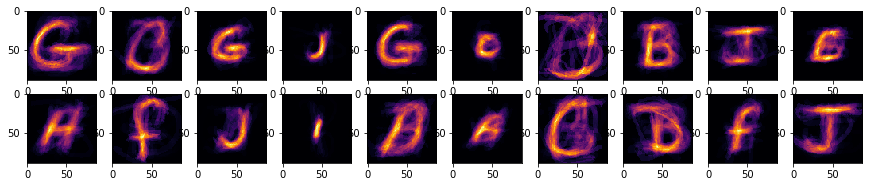

In [67]:
# Plot a prototype
fig = plt.figure(figsize=(15,15))
columns = letters//2
rows = letters//2
for y in range(letters):
    fig.add_subplot(rows, columns, y+1)
    plt.imshow(W[y,:].reshape((88,88), order = 'F'),interpolation = 'nearest', cmap='inferno')

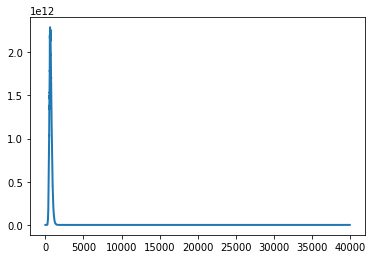

In [68]:
# Plot running average
plt.plot(wCount[0,0:tmax], linewidth=2.0, label='rate')